<a href="https://colab.research.google.com/github/Abhi12122000/TD3_multi_agent_uav-/blob/main/DQN_Discrete_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center">
    <h1>
        Deep Q-Learning
    </h1>
</div>

<br><br>

<div style="text-align:center">

In this notebook, we extend the Q-Learning algorithm to use function approximators (Neural Networks). The resulting algorithm is known as Deep Q-Learning.
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 8 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
!pip install gym==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.15.3-py3-none-any.whl size=1644968 sha256=9d178a0452b71b427fea0bf9ccef0039152aec89cadc7bc4e3dee134ea5b7bf0
  Stored in directory: /root/.cache/pip/wheels/9b/b4/52/f4cce4bdc360a2289a3433deaa062ceb13dbe429c342866e97
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

In [2]:
import random
import copy
import gym
import torch
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
from torch import nn as nn
from torch.optim import AdamW
from tqdm import tqdm
import numpy as np
from gym import wrappers, Env, spaces
# from utils import test_agent, plot_stats, seed_everything

## Create and prepare the environment

### Create the environment

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
# class Single_Agent_UAV(Env):
#     def __init__(self, initial_UAV_state = None):
#         super(Single_Agent_UAV, self).__init__()

#         #self.initial_UAV_state = initial_UAV_state
#         self.initial_UAV_state = np.array([50,50])
#         self.UE_count = 30
#         self.Z = 20
#         self.horizontal_dist_max = 20
#         self.max_angle = 2 * math.pi
#         # self.dz_max = 20
#         self.phi_n = np.radians(42.44)  # in degrees
#         self.C_max_t = (self.Z / np.tan(self.phi_n))
#         self.boundary_x = self.boundary_y = 100.
#         self.max_episode_steps = 20 # Maximum number of steps in a single episode, after which environment returns done = True
#         self.current_episode_timestep = 0
#         self.done = False
#         self.action_step_size = self.boundary_x / 25.

#         # self.action_space_coversion_lb = np.array([0, 0])
#         # self.action_space_coversion_ub = np.array([self.horizontal_dist_max, self.max_angle])

#         # self.action_space_lb = -1 * np.ones(2)
#         # self.action_space_ub = np.ones(2)
#         self.state_space_lb = np.array([0 for i in range(self.UE_count + 2)])
#         self.state_space_ub = [self.boundary_x, self.boundary_y]
#         for i in range(self.UE_count):
#             self.state_space_ub.append(1)
#         self.state_space_ub = np.array(self.state_space_ub)
        
#         # plotting parameters
#         self.plotting_boundary_buffer = 5.
#         self.UAV_coverage_circle_color = 'lavender'
#         self.EC_concentrated_region_color = 'mistyrose'
#         self.UAV_path_color = 'green'


# #         defining action space
#         self.state_space = gym.spaces.box.Box(low = self.state_space_lb, high = self.state_space_ub)
# #         defining observation space
#         self.action_space = spaces.Discrete(9)

#         self.place_UEs(position="centered", center = None)
#         self.action_conversion()


#     def action_conversion(self):
#         self.n_actions = self.action_space.n
#         # HARDCODED FOR n=9
#         diag = (1 / math.sqrt(2))
#         self.index_to_action_mapper = [(0, 0 ), (1, 0), (diag, diag), (0, 1), (-diag, diag), (-1, 0), (-diag, -diag), (0, -1), (diag, -diag)]  # angle changes in clockwise fashion
#         return


#     def reset(self):
#         self.current_state = np.array(self.initial_UAV_state)
#         horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - self.current_state[:2], axis = 1)
#         rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
#         self.current_state = np.concatenate((self.current_state[:2], rho_array))
#         self.timesteps_in_episode = 0
#         self.done = False
#         return self.current_state
    
    
#     def get_count_of_UEs_covered(self):
#         '''
#         Returns count of UEs covered under UAV's current configuration
#         '''

#         ground_UAV_state = self.current_state[:2]
#         horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - ground_UAV_state, axis = 1)
#         # print("horizontal distance b/w UEs and UAV: ", horizontal_dist_UE_UAV)
#         rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
#         M_t = rho_array.sum()

#         return M_t


#     def render(self, **kwargs):
#         '''
#         Function to visualize UAV position
#         (this function has different configurations for different use cases)
#         '''

#         if 'UAV_positions_list' in kwargs:
#             self.render_UAV_movement_through_episode(UAV_positions_list = kwargs['UAV_positions_list'])

#         if 'fig' not in kwargs:
#             fig, ax = plt.subplots(1, 2, figsize=(20,10))
#             ax = np.array([ax])
#             kwargs['fig'] = fig
#             kwargs['ax'] = ax
#             kwargs['i'] = 0
        
#         if 'reward' not in kwargs:
#             kwargs['reward'] = 'Not known'
#         self.render_position_plot(**kwargs)


#     def step(self, action):
#         '''
#         Takes action moving environment from current_state to next_state
#         Arguments: `action` to be taken
#         Returns: new_state, reward, done, info(=None)
#         '''
#         # action = action.numpy().flatten()
#         err_msg = f"{action!r} ({type(action)}) invalid"
#         assert self.action_space.contains(action), err_msg
#         assert self.current_state is not None, "Call reset before using step method."


#         self.timesteps_in_episode += 1
#         prev_UAV_state = self.current_state
#         _, inside_bounds = self.move(action)
#         # print(type(self.current_state), type(prev_UAV_state))
#         if not inside_bounds:
#             # MENTIONED OUTPUT IS OUT OF BOUNDS
#             self.is_done(end = True)
#             reward = -500
#             return self.current_state, reward, self.done, None

#         ground_UAV_state = self.current_state[:2]
#         horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - ground_UAV_state, axis = 1)
#         rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
#         self.current_state = np.concatenate((self.current_state[:2], rho_array))
#         M_t = rho_array.sum()  # no. of UEs served by the agent

#         reward = M_t * 10         
#         self.is_done(M_t)
        
#         return self.current_state, reward, self.done, None
    

#     def move(self, action):
#         '''
#         Helper function to step() function.
#         Clips the passed action to fit within action space bounds.
#         Calculates new state after performing the passed action, and updates UAV position accordingly. 
#         '''
# #         evaluates new state reached upon performing the move and saves it in self.current_state
#         # ACTION = [dx, dy]
#         x_next = self.current_state[0] + (self.index_to_action_mapper[action][0] * self.action_step_size)
#         y_next = self.current_state[1] + (self.index_to_action_mapper[action][1] * self.action_step_size)
        
#     # updating horizontal_direction_angle if the new move is out of boundary
#         if((x_next < 0) or (x_next > self.boundary_x) or (y_next < 0) or (y_next > self.boundary_y)):
#             # UAV REMAINS IN ITS CURRENT POSITION
#             return action, False

#         self.current_state[:2] = np.array([x_next, y_next])
#         return action, True


#     def is_done(self, M_t=0, end=False):
#         '''
#         Helper function to check if episode needs to be terminated
#         '''
#         if end == True:
#             self.done = True
#         # if M_t >= int(0.6 * self.UE_count):
#         #     self.done = True
#         elif(self.timesteps_in_episode >= self.max_episode_steps):
#             self.done = True
#         return

    
#     def select_random_state(self):
#         '''
#         Selects (and returns) random initial state (within bounds) for the UAV
#         '''
#         new_x = np.random.uniform(0.0, self.boundary_x)
#         new_y = np.random.uniform(0.0, self.boundary_y)
#         return np.array([new_x, new_y])
    

#     def place_UEs_centered(self, center = None, centered_UE_count = None):
#         '''
#         Helper function to place_UEs
#         Places `centered_UE_count` UEs within a circle with center `center` and radius `C_max_t`.
#         Places remaining UEs (UE_count - centered_UE_count) randomly inside the area barring the above circular region
#         Arguments: 
#             desired_z_coord: Z coordinate with which to calculate radius C_max_t for centering UEs
#             center: Provides center of circular region in which UEs will be scattered
#             centered_UE_count: Number of UEs to be placed within the circular region created using previous arguments
#         '''

#         if centered_UE_count is None:
#           centered_UE_count = self.UE_count
#         # focuses the UEs inside the circular region
#         radius = self.C_max_t
#         if(center == None):
#             # (x, y) co-ordinates
#             x = np.random.uniform(0, self.boundary_x)
#             y = np.random.uniform(0, self.boundary_y)
#             center = np.array([x, y])

#         r = radius * np.sqrt(np.random.uniform(size = centered_UE_count))
#         theta = np.random.uniform(size = centered_UE_count) * 2 * math.pi

#         self.UE_center = center
#         self.UE_radius = radius
        

#         self.UE_positions = np.zeros((centered_UE_count, 2))
#         self.UE_positions[:, 0] = np.clip(center[0] + r * np.cos(theta), 0., self.boundary_x) 
#         self.UE_positions[:, 1] = np.clip(center[1] + r * np.sin(theta), 0., self.boundary_y)
#         return


#     def place_UEs_randomly(self, random_UE_count = None, **kwargs):
#         '''
#         Helper function to place_UEs
#         places `random_UE_count` UEs randomly onto the rectangular region
#         if kwargs has the key `exclude_center`, then the circular region spanned by `exclude_center` \
#         and `exclude_radius` is excluded

#         '''

#         if random_UE_count is None:
#           random_UE_count = self.UE_count

#         # places UE_count UEs on grid randomly
#         if type(self.UE_positions) == np.ndarray:
#             self.UE_positions = self.UE_positions.tolist()

#         randomly_placed_count = 0
#         while(randomly_placed_count < random_UE_count):
#             x = np.random.uniform(0, self.boundary_x)
#             y = np.random.uniform(0, self.boundary_y)
#             coords = np.array([x, y])
#             if 'exclude_center' in kwargs:
#                 if (np.linalg.norm(coords - kwargs['exclude_center']) <= kwargs['exclude_radius']):
#                     continue
#             self.UE_positions.append(coords)
#             randomly_placed_count += 1

#         self.UE_positions = np.array(self.UE_positions)


#     def place_UEs(self, position="random", center = None):
#         '''
#         Function to place UEs onto the rectangular region
#         Arguments:
#             position: has 2 modes, "random" and "centered", representing the two configuration for scattering UEs
#             desired_z_coord: if position="centered", this argument gives height with which to calculate radius of circular region
#             center: if position="centered", this argument provides center of circular region
#         '''

#         self.UE_center = None  # initializing for non-centered generation algorithms

#         if(position=="centered"):
#             ratio = 0.65
#             centered_count = int(ratio * self.UE_count)
#             self.place_UEs_centered(center, centered_count)
#             if(self.UE_count - centered_count > 0):
#                 self.place_UEs_randomly(self.UE_count - centered_count, exclude_center = self.UE_center, exclude_radius = self.UE_radius)
#         elif(position=="random"):
#             self.place_UEs_randomly()

#         # saves in self.UE_positions
#         self.UE_positions = np.array(self.UE_positions)
#         return


#     def render_policy_plot(self, **kwargs):

#         fig, ax = plt.subplots(1, figsize=(10,10))
#         position_action_list = kwargs['position_action_list']
#         for position_action in position_action_list:
#             position = position_action[0]
#             action = position_action[1]
#             new_state = self.move(action, get_new_state=True)
#             ax.arrow(position[0], position[1], new_state[0] - position[0], new_state[1] - position[1], head_width=0.09, head_length=0.1)
#         plt.show()
#         return


#     def render_bar_plot(self, ax, plot_number, idx):
#         '''
#         Plotting bar graph of each UE's fraction of tasks assigned to UAV and to EC, by the last action input given to step() function
#         '''
#         x_indices = np.arange(self.UE_count)
#         width = 0.5

#         gamma_array = (np.array(self.last_action[4:])).reshape((self.UE_count, self.EC_count))
#         gamma_zeros = (1 - gamma_array.sum(axis = 1))
        
#         ax[plot_number, idx].bar(x_indices, gamma_zeros, width=width)
#         for i in range(self.EC_count):
#             ax[plot_number, idx].bar(x_indices, gamma_array[:, i], width=width)
        
    
#     def render_position_plot(self, **kwargs):
#         '''
#         Helper function to render(), plots the current position plot on given axes. 
#         Plotting position plot of UAV's current position and coverage
#         '''
#         ax = kwargs['ax']
#         plot_number = kwargs['i']
#         idx = 0
#         reward = kwargs['reward']

#         buffer = 5.
#         ax[plot_number, idx].set_xlim(-buffer, self.boundary_x+buffer)
#         ax[plot_number, idx].set_ylim(-buffer, self.boundary_y+buffer)
#         ax[plot_number, idx].grid()
#         UE_x = self.UE_positions[:, 0]
#         UE_y = self.UE_positions[:, 1]
#         ax[plot_number, idx].plot(UE_x, UE_y, color='black', marker='o', markersize=6, linestyle = '', label = "UE")
        
#         ax[plot_number, idx].plot(self.current_state[0], self.current_state[1], color='blue', marker='x', markersize=9, linestyle = '', label = "UAV")
        
#         UAV_coverage_area = plt.Circle((self.current_state[0] , self.current_state[1] ), self.C_max_t, color = self.UAV_coverage_circle_color)
#         ax[plot_number, idx].add_artist(UAV_coverage_area)
      
#       # For testing: To plot the circle and visualize UE points inside it
#         if self.UE_center is not None:
#             Test_UE_allotment_circle = plt.Circle((self.UE_center[0] , self.UE_center[1]), self.UE_radius, color = self.EC_concentrated_region_color)
#             ax[plot_number, idx].add_artist(Test_UE_allotment_circle)
#       # End

#         if 'learnt_policy_visualization' in kwargs:
#             position_action_list = kwargs['position_action_list']
#             for position_action in position_action_list:
#                 position = position_action[0]
#                 action = position_action[1]
#                 action = np.clip(action, self.action_space_lb, self.action_space_ub)
#                 action = (((self.action_space_coversion_ub - self.action_space_coversion_lb) * (action + 1)) / 2) + self.action_space_coversion_lb
#                 print("scaled action: ", action)
#                 # print("action after scaling: ", action)
#                 new_state = self.move(action, get_new_state=True, provided_center=position)
#                 print("previous state: ", position, ", new state: ", new_state)
#                 # print("new_state: ", new_state)
#                 ax[plot_number, idx].plot(position[0], position[1], color='blue', marker='o', markersize=6, linestyle = '')
#                 ax[plot_number, idx].plot(new_state[0], new_state[1], color='orange', marker='o', markersize=6, linestyle = '')
#                 ax[plot_number, idx].arrow(position[0], position[1], new_state[0] - position[0], new_state[1] - position[1], head_width=0.2, head_length=0.1)


#         ax[plot_number, idx].set_aspect(1)
#         # naming the x axis
#         ax[plot_number, idx].set_xlabel('X pos (m)')
#         # naming the y axis
#         ax[plot_number, idx].set_ylabel('Y pos (m)')
#         ax[plot_number, idx].set_title('reward: ' + str(reward))
#         # giving a title to my graph
#         # plt.title('Visually Appealing!')

#         # show a legend on the plot
#         ax[plot_number, idx].legend()
#         # plt.show()

In [20]:
class Single_Agent_UAV(Env):
    def __init__(self, initial_UAV_state = None):
        super(Single_Agent_UAV, self).__init__()

        #self.initial_UAV_state = initial_UAV_state
        self.initial_UAV_state = np.array([50,50])
        self.UE_count = 200
        self.Z = 30
        self.horizontal_dist_max = 20
        self.max_angle = 2 * math.pi
        # self.dz_max = 20
        self.phi_n = np.radians(42.44)  # in degrees
        self.C_max_t = (self.Z / np.tan(self.phi_n))
        self.boundary_x = self.boundary_y = 150.
        self.max_episode_steps = 50 # Maximum number of steps in a single episode, after which environment returns done = True
        self.current_episode_timestep = 0
        self.done = False
        self.action_step_size = self.boundary_x / 25.

        # self.action_space_coversion_lb = np.array([0, 0])
        # self.action_space_coversion_ub = np.array([self.horizontal_dist_max, self.max_angle])

        # self.action_space_lb = -1 * np.ones(2)
        # self.action_space_ub = np.ones(2)
        self.state_space_lb = np.array([0, 0], dtype = np.float32)
        self.state_space_ub = np.array([self.boundary_x, self.boundary_y], dtype = np.float32)
        
        # plotting parameters
        self.plotting_boundary_buffer = 5.
        self.UAV_coverage_circle_color = 'lavender'
        self.EC_concentrated_region_color = 'mistyrose'
        self.UAV_path_color = 'green'


#         defining action space
        self.state_space = gym.spaces.box.Box(low = self.state_space_lb, high = self.state_space_ub)
#         defining observation space
        self.action_space = spaces.Discrete(9)

        self.place_UEs(position="centered", center = None)
        self.action_conversion()


    def action_conversion(self):
        self.n_actions = self.action_space.n
        # HARDCODED FOR n=9
        diag = (1 / math.sqrt(2))
        self.index_to_action_mapper = [(0, 0 ), (1, 0), (diag, diag), (0, 1), (-diag, diag), (-1, 0), (-diag, -diag), (0, -1), (diag, -diag)]  # angle changes in clockwise fashion
        return


    def reset(self):
        # RANDOMLY SELECTS UAV STARTING POSITION
        self.current_state = self.select_random_state()
        
        # RESETS UAV STARTING POSITION TO self.initial_UAV_state
        # self.current_state = np.array(self.initial_UAV_state)

        # FOLLOWING 3 LINES ARE USED IF THE STATE SPACE INVOLVES THE UE COVERED BINARY VECTOR
        # horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - self.current_state[:2], axis = 1)
        # rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
        # self.current_state = np.concatenate((self.current_state[:2], rho_array))
        self.timesteps_in_episode = 0
        self.done = False
        return self.current_state
    
    
    def get_count_of_UEs_covered(self):
        '''
        Returns count of UEs covered under UAV's current configuration
        '''

        ground_UAV_state = self.current_state[:2]
        horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - ground_UAV_state, axis = 1)
        # print("horizontal distance b/w UEs and UAV: ", horizontal_dist_UE_UAV)
        rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
        M_t = rho_array.sum()

        return M_t


    def render(self, **kwargs):
        '''
        Function to visualize UAV position
        (this function has different configurations for different use cases)
        '''

        if 'UAV_positions_list' in kwargs:
            self.render_UAV_movement_through_episode(UAV_positions_list = kwargs['UAV_positions_list'])

        if 'fig' not in kwargs:
            fig, ax = plt.subplots(1, 2, figsize=(20,10))
            ax = np.array([ax])
            kwargs['fig'] = fig
            kwargs['ax'] = ax
            kwargs['i'] = 0
        
        if 'reward' not in kwargs:
            kwargs['reward'] = 'Not known'
        self.render_position_plot(**kwargs)


    def step(self, action):
        '''
        Takes action moving environment from current_state to next_state
        Arguments: `action` to be taken
        Returns: new_state, reward, done, info(=None)
        '''
        # action = action.numpy().flatten()
        err_msg = f"{action!r} ({type(action)}) invalid"
        assert self.action_space.contains(action), err_msg
        assert self.current_state is not None, "Call reset before using step method."


        self.timesteps_in_episode += 1
        prev_UAV_state = self.current_state
        _, inside_bounds = self.move(action)
        # print(type(self.current_state), type(prev_UAV_state))
        if not inside_bounds:
            # MENTIONED OUTPUT IS OUT OF BOUNDS
            # self.is_done(end = True)
            reward = -10000
            return self.current_state, reward, self.done, None

        ground_UAV_state = self.current_state[:2]
        horizontal_dist_UE_UAV = np.linalg.norm(self.UE_positions - ground_UAV_state, axis = 1)
        rho_array = (horizontal_dist_UE_UAV <= (self.C_max_t)) * 1  # binary association vector
        # self.current_state = np.concatenate((self.current_state[:2], rho_array))
        M_t = rho_array.sum()  # no. of UEs served by the agent

        reward = M_t * 10         
        self.is_done(M_t)
        
        return self.current_state, reward, self.done, None
    

    def move(self, action):
        '''
        Helper function to step() function.
        Clips the passed action to fit within action space bounds.
        Calculates new state after performing the passed action, and updates UAV position accordingly. 
        '''
#         evaluates new state reached upon performing the move and saves it in self.current_state
        # ACTION = [dx, dy]
        x_next = self.current_state[0] + (self.index_to_action_mapper[action][0] * self.action_step_size)
        y_next = self.current_state[1] + (self.index_to_action_mapper[action][1] * self.action_step_size)
        
    # updating horizontal_direction_angle if the new move is out of boundary
        if((x_next < 0) or (x_next > self.boundary_x) or (y_next < 0) or (y_next > self.boundary_y)):
            # UAV REMAINS IN ITS CURRENT POSITION
            return action, False

        self.current_state[:2] = np.array([x_next, y_next])
        return action, True


    def is_done(self, M_t=0, end=False):
        '''
        Helper function to check if episode needs to be terminated
        '''
        if end == True:
            self.done = True
        # if M_t >= int(0.6 * self.UE_count):
        #     self.done = True
        elif(self.timesteps_in_episode >= self.max_episode_steps):
            self.done = True
        return

    
    def select_random_state(self):
        '''
        Selects (and returns) random initial state (within bounds) for the UAV
        '''
        new_x = np.random.uniform(0.0, self.boundary_x)
        new_y = np.random.uniform(0.0, self.boundary_y)
        return np.array([new_x, new_y])
    

    def place_UEs_centered(self, center = None, centered_UE_count = None):
        '''
        Helper function to place_UEs
        Places `centered_UE_count` UEs within a circle with center `center` and radius `C_max_t`.
        Places remaining UEs (UE_count - centered_UE_count) randomly inside the area barring the above circular region
        Arguments: 
            desired_z_coord: Z coordinate with which to calculate radius C_max_t for centering UEs
            center: Provides center of circular region in which UEs will be scattered
            centered_UE_count: Number of UEs to be placed within the circular region created using previous arguments
        '''

        if centered_UE_count is None:
          centered_UE_count = self.UE_count
        # focuses the UEs inside the circular region
        radius = (2 * self.C_max_t) / 3
        if(center == None):
            # (x, y) co-ordinates
            x = np.random.uniform(0, self.boundary_x)
            y = np.random.uniform(0, self.boundary_y)
            center = np.array([x, y])

        r = radius * np.sqrt(np.random.uniform(size = centered_UE_count))
        theta = np.random.uniform(size = centered_UE_count) * 2 * math.pi

        self.UE_center = center
        self.UE_radius = radius
        

        self.UE_positions = np.zeros((centered_UE_count, 2))
        self.UE_positions[:, 0] = np.clip(center[0] + r * np.cos(theta), 0., self.boundary_x) 
        self.UE_positions[:, 1] = np.clip(center[1] + r * np.sin(theta), 0., self.boundary_y)
        return


    def place_UEs_randomly(self, random_UE_count = None, **kwargs):
        '''
        Helper function to place_UEs
        places `random_UE_count` UEs randomly onto the rectangular region
        if kwargs has the key `exclude_center`, then the circular region spanned by `exclude_center` \
        and `exclude_radius` is excluded

        '''

        if random_UE_count is None:
          random_UE_count = self.UE_count

        # places UE_count UEs on grid randomly
        if type(self.UE_positions) == np.ndarray:
            self.UE_positions = self.UE_positions.tolist()

        randomly_placed_count = 0
        while(randomly_placed_count < random_UE_count):
            x = np.random.uniform(0, self.boundary_x)
            y = np.random.uniform(0, self.boundary_y)
            coords = np.array([x, y])
            if 'exclude_center' in kwargs:
                if (np.linalg.norm(coords - kwargs['exclude_center']) <= kwargs['exclude_radius']):
                    continue
            self.UE_positions.append(coords)
            randomly_placed_count += 1

        self.UE_positions = np.array(self.UE_positions)


    def place_UEs(self, position="random", center = None):
        '''
        Function to place UEs onto the rectangular region
        Arguments:
            position: has 2 modes, "random" and "centered", representing the two configuration for scattering UEs
            desired_z_coord: if position="centered", this argument gives height with which to calculate radius of circular region
            center: if position="centered", this argument provides center of circular region
        '''

        self.UE_center = None  # initializing for non-centered generation algorithms

        if(position=="centered"):
            ratio = 0.65
            centered_count = int(ratio * self.UE_count)
            self.place_UEs_centered(center, centered_count)
            if(self.UE_count - centered_count > 0):
                self.place_UEs_randomly(self.UE_count - centered_count, exclude_center = self.UE_center, exclude_radius = self.UE_radius)
        elif(position=="random"):
            self.place_UEs_randomly()

        # saves in self.UE_positions
        self.UE_positions = np.array(self.UE_positions)
        return


    def render_UAV_movement_through_episode(self, **kwargs):
        '''
        Helper function to visualize UAV movement through an episode
        Arguments: A list specifying UAV positions throughout the episode
        '''

        if 'reward' not in kwargs:
            kwargs['reward'] = 'Not known'
        
        buffer = 5.
        fig, ax = plt.subplots(1, figsize=(10,10))
        ax.set_xlim(-buffer, self.boundary_x+buffer)
        ax.set_ylim(-buffer, self.boundary_y+buffer)
        ax.grid()
        UE_x = self.UE_positions[:, 0]
        UE_y = self.UE_positions[:, 1]
        ax.plot(UE_x, UE_y, color='black', marker='o', markersize=6, linestyle = '', label = "UE")
        
        ax.plot(np.array(kwargs['UAV_positions_list'])[:, 0] , np.array(kwargs['UAV_positions_list'])[:, 1], color=self.UAV_path_color, markersize=6, linestyle = '-', label = "UAV Path Color")
        ax.plot(kwargs['UAV_positions_list'][-1][0], kwargs['UAV_positions_list'][-1][1], color='blue', marker='x', markersize=9, linestyle = '', label = "UAV ending position")
        
        UAV_coverage_area = plt.Circle((kwargs['UAV_positions_list'][-1][0], kwargs['UAV_positions_list'][-1][1]), self.C_max_t, color = self.UAV_coverage_circle_color)
        ax.add_artist(UAV_coverage_area)
      
      # For testing: To plot the circle and visualize UE points inside it
        if self.UE_center is not None:
            Test_UE_allotment_circle = plt.Circle((self.UE_center[0] , self.UE_center[1]), self.UE_radius, color = self.EC_concentrated_region_color)
            ax.add_artist(Test_UE_allotment_circle)
      # End

        ax.set_aspect(1)
        # naming the x axis
        ax.set_xlabel('X pos (m)')
        # naming the y axis
        ax.set_ylabel('Y pos (m)')
        ax.set_title('UAV movement through episode')
        # giving a title to my graph
        # plt.title('Visually Appealing!')

        # show a legend on the plot
        ax.legend()
        # plt.show()
        return


    def render_policy_plot(self, **kwargs):

        fig, ax = plt.subplots(1, figsize=(10,10))
        position_action_list = kwargs['position_action_list']
        for position_action in position_action_list:
            position = position_action[0]
            action = position_action[1]
            new_state = self.move(action, get_new_state=True)
            ax.arrow(position[0], position[1], new_state[0] - position[0], new_state[1] - position[1], head_width=0.09, head_length=0.1)
        plt.show()
        return


    def render_bar_plot(self, ax, plot_number, idx):
        '''
        Plotting bar graph of each UE's fraction of tasks assigned to UAV and to EC, by the last action input given to step() function
        '''
        x_indices = np.arange(self.UE_count)
        width = 0.5

        gamma_array = (np.array(self.last_action[4:])).reshape((self.UE_count, self.EC_count))
        gamma_zeros = (1 - gamma_array.sum(axis = 1))
        
        ax[plot_number, idx].bar(x_indices, gamma_zeros, width=width)
        for i in range(self.EC_count):
            ax[plot_number, idx].bar(x_indices, gamma_array[:, i], width=width)
        
    
    def render_position_plot(self, **kwargs):
        '''
        Helper function to render(), plots the current position plot on given axes. 
        Plotting position plot of UAV's current position and coverage
        '''
        ax = kwargs['ax']
        plot_number = kwargs['i']
        idx = 0
        reward = kwargs['reward']

        buffer = 5.
        ax[plot_number, idx].set_xlim(-buffer, self.boundary_x+buffer)
        ax[plot_number, idx].set_ylim(-buffer, self.boundary_y+buffer)
        ax[plot_number, idx].grid()
        UE_x = self.UE_positions[:, 0]
        UE_y = self.UE_positions[:, 1]
        ax[plot_number, idx].plot(UE_x, UE_y, color='black', marker='o', markersize=6, linestyle = '', label = "UE")
        
        ax[plot_number, idx].plot(self.current_state[0], self.current_state[1], color='blue', marker='x', markersize=9, linestyle = '', label = "UAV")
        
        UAV_coverage_area = plt.Circle((self.current_state[0] , self.current_state[1] ), self.C_max_t, color = self.UAV_coverage_circle_color)
        ax[plot_number, idx].add_artist(UAV_coverage_area)
      
      # For testing: To plot the circle and visualize UE points inside it
        if self.UE_center is not None:
            Test_UE_allotment_circle = plt.Circle((self.UE_center[0] , self.UE_center[1]), self.UE_radius, color = self.EC_concentrated_region_color)
            ax[plot_number, idx].add_artist(Test_UE_allotment_circle)
      # End

        if 'learnt_policy_visualization' in kwargs:
            position_action_list = kwargs['position_action_list']
            for position_action in position_action_list:
                position = position_action[0]
                action = position_action[1]
                action = np.clip(action, self.action_space_lb, self.action_space_ub)
                action = (((self.action_space_coversion_ub - self.action_space_coversion_lb) * (action + 1)) / 2) + self.action_space_coversion_lb
                print("scaled action: ", action)
                # print("action after scaling: ", action)
                new_state = self.move(action, get_new_state=True, provided_center=position)
                print("previous state: ", position, ", new state: ", new_state)
                # print("new_state: ", new_state)
                ax[plot_number, idx].plot(position[0], position[1], color='blue', marker='o', markersize=6, linestyle = '')
                ax[plot_number, idx].plot(new_state[0], new_state[1], color='orange', marker='o', markersize=6, linestyle = '')
                ax[plot_number, idx].arrow(position[0], position[1], new_state[0] - position[0], new_state[1] - position[1], head_width=0.2, head_length=0.1)


        ax[plot_number, idx].set_aspect(1)
        # naming the x axis
        ax[plot_number, idx].set_xlabel('X pos (m)')
        # naming the y axis
        ax[plot_number, idx].set_ylabel('Y pos (m)')
        ax[plot_number, idx].set_title('reward: ' + str(reward))
        # giving a title to my graph
        # plt.title('Visually Appealing!')

        # show a legend on the plot
        ax[plot_number, idx].legend()
        # plt.show()

In [21]:
env = Single_Agent_UAV()
env.reset()

array([ 4.86098076, 63.3775301 ])

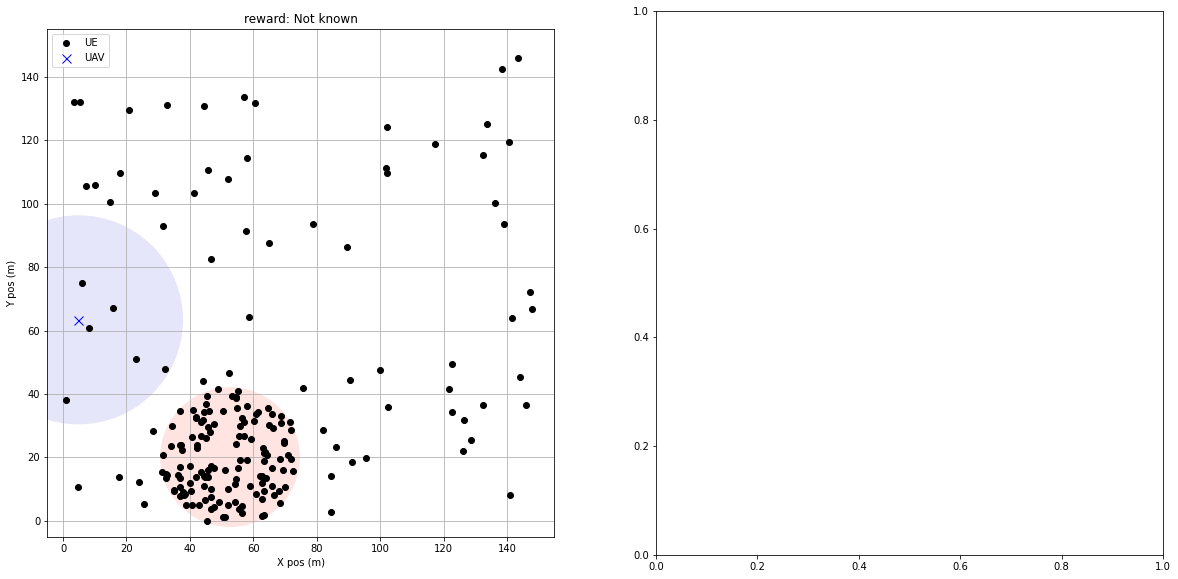

In [22]:
env.render()

In [23]:
state_dims = env.state_space.shape[0]
num_actions = env.action_space.n
print(f"Single Agent UAV env: State dimension: {state_dims}, Number of actions: {num_actions}")

Single Agent UAV env: State dimension: 2, Number of actions: 9


### Prepare the environment to work with PyTorch

In [24]:
state = env.reset()
action = 2
print(f"Sample state: {state}")
next_state, reward, done, _ = env.step(action)
print(f"Next state: {next_state}, Reward: {reward}, Done: {done}")

Sample state: [  5.50159156 146.21364955]
Next state: [  5.50159156 146.21364955], Reward: -10000, Done: False


In [25]:
action = torch.tensor(0)
action = action.item()
print(type(action))

<class 'int'>


In [26]:
class PreprocessEnv(gym.Wrapper):
    
    def __init__(self, env):
        gym.Wrapper.__init__(self, env)
    
    def reset(self):
        obs = self.env.reset()
        return torch.from_numpy(obs).unsqueeze(dim=0).float()
    
    def step(self, action):
        action = action.item()
        next_state, reward, done, info = self.env.step(action)
        next_state = torch.from_numpy(next_state).unsqueeze(dim=0).float()
        reward = torch.tensor(reward).view(1, -1).float()
        done = torch.tensor(done).view(1, -1)
        return next_state, reward, done, info

In [27]:
env = PreprocessEnv(env)

In [28]:
state = env.reset()
action = torch.tensor(5)
print(f"Sample state: {state[0]}")
next_state, reward, done, _ = env.step(action)
print(f"Next state: {next_state[0]}, Reward: {reward}, Done: {done}")

Sample state: tensor([135.8691,   1.3193])
Next state: tensor([129.8691,   1.3193]), Reward: tensor([[40.]]), Done: tensor([[False]])


## Create the Q-Network and policy

<br><br>

![Screenshot%202021-03-11%20at%2020.23.56.png](attachment:Screenshot%202021-03-11%20at%2020.23.56.png)

### Create the Q-Network: $\hat q(s,a| \theta)$

In [29]:
q_network = nn.Sequential(
    nn.Linear(state_dims, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64, num_actions)   
)

### Create the target Q-Network: $\hat q(s, a|\theta_{targ})$

In [30]:
target_q_network = copy.deepcopy(q_network).eval()

### Create the exploratory policy: $b(s)$

In [31]:
def policy(state, epsilon=0.):
    if torch.rand(1) < epsilon:
        return torch.randint(num_actions, (1, 1))
    else:
        av = q_network(state).detach()
        return torch.argmax(av, dim=-1, keepdim=True)

## Create the Experience Replay buffer

<br>
<div style="text-align:center">
    <p>A simple buffer that stores transitions of arbitrary values, adapted from
    <a href="https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#training">this source.</a></p>
</div>

![Screenshot%202021-03-11%20at%2020.38.28.png](attachment:Screenshot%202021-03-11%20at%2020.38.28.png)

In [32]:
class ReplayMemory:
    
    def __init__(self, capacity=100000):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def insert(self, transition):
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = transition
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        assert self.can_sample(batch_size)

        batch = random.sample(self.memory, batch_size)
        batch = zip(*batch)
        return [torch.cat(items) for items in batch]

    def can_sample(self, batch_size):
        return len(self.memory) >= batch_size * 10

    def __len__(self):
        return len(self.memory)

## Implement the algorithm

</br></br>

![Screenshot%202021-03-12%20at%2000.47.39.png](attachment:Screenshot%202021-03-12%20at%2000.47.39.png)

In [33]:
def deep_q_learning(q_network, policy, episodes, alpha = 0.001,
                    batch_size = 32, gamma = 0.99, epsilon = 0.2):
    optim = AdamW(q_network.parameters(), lr= alpha)
    memory = ReplayMemory()
    stats= {'MSE Loss': [], 'Average_Returns': []}
    
    for episode in tqdm(range(1, episodes+1)):
        state = env.reset()
        done = False
        ep_return = 0.
        print("-----------------------------episode ", episode, "-----------------------------")
        while not done:
            action = policy(state, epsilon)
            # print("current state: ", state[0][:2])
            # print("current action being taken: ", action[0][:2])
            next_state, reward, done, _ = env.step(action)
            memory.insert([state, action, reward, done, next_state])
            
            if memory.can_sample(batch_size):
                state_b, action_b, reward_b, done_b, next_state_b = memory.sample(batch_size)
                qsa_b = q_network(state_b).gather(1, action_b)
                
                next_qsa_b = target_q_network(next_state_b)
                next_qsa_b = torch.max(next_qsa_b, dim =-1, keepdim=True)[0]
                
                target_b = reward_b + ~done_b * gamma * next_qsa_b
                
                loss = F.mse_loss(qsa_b, target_b)
                q_network.zero_grad()
                loss.backward()
                optim.step()
            
                stats['MSE Loss'].append(loss)
            
            state = next_state
            ep_return +=reward.item()
        
        print("no. of UEs covered (Reward): ", reward.item())
        stats['Average_Returns'].append(float(ep_return) / env.timesteps_in_episode)
    
        if episode % 10 ==0:
            target_q_network.load_state_dict(q_network.state_dict())
    return stats

In [34]:
stats = deep_q_learning(q_network, policy, 5000)

  0%|          | 6/5000 [00:00<02:33, 32.47it/s]

-----------------------------episode  1 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  2 -----------------------------
no. of UEs covered (Reward):  190.0
-----------------------------episode  3 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  4 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  5 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  6 -----------------------------
no. of UEs covered (Reward):  180.0
-----------------------------episode  7 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  8 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  9 -----------------------------


  0%|          | 10/5000 [00:00<06:17, 13.21it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  10 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  11 -----------------------------


  0%|          | 12/5000 [00:00<07:26, 11.16it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  12 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  13 -----------------------------


  0%|          | 14/5000 [00:01<08:13, 10.11it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  14 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  15 -----------------------------


  0%|          | 16/5000 [00:01<08:54,  9.32it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  16 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  17 -----------------------------


  0%|          | 18/5000 [00:01<09:19,  8.91it/s]

no. of UEs covered (Reward):  250.0
-----------------------------episode  18 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  19 -----------------------------


  0%|          | 20/5000 [00:01<09:39,  8.60it/s]

no. of UEs covered (Reward):  320.0
-----------------------------episode  20 -----------------------------
no. of UEs covered (Reward):  240.0
-----------------------------episode  21 -----------------------------


  0%|          | 21/5000 [00:02<09:43,  8.53it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  22 -----------------------------


  0%|          | 23/5000 [00:02<11:49,  7.02it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  23 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  24 -----------------------------


  0%|          | 25/5000 [00:02<11:23,  7.27it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  25 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  26 -----------------------------


  1%|          | 27/5000 [00:02<11:03,  7.50it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  27 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  28 -----------------------------


  1%|          | 29/5000 [00:03<10:58,  7.55it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  29 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  30 -----------------------------


  1%|          | 31/5000 [00:03<11:24,  7.26it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  31 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  32 -----------------------------


  1%|          | 33/5000 [00:03<13:38,  6.07it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  33 -----------------------------
no. of UEs covered (Reward):  250.0
-----------------------------episode  34 -----------------------------


  1%|          | 35/5000 [00:04<14:51,  5.57it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  35 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  36 -----------------------------


  1%|          | 37/5000 [00:04<15:52,  5.21it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  37 -----------------------------
no. of UEs covered (Reward):  1170.0


  1%|          | 38/5000 [00:04<15:42,  5.26it/s]

-----------------------------episode  38 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  39 -----------------------------


  1%|          | 40/5000 [00:05<15:50,  5.22it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  40 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  41 -----------------------------


  1%|          | 42/5000 [00:05<16:14,  5.09it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  42 -----------------------------
no. of UEs covered (Reward):  440.0
-----------------------------episode  43 -----------------------------


  1%|          | 43/5000 [00:05<16:05,  5.13it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  44 -----------------------------


  1%|          | 45/5000 [00:06<15:38,  5.28it/s]

no. of UEs covered (Reward):  740.0
-----------------------------episode  45 -----------------------------
no. of UEs covered (Reward):  890.0
-----------------------------episode  46 -----------------------------


  1%|          | 47/5000 [00:06<13:13,  6.24it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  47 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  48 -----------------------------


  1%|          | 49/5000 [00:06<12:01,  6.86it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  49 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  50 -----------------------------


  1%|          | 51/5000 [00:07<11:40,  7.07it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  51 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  52 -----------------------------


  1%|          | 53/5000 [00:07<11:36,  7.10it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  53 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  54 -----------------------------


  1%|          | 55/5000 [00:07<11:22,  7.24it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  55 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  56 -----------------------------


  1%|          | 57/5000 [00:07<11:25,  7.22it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  57 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  58 -----------------------------


  1%|          | 59/5000 [00:08<11:10,  7.37it/s]

no. of UEs covered (Reward):  500.0
-----------------------------episode  59 -----------------------------
no. of UEs covered (Reward):  450.0
-----------------------------episode  60 -----------------------------


  1%|          | 61/5000 [00:08<11:15,  7.31it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  61 -----------------------------
no. of UEs covered (Reward):  320.0
-----------------------------episode  62 -----------------------------


  1%|▏         | 63/5000 [00:08<11:11,  7.36it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  63 -----------------------------
no. of UEs covered (Reward):  410.0
-----------------------------episode  64 -----------------------------


  1%|▏         | 65/5000 [00:08<11:55,  6.90it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  65 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  66 -----------------------------


  1%|▏         | 67/5000 [00:09<11:36,  7.08it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  67 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  68 -----------------------------


  1%|▏         | 69/5000 [00:09<11:23,  7.22it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  69 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  70 -----------------------------


  1%|▏         | 71/5000 [00:09<11:24,  7.20it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  71 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  72 -----------------------------


  1%|▏         | 73/5000 [00:10<11:25,  7.19it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  73 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  74 -----------------------------


  2%|▏         | 75/5000 [00:10<11:30,  7.13it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  75 -----------------------------
no. of UEs covered (Reward):  710.0
-----------------------------episode  76 -----------------------------


  2%|▏         | 77/5000 [00:10<11:21,  7.22it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  77 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  78 -----------------------------


  2%|▏         | 79/5000 [00:10<11:16,  7.28it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  79 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  80 -----------------------------


  2%|▏         | 81/5000 [00:11<11:08,  7.36it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  81 -----------------------------
no. of UEs covered (Reward):  230.0
-----------------------------episode  82 -----------------------------


  2%|▏         | 83/5000 [00:11<10:57,  7.48it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  83 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  84 -----------------------------


  2%|▏         | 85/5000 [00:11<11:07,  7.37it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  85 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  86 -----------------------------


  2%|▏         | 87/5000 [00:12<10:55,  7.49it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  87 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  88 -----------------------------


  2%|▏         | 89/5000 [00:12<10:51,  7.54it/s]

no. of UEs covered (Reward):  360.0
-----------------------------episode  89 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  90 -----------------------------


  2%|▏         | 91/5000 [00:12<10:56,  7.47it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  91 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  92 -----------------------------


  2%|▏         | 93/5000 [00:12<11:03,  7.40it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  93 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  94 -----------------------------


  2%|▏         | 95/5000 [00:13<11:16,  7.25it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  95 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  96 -----------------------------


  2%|▏         | 97/5000 [00:13<11:05,  7.37it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  97 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  98 -----------------------------


  2%|▏         | 99/5000 [00:13<10:57,  7.45it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  99 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  100 -----------------------------


  2%|▏         | 101/5000 [00:13<10:51,  7.52it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  101 -----------------------------
no. of UEs covered (Reward):  440.0
-----------------------------episode  102 -----------------------------


  2%|▏         | 103/5000 [00:14<10:57,  7.44it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  103 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  104 -----------------------------


  2%|▏         | 105/5000 [00:14<10:49,  7.53it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  105 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  106 -----------------------------


  2%|▏         | 107/5000 [00:14<11:01,  7.39it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  107 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  108 -----------------------------


  2%|▏         | 109/5000 [00:14<11:01,  7.39it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  109 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  110 -----------------------------


  2%|▏         | 111/5000 [00:15<11:09,  7.30it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  111 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  112 -----------------------------


  2%|▏         | 113/5000 [00:15<11:12,  7.26it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  113 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  114 -----------------------------


  2%|▏         | 115/5000 [00:15<11:19,  7.19it/s]

no. of UEs covered (Reward):  880.0
-----------------------------episode  115 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  116 -----------------------------


  2%|▏         | 117/5000 [00:16<11:17,  7.21it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  117 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  118 -----------------------------


  2%|▏         | 119/5000 [00:16<12:59,  6.26it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  119 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  120 -----------------------------


  2%|▏         | 120/5000 [00:16<13:44,  5.92it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  121 -----------------------------


  2%|▏         | 122/5000 [00:17<15:20,  5.30it/s]

no. of UEs covered (Reward):  30.0
-----------------------------episode  122 -----------------------------
no. of UEs covered (Reward):  1240.0
-----------------------------episode  123 -----------------------------


  2%|▏         | 124/5000 [00:17<15:08,  5.37it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  124 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  125 -----------------------------


  3%|▎         | 126/5000 [00:17<15:14,  5.33it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  126 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  127 -----------------------------


  3%|▎         | 128/5000 [00:18<15:21,  5.29it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  128 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  129 -----------------------------


  3%|▎         | 130/5000 [00:18<15:37,  5.20it/s]

no. of UEs covered (Reward):  1100.0
-----------------------------episode  130 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  131 -----------------------------


  3%|▎         | 132/5000 [00:19<16:08,  5.03it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  132 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  133 -----------------------------


  3%|▎         | 134/5000 [00:19<13:21,  6.07it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  134 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  135 -----------------------------


  3%|▎         | 136/5000 [00:19<12:02,  6.74it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  136 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  137 -----------------------------


  3%|▎         | 138/5000 [00:19<11:27,  7.07it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  138 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  139 -----------------------------


  3%|▎         | 140/5000 [00:20<11:11,  7.24it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  140 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  141 -----------------------------


  3%|▎         | 142/5000 [00:20<11:48,  6.86it/s]

no. of UEs covered (Reward):  30.0
-----------------------------episode  142 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  143 -----------------------------


  3%|▎         | 144/5000 [00:20<11:41,  6.92it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  144 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  145 -----------------------------


  3%|▎         | 146/5000 [00:20<11:35,  6.98it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  146 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  147 -----------------------------


  3%|▎         | 148/5000 [00:21<11:13,  7.21it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  148 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  149 -----------------------------


  3%|▎         | 150/5000 [00:21<11:17,  7.15it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  150 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  151 -----------------------------


  3%|▎         | 152/5000 [00:21<11:25,  7.07it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  152 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  153 -----------------------------


  3%|▎         | 154/5000 [00:22<11:01,  7.33it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  154 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  155 -----------------------------


  3%|▎         | 156/5000 [00:22<10:43,  7.53it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  156 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  157 -----------------------------


  3%|▎         | 158/5000 [00:22<10:45,  7.50it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  158 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  159 -----------------------------


  3%|▎         | 160/5000 [00:22<11:01,  7.32it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  160 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  161 -----------------------------


  3%|▎         | 162/5000 [00:23<10:50,  7.43it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  162 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  163 -----------------------------


  3%|▎         | 164/5000 [00:23<10:44,  7.51it/s]

no. of UEs covered (Reward):  610.0
-----------------------------episode  164 -----------------------------
no. of UEs covered (Reward):  710.0
-----------------------------episode  165 -----------------------------


  3%|▎         | 166/5000 [00:23<10:37,  7.58it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  166 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  167 -----------------------------


  3%|▎         | 168/5000 [00:23<10:47,  7.46it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  168 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  169 -----------------------------


  3%|▎         | 170/5000 [00:24<10:38,  7.57it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  170 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  171 -----------------------------


  3%|▎         | 172/5000 [00:24<10:54,  7.37it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  172 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  173 -----------------------------


  3%|▎         | 174/5000 [00:24<10:55,  7.37it/s]

no. of UEs covered (Reward):  660.0
-----------------------------episode  174 -----------------------------
no. of UEs covered (Reward):  170.0
-----------------------------episode  175 -----------------------------


  4%|▎         | 176/5000 [00:25<11:02,  7.29it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  176 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  177 -----------------------------


  4%|▎         | 178/5000 [00:25<11:01,  7.29it/s]

no. of UEs covered (Reward):  1120.0
-----------------------------episode  178 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  179 -----------------------------


  4%|▎         | 180/5000 [00:25<10:59,  7.31it/s]

no. of UEs covered (Reward):  510.0
-----------------------------episode  180 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  181 -----------------------------


  4%|▎         | 182/5000 [00:25<11:08,  7.21it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  182 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  183 -----------------------------


  4%|▎         | 184/5000 [00:26<11:00,  7.30it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  184 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  185 -----------------------------


  4%|▎         | 186/5000 [00:26<10:46,  7.45it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  186 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  187 -----------------------------


  4%|▍         | 188/5000 [00:26<10:40,  7.51it/s]

no. of UEs covered (Reward):  20.0
-----------------------------episode  188 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  189 -----------------------------


  4%|▍         | 190/5000 [00:26<10:49,  7.40it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  190 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  191 -----------------------------


  4%|▍         | 192/5000 [00:27<10:30,  7.62it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  192 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  193 -----------------------------


  4%|▍         | 194/5000 [00:27<10:47,  7.42it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  194 -----------------------------
no. of UEs covered (Reward):  580.0
-----------------------------episode  195 -----------------------------


  4%|▍         | 196/5000 [00:27<10:46,  7.43it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  196 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  197 -----------------------------


  4%|▍         | 198/5000 [00:28<10:56,  7.31it/s]

no. of UEs covered (Reward):  1030.0
-----------------------------episode  198 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  199 -----------------------------


  4%|▍         | 200/5000 [00:28<10:46,  7.43it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  200 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  201 -----------------------------


  4%|▍         | 202/5000 [00:28<10:40,  7.50it/s]

no. of UEs covered (Reward):  1030.0
-----------------------------episode  202 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  203 -----------------------------


  4%|▍         | 204/5000 [00:28<10:43,  7.46it/s]

no. of UEs covered (Reward):  1120.0
-----------------------------episode  204 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  205 -----------------------------


  4%|▍         | 206/5000 [00:29<11:31,  6.93it/s]

no. of UEs covered (Reward):  560.0
-----------------------------episode  206 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  207 -----------------------------


  4%|▍         | 208/5000 [00:29<13:21,  5.98it/s]

no. of UEs covered (Reward):  370.0
-----------------------------episode  208 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  209 -----------------------------


  4%|▍         | 210/5000 [00:29<14:08,  5.65it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  210 -----------------------------
no. of UEs covered (Reward):  810.0
-----------------------------episode  211 -----------------------------


  4%|▍         | 212/5000 [00:30<14:59,  5.32it/s]

no. of UEs covered (Reward):  420.0
-----------------------------episode  212 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  213 -----------------------------


  4%|▍         | 213/5000 [00:30<15:49,  5.04it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  214 -----------------------------
no. of UEs covered (Reward): 

  4%|▍         | 215/5000 [00:30<15:38,  5.10it/s]

 760.0
-----------------------------episode  215 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  216 -----------------------------


  4%|▍         | 217/5000 [00:31<15:34,  5.12it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  217 -----------------------------
no. of UEs covered (Reward):  280.0
-----------------------------episode  218 -----------------------------


  4%|▍         | 219/5000 [00:31<15:37,  5.10it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  219 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  220 -----------------------------


  4%|▍         | 221/5000 [00:31<13:27,  5.92it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  221 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  222 -----------------------------


  4%|▍         | 223/5000 [00:32<11:53,  6.70it/s]

no. of UEs covered (Reward):  1200.0
-----------------------------episode  223 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  224 -----------------------------


  4%|▍         | 225/5000 [00:32<11:28,  6.93it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  225 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  226 -----------------------------


  5%|▍         | 227/5000 [00:32<10:54,  7.30it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  227 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  228 -----------------------------


  5%|▍         | 229/5000 [00:33<10:51,  7.33it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  229 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  230 -----------------------------


  5%|▍         | 231/5000 [00:33<10:58,  7.24it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  231 -----------------------------
no. of UEs covered (Reward):  550.0
-----------------------------episode  232 -----------------------------


  5%|▍         | 233/5000 [00:33<10:56,  7.26it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  233 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  234 -----------------------------


  5%|▍         | 235/5000 [00:33<10:46,  7.37it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  235 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  236 -----------------------------


  5%|▍         | 237/5000 [00:34<11:00,  7.21it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  237 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  238 -----------------------------


  5%|▍         | 239/5000 [00:34<10:48,  7.34it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  239 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  240 -----------------------------


  5%|▍         | 241/5000 [00:34<10:39,  7.45it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  241 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  242 -----------------------------


  5%|▍         | 243/5000 [00:34<10:29,  7.55it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  243 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  244 -----------------------------


  5%|▍         | 245/5000 [00:35<10:25,  7.60it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  245 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  246 -----------------------------


  5%|▍         | 247/5000 [00:35<10:48,  7.33it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  247 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  248 -----------------------------


  5%|▍         | 249/5000 [00:35<10:53,  7.27it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  249 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  250 -----------------------------


  5%|▌         | 251/5000 [00:36<10:43,  7.39it/s]

no. of UEs covered (Reward):  1120.0
-----------------------------episode  251 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  252 -----------------------------


  5%|▌         | 253/5000 [00:36<11:02,  7.16it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  253 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  254 -----------------------------


  5%|▌         | 255/5000 [00:36<11:06,  7.12it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  255 -----------------------------
no. of UEs covered (Reward):  710.0
-----------------------------episode  256 -----------------------------


  5%|▌         | 257/5000 [00:36<10:48,  7.31it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  257 -----------------------------
no. of UEs covered (Reward):  570.0
-----------------------------episode  258 -----------------------------


  5%|▌         | 259/5000 [00:37<11:23,  6.93it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  259 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  260 -----------------------------


  5%|▌         | 261/5000 [00:37<11:03,  7.15it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  261 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  262 -----------------------------


  5%|▌         | 263/5000 [00:37<10:51,  7.27it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  263 -----------------------------
no. of UEs covered (Reward):  930.0
-----------------------------episode  264 -----------------------------


  5%|▌         | 265/5000 [00:37<10:37,  7.43it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  265 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  266 -----------------------------


  5%|▌         | 267/5000 [00:38<10:42,  7.37it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  267 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  268 -----------------------------


  5%|▌         | 269/5000 [00:38<10:48,  7.29it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  269 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  270 -----------------------------


  5%|▌         | 270/5000 [00:38<11:00,  7.16it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  271 -----------------------------


  5%|▌         | 272/5000 [00:39<13:20,  5.91it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  272 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  273 -----------------------------


  5%|▌         | 274/5000 [00:39<12:07,  6.50it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  274 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  275 -----------------------------


  6%|▌         | 276/5000 [00:39<11:12,  7.03it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  276 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  277 -----------------------------


  6%|▌         | 278/5000 [00:39<11:07,  7.08it/s]

no. of UEs covered (Reward):  540.0
-----------------------------episode  278 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  279 -----------------------------


  6%|▌         | 280/5000 [00:40<10:48,  7.28it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  280 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  281 -----------------------------


  6%|▌         | 282/5000 [00:40<10:43,  7.33it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  282 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  283 -----------------------------


  6%|▌         | 284/5000 [00:40<10:38,  7.39it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  284 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  285 -----------------------------


  6%|▌         | 286/5000 [00:40<10:33,  7.44it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  286 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  287 -----------------------------


  6%|▌         | 288/5000 [00:41<10:32,  7.45it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  288 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  289 -----------------------------


  6%|▌         | 290/5000 [00:41<10:39,  7.37it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  290 -----------------------------
no. of UEs covered (Reward):  380.0
-----------------------------episode  291 -----------------------------


  6%|▌         | 292/5000 [00:41<11:32,  6.80it/s]

no. of UEs covered (Reward):  540.0
-----------------------------episode  292 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  293 -----------------------------


  6%|▌         | 294/5000 [00:42<13:57,  5.62it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  294 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  295 -----------------------------


  6%|▌         | 295/5000 [00:42<14:55,  5.26it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  296 -----------------------------


  6%|▌         | 296/5000 [00:42<15:42,  4.99it/s]

no. of UEs covered (Reward):  320.0
-----------------------------episode  297 -----------------------------
no. of UEs covered (Reward):  

  6%|▌         | 297/5000 [00:42<15:46,  4.97it/s]

960.0
-----------------------------episode  298 -----------------------------


  6%|▌         | 298/5000 [00:43<16:02,  4.89it/s]

no. of UEs covered (Reward):  530.0
-----------------------------episode  299 -----------------------------


  6%|▌         | 300/5000 [00:43<15:48,  4.96it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  300 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  301 -----------------------------


  6%|▌         | 302/5000 [00:43<15:12,  5.15it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  302 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  303 -----------------------------


  6%|▌         | 304/5000 [00:44<15:18,  5.11it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  304 -----------------------------
no. of UEs covered (Reward):  990.0
-----------------------------episode  305 -----------------------------


  6%|▌         | 306/5000 [00:44<14:29,  5.40it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  306 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  307 -----------------------------


  6%|▌         | 308/5000 [00:44<12:50,  6.09it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  308 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  309 -----------------------------


  6%|▌         | 310/5000 [00:45<11:50,  6.60it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  310 -----------------------------
no. of UEs covered (Reward):  830.0
-----------------------------episode  311 -----------------------------


  6%|▌         | 312/5000 [00:45<11:07,  7.03it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  312 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  313 -----------------------------


  6%|▋         | 314/5000 [00:45<10:42,  7.29it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  314 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  315 -----------------------------


  6%|▋         | 316/5000 [00:46<10:33,  7.40it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  316 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  317 -----------------------------


  6%|▋         | 318/5000 [00:46<10:34,  7.38it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  318 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  319 -----------------------------


  6%|▋         | 320/5000 [00:46<10:36,  7.35it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  320 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  321 -----------------------------


  6%|▋         | 322/5000 [00:46<10:28,  7.44it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  322 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  323 -----------------------------


  6%|▋         | 324/5000 [00:47<10:28,  7.44it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  324 -----------------------------
no. of UEs covered (Reward):  890.0
-----------------------------episode  325 -----------------------------


  7%|▋         | 326/5000 [00:47<10:29,  7.42it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  326 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  327 -----------------------------


  7%|▋         | 328/5000 [00:47<10:41,  7.28it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  328 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  329 -----------------------------


  7%|▋         | 330/5000 [00:47<10:43,  7.26it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  330 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  331 -----------------------------


  7%|▋         | 332/5000 [00:48<10:24,  7.47it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  332 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  333 -----------------------------


  7%|▋         | 334/5000 [00:48<10:21,  7.50it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  334 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  335 -----------------------------


  7%|▋         | 336/5000 [00:48<10:45,  7.23it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  336 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  337 -----------------------------


  7%|▋         | 338/5000 [00:49<10:35,  7.34it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  338 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  339 -----------------------------


  7%|▋         | 340/5000 [00:49<10:41,  7.26it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  340 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  341 -----------------------------


  7%|▋         | 342/5000 [00:49<10:32,  7.37it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  342 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  343 -----------------------------


  7%|▋         | 344/5000 [00:49<10:37,  7.30it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  344 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  345 -----------------------------


  7%|▋         | 346/5000 [00:50<10:33,  7.35it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  346 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  347 -----------------------------


  7%|▋         | 348/5000 [00:50<10:27,  7.42it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  348 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  349 -----------------------------


  7%|▋         | 350/5000 [00:50<10:41,  7.25it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  350 -----------------------------
no. of UEs covered (Reward):  830.0
-----------------------------episode  351 -----------------------------


  7%|▋         | 352/5000 [00:50<11:05,  6.98it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  352 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  353 -----------------------------


  7%|▋         | 354/5000 [00:51<10:47,  7.17it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  354 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  355 -----------------------------


  7%|▋         | 356/5000 [00:51<10:48,  7.16it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  356 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  357 -----------------------------


  7%|▋         | 358/5000 [00:51<11:02,  7.01it/s]

no. of UEs covered (Reward):  990.0
-----------------------------episode  358 -----------------------------
no. of UEs covered (Reward):  960.0
-----------------------------episode  359 -----------------------------


  7%|▋         | 360/5000 [00:52<10:35,  7.30it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  360 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  361 -----------------------------


  7%|▋         | 362/5000 [00:52<10:08,  7.62it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  362 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  363 -----------------------------


  7%|▋         | 364/5000 [00:52<09:44,  7.93it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  364 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  365 -----------------------------


  7%|▋         | 366/5000 [00:52<10:02,  7.69it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  366 -----------------------------
no. of UEs covered (Reward):  1130.0
-----------------------------episode  367 -----------------------------


  7%|▋         | 368/5000 [00:53<10:13,  7.55it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  368 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  369 -----------------------------


  7%|▋         | 370/5000 [00:53<10:29,  7.36it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  370 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  371 -----------------------------


  7%|▋         | 372/5000 [00:53<10:38,  7.25it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  372 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  373 -----------------------------


  7%|▋         | 374/5000 [00:53<10:10,  7.57it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  374 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  375 -----------------------------


  8%|▊         | 376/5000 [00:54<09:59,  7.71it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  376 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  377 -----------------------------


  8%|▊         | 378/5000 [00:54<09:54,  7.77it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  378 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  379 -----------------------------


  8%|▊         | 380/5000 [00:54<11:25,  6.74it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  380 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  381 -----------------------------


  8%|▊         | 382/5000 [00:55<12:44,  6.04it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  382 -----------------------------
no. of UEs covered (Reward):  1130.0
-----------------------------episode  383 -----------------------------


  8%|▊         | 384/5000 [00:55<13:34,  5.67it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  384 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  385 -----------------------------


  8%|▊         | 386/5000 [00:55<13:56,  5.52it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  386 -----------------------------
no. of UEs covered (Reward):  1220.0
-----------------------------episode  387 -----------------------------


  8%|▊         | 388/5000 [00:56<14:13,  5.41it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  388 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  389 -----------------------------


  8%|▊         | 390/5000 [00:56<14:20,  5.36it/s]

no. of UEs covered (Reward):  990.0
-----------------------------episode  390 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  391 -----------------------------


  8%|▊         | 392/5000 [00:57<14:31,  5.29it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  392 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  393 -----------------------------


  8%|▊         | 394/5000 [00:57<13:09,  5.83it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  394 -----------------------------
no. of UEs covered (Reward):  1120.0
-----------------------------episode  395 -----------------------------


  8%|▊         | 396/5000 [00:57<11:25,  6.71it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  396 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  397 -----------------------------


  8%|▊         | 398/5000 [00:57<10:51,  7.06it/s]

no. of UEs covered (Reward):  510.0
-----------------------------episode  398 -----------------------------
no. of UEs covered (Reward):  630.0
-----------------------------episode  399 -----------------------------


  8%|▊         | 400/5000 [00:58<10:24,  7.36it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  400 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  401 -----------------------------


  8%|▊         | 402/5000 [00:58<10:10,  7.53it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  402 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  403 -----------------------------


  8%|▊         | 404/5000 [00:58<10:04,  7.60it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  404 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  405 -----------------------------


  8%|▊         | 406/5000 [00:58<10:00,  7.65it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  406 -----------------------------
no. of UEs covered (Reward):  670.0
-----------------------------episode  407 -----------------------------


  8%|▊         | 408/5000 [00:59<09:47,  7.82it/s]

no. of UEs covered (Reward):  980.0
-----------------------------episode  408 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  409 -----------------------------


  8%|▊         | 410/5000 [00:59<09:41,  7.90it/s]

no. of UEs covered (Reward):  880.0
-----------------------------episode  410 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  411 -----------------------------


  8%|▊         | 412/5000 [00:59<09:57,  7.67it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  412 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  413 -----------------------------


  8%|▊         | 414/5000 [00:59<09:57,  7.68it/s]

no. of UEs covered (Reward):  1100.0
-----------------------------episode  414 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  415 -----------------------------


  8%|▊         | 416/5000 [01:00<09:50,  7.76it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  416 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  417 -----------------------------


  8%|▊         | 418/5000 [01:00<09:48,  7.79it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  418 -----------------------------
no. of UEs covered (Reward):  810.0
-----------------------------episode  419 -----------------------------


  8%|▊         | 420/5000 [01:00<09:41,  7.87it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  420 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  421 -----------------------------


  8%|▊         | 422/5000 [01:00<09:49,  7.77it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  422 -----------------------------
no. of UEs covered (Reward):  1160.0
-----------------------------episode  423 -----------------------------


  8%|▊         | 424/5000 [01:01<09:45,  7.81it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  424 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  425 -----------------------------


  9%|▊         | 426/5000 [01:01<09:39,  7.89it/s]

no. of UEs covered (Reward):  500.0
-----------------------------episode  426 -----------------------------
no. of UEs covered (Reward):  830.0
-----------------------------episode  427 -----------------------------


  9%|▊         | 428/5000 [01:01<09:35,  7.95it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  428 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  429 -----------------------------


  9%|▊         | 430/5000 [01:01<09:46,  7.79it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  430 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  431 -----------------------------


  9%|▊         | 432/5000 [01:02<09:49,  7.75it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  432 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  433 -----------------------------


  9%|▊         | 434/5000 [01:02<09:48,  7.76it/s]

no. of UEs covered (Reward):  560.0
-----------------------------episode  434 -----------------------------
no. of UEs covered (Reward):  820.0
-----------------------------episode  435 -----------------------------


  9%|▊         | 436/5000 [01:02<10:26,  7.28it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  436 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  437 -----------------------------


  9%|▉         | 438/5000 [01:03<12:11,  6.23it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  438 -----------------------------
no. of UEs covered (Reward):  590.0
-----------------------------episode  439 -----------------------------


  9%|▉         | 440/5000 [01:03<13:33,  5.61it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  440 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  441 -----------------------------


  9%|▉         | 442/5000 [01:03<13:41,  5.55it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  442 -----------------------------
no. of UEs covered (Reward):  310.0
-----------------------------episode  443 -----------------------------


  9%|▉         | 444/5000 [01:04<13:54,  5.46it/s]

no. of UEs covered (Reward):  430.0
-----------------------------episode  444 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  445 -----------------------------


  9%|▉         | 446/5000 [01:04<14:02,  5.41it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  446 -----------------------------
no. of UEs covered (Reward):  360.0
-----------------------------episode 

  9%|▉         | 447/5000 [01:04<13:59,  5.43it/s]

 447 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  448 -----------------------------


  9%|▉         | 449/5000 [01:05<14:18,  5.30it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  449 -----------------------------
no. of UEs covered (Reward):  280.0
-----------------------------episode  450 -----------------------------


  9%|▉         | 451/5000 [01:05<12:29,  6.07it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  451 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  452 -----------------------------


  9%|▉         | 453/5000 [01:05<11:24,  6.65it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  453 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  454 -----------------------------


  9%|▉         | 455/5000 [01:06<10:22,  7.30it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  455 -----------------------------
no. of UEs covered (Reward):  990.0
-----------------------------episode  456 -----------------------------


  9%|▉         | 457/5000 [01:06<09:51,  7.68it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  457 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  458 -----------------------------


  9%|▉         | 459/5000 [01:06<09:56,  7.61it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  459 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  460 -----------------------------


  9%|▉         | 461/5000 [01:06<10:01,  7.54it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  461 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  462 -----------------------------


  9%|▉         | 463/5000 [01:07<09:59,  7.57it/s]

no. of UEs covered (Reward):  280.0
-----------------------------episode  463 -----------------------------
no. of UEs covered (Reward):  300.0
-----------------------------episode  464 -----------------------------


  9%|▉         | 465/5000 [01:07<11:07,  6.79it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  465 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  466 -----------------------------


  9%|▉         | 467/5000 [01:07<12:31,  6.03it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  467 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  468 -----------------------------


  9%|▉         | 469/5000 [01:08<13:09,  5.74it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  469 -----------------------------
no. of UEs covered (Reward):  470.0
-----------------------------episode  470 -----------------------------


  9%|▉         | 471/5000 [01:08<13:34,  5.56it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  471 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  472 -----------------------------


  9%|▉         | 473/5000 [01:08<13:43,  5.50it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  473 -----------------------------
no. of UEs covered (Reward):  300.0
-----------------------------episode  474 -----------------------------


 10%|▉         | 475/5000 [01:09<14:08,  5.33it/s]

no. of UEs covered (Reward):  750.0
-----------------------------episode  475 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  476 -----------------------------


 10%|▉         | 477/5000 [01:09<13:45,  5.48it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  477 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  478 -----------------------------


 10%|▉         | 479/5000 [01:09<12:58,  5.81it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  479 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  480 -----------------------------


 10%|▉         | 481/5000 [01:10<11:25,  6.59it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  481 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  482 -----------------------------


 10%|▉         | 483/5000 [01:10<10:51,  6.93it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  483 -----------------------------
no. of UEs covered (Reward):  400.0
-----------------------------episode  484 -----------------------------


 10%|▉         | 485/5000 [01:10<10:16,  7.32it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  485 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  486 -----------------------------


 10%|▉         | 487/5000 [01:11<10:03,  7.47it/s]

no. of UEs covered (Reward):  420.0
-----------------------------episode  487 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  488 -----------------------------


 10%|▉         | 489/5000 [01:11<10:03,  7.47it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  489 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  490 -----------------------------


 10%|▉         | 491/5000 [01:11<09:46,  7.69it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  491 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  492 -----------------------------


 10%|▉         | 493/5000 [01:11<09:26,  7.95it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  493 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  494 -----------------------------


 10%|▉         | 495/5000 [01:12<09:24,  7.98it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  495 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  496 -----------------------------


 10%|▉         | 497/5000 [01:12<09:31,  7.88it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  497 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  498 -----------------------------


 10%|▉         | 499/5000 [01:12<09:24,  7.97it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  499 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  500 -----------------------------


 10%|█         | 501/5000 [01:12<09:16,  8.08it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  501 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  502 -----------------------------


 10%|█         | 503/5000 [01:13<09:17,  8.07it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  503 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  504 -----------------------------


 10%|█         | 505/5000 [01:13<09:46,  7.66it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  505 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  506 -----------------------------


 10%|█         | 507/5000 [01:13<10:00,  7.48it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  507 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  508 -----------------------------


 10%|█         | 509/5000 [01:13<09:50,  7.60it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  509 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  510 -----------------------------


 10%|█         | 511/5000 [01:14<09:38,  7.77it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  511 -----------------------------
no. of UEs covered (Reward):  400.0
-----------------------------episode  512 -----------------------------


 10%|█         | 513/5000 [01:14<09:44,  7.68it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  513 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  514 -----------------------------


 10%|█         | 515/5000 [01:14<09:41,  7.72it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  515 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  516 -----------------------------


 10%|█         | 517/5000 [01:14<09:39,  7.73it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  517 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  518 -----------------------------


 10%|█         | 519/5000 [01:15<09:39,  7.74it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  519 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  520 -----------------------------


 10%|█         | 520/5000 [01:15<09:55,  7.53it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  521 -----------------------------


 10%|█         | 522/5000 [01:15<12:17,  6.07it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  522 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  523 -----------------------------


 10%|█         | 524/5000 [01:15<10:37,  7.02it/s]

no. of UEs covered (Reward):  1200.0
-----------------------------episode  524 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  525 -----------------------------


 11%|█         | 526/5000 [01:16<10:12,  7.31it/s]

no. of UEs covered (Reward):  1060.0
-----------------------------episode  526 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  527 -----------------------------


 11%|█         | 528/5000 [01:16<09:46,  7.62it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  528 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  529 -----------------------------


 11%|█         | 530/5000 [01:16<09:36,  7.76it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  530 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  531 -----------------------------


 11%|█         | 532/5000 [01:16<09:40,  7.69it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  532 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  533 -----------------------------


 11%|█         | 534/5000 [01:17<09:32,  7.80it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  534 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  535 -----------------------------


 11%|█         | 536/5000 [01:17<09:40,  7.69it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  536 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  537 -----------------------------


 11%|█         | 538/5000 [01:17<09:33,  7.78it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  538 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  539 -----------------------------


 11%|█         | 540/5000 [01:17<09:26,  7.88it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  540 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  541 -----------------------------


 11%|█         | 542/5000 [01:18<09:34,  7.76it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  542 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  543 -----------------------------


 11%|█         | 544/5000 [01:18<09:43,  7.63it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  544 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  545 -----------------------------


 11%|█         | 546/5000 [01:18<09:38,  7.70it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  546 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  547 -----------------------------


 11%|█         | 548/5000 [01:19<09:28,  7.84it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  548 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  549 -----------------------------


 11%|█         | 550/5000 [01:19<09:35,  7.73it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  550 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  551 -----------------------------


 11%|█         | 552/5000 [01:19<09:25,  7.87it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  552 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  553 -----------------------------


 11%|█         | 554/5000 [01:19<09:21,  7.92it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  554 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  555 -----------------------------


 11%|█         | 556/5000 [01:20<10:55,  6.78it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  556 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  557 -----------------------------


 11%|█         | 558/5000 [01:20<12:02,  6.15it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  558 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  559 -----------------------------


 11%|█         | 560/5000 [01:20<12:51,  5.76it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  560 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  561 -----------------------------


 11%|█         | 562/5000 [01:21<13:00,  5.69it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  562 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  563 -----------------------------


 11%|█▏        | 564/5000 [01:21<13:15,  5.58it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  564 -----------------------------
no. of UEs covered (Reward):  930.0
-----------------------------episode  565 -----------------------------


 11%|█▏        | 566/5000 [01:21<13:53,  5.32it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  566 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  567 -----------------------------


 11%|█▏        | 567/5000 [01:22<14:16,  5.18it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  568 -----------------------------


 11%|█▏        | 569/5000 [01:22<14:22,  5.14it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  569 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  570 -----------------------------


 11%|█▏        | 571/5000 [01:22<12:01,  6.14it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  571 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  572 -----------------------------


 11%|█▏        | 573/5000 [01:23<10:33,  6.98it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  573 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  574 -----------------------------


 12%|█▏        | 575/5000 [01:23<10:04,  7.33it/s]

no. of UEs covered (Reward):  220.0
-----------------------------episode  575 -----------------------------
no. of UEs covered (Reward):  550.0
-----------------------------episode  576 -----------------------------


 12%|█▏        | 577/5000 [01:23<09:46,  7.54it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  577 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  578 -----------------------------


 12%|█▏        | 579/5000 [01:23<09:48,  7.52it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  579 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  580 -----------------------------


 12%|█▏        | 581/5000 [01:24<09:18,  7.92it/s]

no. of UEs covered (Reward):  670.0
-----------------------------episode  581 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  582 -----------------------------


 12%|█▏        | 583/5000 [01:24<09:29,  7.75it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  583 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  584 -----------------------------


 12%|█▏        | 585/5000 [01:24<09:20,  7.88it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  585 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  586 -----------------------------


 12%|█▏        | 587/5000 [01:24<09:26,  7.79it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  587 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  588 -----------------------------


 12%|█▏        | 589/5000 [01:25<09:27,  7.78it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  589 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  590 -----------------------------


 12%|█▏        | 591/5000 [01:25<09:42,  7.57it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  591 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  592 -----------------------------


 12%|█▏        | 593/5000 [01:25<09:47,  7.50it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  593 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  594 -----------------------------


 12%|█▏        | 595/5000 [01:25<09:28,  7.75it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  595 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  596 -----------------------------


 12%|█▏        | 597/5000 [01:26<09:18,  7.89it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  597 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  598 -----------------------------


 12%|█▏        | 599/5000 [01:26<09:16,  7.91it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  599 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  600 -----------------------------


 12%|█▏        | 601/5000 [01:26<09:06,  8.06it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  601 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  602 -----------------------------


 12%|█▏        | 603/5000 [01:26<09:14,  7.94it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  603 -----------------------------
no. of UEs covered (Reward):  520.0
-----------------------------episode  604 -----------------------------


 12%|█▏        | 605/5000 [01:27<09:13,  7.94it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  605 -----------------------------
no. of UEs covered (Reward):  1040.0
-----------------------------episode  606 -----------------------------


 12%|█▏        | 607/5000 [01:27<09:23,  7.79it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  607 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  608 -----------------------------


 12%|█▏        | 609/5000 [01:27<09:33,  7.66it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  609 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  610 -----------------------------


 12%|█▏        | 611/5000 [01:27<09:21,  7.82it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  611 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  612 -----------------------------


 12%|█▏        | 613/5000 [01:28<09:38,  7.58it/s]

no. of UEs covered (Reward):  1140.0
-----------------------------episode  613 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  614 -----------------------------


 12%|█▏        | 615/5000 [01:28<09:40,  7.56it/s]

no. of UEs covered (Reward):  1100.0
-----------------------------episode  615 -----------------------------
no. of UEs covered (Reward):  960.0
-----------------------------episode  616 -----------------------------


 12%|█▏        | 617/5000 [01:28<09:46,  7.47it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  617 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  618 -----------------------------


 12%|█▏        | 619/5000 [01:29<09:47,  7.46it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  619 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  620 -----------------------------


 12%|█▏        | 621/5000 [01:29<09:45,  7.48it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  621 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  622 -----------------------------


 12%|█▏        | 623/5000 [01:29<09:57,  7.33it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  623 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  624 -----------------------------


 12%|█▎        | 625/5000 [01:29<09:37,  7.57it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  625 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  626 -----------------------------


 13%|█▎        | 627/5000 [01:30<09:32,  7.64it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  627 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  628 -----------------------------


 13%|█▎        | 629/5000 [01:30<09:33,  7.63it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  629 -----------------------------
no. of UEs covered (Reward):  990.0
-----------------------------episode  630 -----------------------------


 13%|█▎        | 631/5000 [01:30<09:38,  7.55it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  631 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  632 -----------------------------


 13%|█▎        | 633/5000 [01:30<09:36,  7.57it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  633 -----------------------------
no. of UEs covered (Reward):  330.0
-----------------------------episode  634 -----------------------------


 13%|█▎        | 635/5000 [01:31<09:34,  7.60it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  635 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  636 -----------------------------


 13%|█▎        | 637/5000 [01:31<09:36,  7.56it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  637 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  638 -----------------------------


 13%|█▎        | 639/5000 [01:31<09:30,  7.64it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  639 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  640 -----------------------------


 13%|█▎        | 641/5000 [01:31<09:47,  7.42it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  641 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  642 -----------------------------


 13%|█▎        | 643/5000 [01:32<09:31,  7.62it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  643 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  644 -----------------------------


 13%|█▎        | 645/5000 [01:32<09:22,  7.74it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  645 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  646 -----------------------------


 13%|█▎        | 647/5000 [01:32<11:21,  6.39it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  647 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  648 -----------------------------


 13%|█▎        | 649/5000 [01:33<12:06,  5.99it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  649 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  650 -----------------------------


 13%|█▎        | 651/5000 [01:33<12:44,  5.69it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  651 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  652 -----------------------------


 13%|█▎        | 653/5000 [01:33<13:03,  5.55it/s]

no. of UEs covered (Reward):  340.0
-----------------------------episode  653 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  654 -----------------------------


 13%|█▎        | 655/5000 [01:34<13:17,  5.45it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  655 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  656 -----------------------------


 13%|█▎        | 657/5000 [01:34<13:25,  5.39it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  657 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  658 -----------------------------


 13%|█▎        | 659/5000 [01:35<13:53,  5.21it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  659 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode 

 13%|█▎        | 660/5000 [01:35<12:55,  5.60it/s]

 660 -----------------------------
no. of UEs covered (Reward):  450.0
-----------------------------episode  661 -----------------------------


 13%|█▎        | 662/5000 [01:35<11:07,  6.50it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  662 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  663 -----------------------------


 13%|█▎        | 664/5000 [01:35<10:22,  6.97it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  664 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  665 -----------------------------


 13%|█▎        | 666/5000 [01:36<09:48,  7.37it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  666 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  667 -----------------------------


 13%|█▎        | 668/5000 [01:36<09:33,  7.55it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  668 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  669 -----------------------------


 13%|█▎        | 670/5000 [01:36<09:29,  7.61it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  670 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  671 -----------------------------


 13%|█▎        | 672/5000 [01:36<09:25,  7.66it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  672 -----------------------------
no. of UEs covered (Reward):  510.0
-----------------------------episode  673 -----------------------------


 13%|█▎        | 674/5000 [01:37<09:12,  7.84it/s]

no. of UEs covered (Reward):  700.0
-----------------------------episode  674 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  675 -----------------------------


 14%|█▎        | 676/5000 [01:37<09:10,  7.85it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  676 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  677 -----------------------------


 14%|█▎        | 678/5000 [01:37<09:02,  7.96it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  678 -----------------------------
no. of UEs covered (Reward):  990.0
-----------------------------episode  679 -----------------------------


 14%|█▎        | 680/5000 [01:37<09:35,  7.50it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  680 -----------------------------
no. of UEs covered (Reward):  330.0
-----------------------------episode  681 -----------------------------


 14%|█▎        | 682/5000 [01:38<09:13,  7.80it/s]

no. of UEs covered (Reward):  740.0
-----------------------------episode  682 -----------------------------
no. of UEs covered (Reward):  510.0
-----------------------------episode  683 -----------------------------


 14%|█▎        | 684/5000 [01:38<09:18,  7.72it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  684 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  685 -----------------------------


 14%|█▎        | 686/5000 [01:38<09:12,  7.80it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  686 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  687 -----------------------------


 14%|█▍        | 688/5000 [01:38<09:35,  7.50it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  688 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  689 -----------------------------


 14%|█▍        | 690/5000 [01:39<09:24,  7.64it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  690 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  691 -----------------------------


 14%|█▍        | 692/5000 [01:39<09:29,  7.56it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  692 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  693 -----------------------------


 14%|█▍        | 694/5000 [01:39<09:13,  7.79it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  694 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  695 -----------------------------


 14%|█▍        | 696/5000 [01:39<09:25,  7.61it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  696 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  697 -----------------------------


 14%|█▍        | 698/5000 [01:40<09:12,  7.79it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  698 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  699 -----------------------------


 14%|█▍        | 700/5000 [01:40<09:21,  7.65it/s]

no. of UEs covered (Reward):  990.0
-----------------------------episode  700 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  701 -----------------------------


 14%|█▍        | 702/5000 [01:40<09:17,  7.72it/s]

no. of UEs covered (Reward):  580.0
-----------------------------episode  702 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  703 -----------------------------


 14%|█▍        | 704/5000 [01:40<09:23,  7.63it/s]

no. of UEs covered (Reward):  1100.0
-----------------------------episode  704 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  705 -----------------------------


 14%|█▍        | 706/5000 [01:41<09:19,  7.67it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  706 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  707 -----------------------------


 14%|█▍        | 708/5000 [01:41<09:18,  7.68it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  708 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  709 -----------------------------


 14%|█▍        | 710/5000 [01:41<09:17,  7.69it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  710 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  711 -----------------------------


 14%|█▍        | 712/5000 [01:42<09:17,  7.69it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  712 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  713 -----------------------------


 14%|█▍        | 714/5000 [01:42<09:43,  7.34it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  714 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  715 -----------------------------


 14%|█▍        | 716/5000 [01:42<09:32,  7.48it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  716 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  717 -----------------------------


 14%|█▍        | 718/5000 [01:42<09:18,  7.67it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  718 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  719 -----------------------------


 14%|█▍        | 720/5000 [01:43<09:27,  7.54it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  720 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  721 -----------------------------


 14%|█▍        | 722/5000 [01:43<09:31,  7.49it/s]

no. of UEs covered (Reward):  550.0
-----------------------------episode  722 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  723 -----------------------------


 14%|█▍        | 724/5000 [01:43<09:21,  7.62it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  724 -----------------------------
no. of UEs covered (Reward):  420.0
-----------------------------episode  725 -----------------------------


 15%|█▍        | 726/5000 [01:43<09:16,  7.69it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  726 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  727 -----------------------------


 15%|█▍        | 728/5000 [01:44<09:21,  7.61it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  728 -----------------------------
no. of UEs covered (Reward):  810.0
-----------------------------episode  729 -----------------------------


 15%|█▍        | 730/5000 [01:44<09:18,  7.64it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  730 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  731 -----------------------------


 15%|█▍        | 732/5000 [01:44<09:10,  7.75it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  732 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  733 -----------------------------


 15%|█▍        | 734/5000 [01:44<09:16,  7.66it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  734 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  735 -----------------------------


 15%|█▍        | 736/5000 [01:45<09:37,  7.39it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  736 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  737 -----------------------------


 15%|█▍        | 738/5000 [01:45<11:12,  6.34it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  738 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  739 -----------------------------


 15%|█▍        | 740/5000 [01:45<12:00,  5.91it/s]

no. of UEs covered (Reward):  740.0
-----------------------------episode  740 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  741 -----------------------------


 15%|█▍        | 742/5000 [01:46<12:26,  5.70it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  742 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  743 -----------------------------


 15%|█▍        | 744/5000 [01:46<12:40,  5.60it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  744 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  745 -----------------------------


 15%|█▍        | 746/5000 [01:47<12:31,  5.66it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  746 -----------------------------
no. of UEs covered (Reward):  680.0
-----------------------------episode  747 -----------------------------


 15%|█▍        | 748/5000 [01:47<12:50,  5.52it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  748 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  749 -----------------------------


 15%|█▌        | 750/5000 [01:47<13:04,  5.42it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  750 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  751 -----------------------------


 15%|█▌        | 752/5000 [01:48<12:10,  5.82it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  752 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  753 -----------------------------


 15%|█▌        | 754/5000 [01:48<10:47,  6.56it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  754 -----------------------------
no. of UEs covered (Reward):  1080.0
-----------------------------episode  755 -----------------------------


 15%|█▌        | 756/5000 [01:48<10:19,  6.86it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  756 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  757 -----------------------------


 15%|█▌        | 758/5000 [01:48<09:37,  7.35it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  758 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  759 -----------------------------


 15%|█▌        | 760/5000 [01:49<09:33,  7.40it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  760 -----------------------------
no. of UEs covered (Reward):  560.0
-----------------------------episode  761 -----------------------------


 15%|█▌        | 762/5000 [01:49<09:16,  7.62it/s]

no. of UEs covered (Reward):  1060.0
-----------------------------episode  762 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  763 -----------------------------


 15%|█▌        | 764/5000 [01:49<09:17,  7.60it/s]

no. of UEs covered (Reward):  560.0
-----------------------------episode  764 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  765 -----------------------------


 15%|█▌        | 766/5000 [01:49<09:10,  7.69it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  766 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  767 -----------------------------


 15%|█▌        | 768/5000 [01:50<09:17,  7.59it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  768 -----------------------------
no. of UEs covered (Reward):  850.0
-----------------------------episode  769 -----------------------------


 15%|█▌        | 770/5000 [01:50<09:11,  7.67it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  770 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  771 -----------------------------


 15%|█▌        | 772/5000 [01:50<09:16,  7.60it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  772 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  773 -----------------------------


 15%|█▌        | 774/5000 [01:51<09:10,  7.68it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  774 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  775 -----------------------------


 16%|█▌        | 776/5000 [01:51<09:08,  7.70it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  776 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  777 -----------------------------


 16%|█▌        | 778/5000 [01:51<09:05,  7.74it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  778 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  779 -----------------------------


 16%|█▌        | 780/5000 [01:51<09:17,  7.58it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  780 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  781 -----------------------------


 16%|█▌        | 782/5000 [01:52<09:09,  7.68it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  782 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  783 -----------------------------


 16%|█▌        | 784/5000 [01:52<09:16,  7.58it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  784 -----------------------------
no. of UEs covered (Reward):  630.0
-----------------------------episode  785 -----------------------------


 16%|█▌        | 786/5000 [01:52<09:26,  7.44it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  786 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  787 -----------------------------


 16%|█▌        | 788/5000 [01:52<09:22,  7.49it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  788 -----------------------------
no. of UEs covered (Reward):  570.0
-----------------------------episode  789 -----------------------------


 16%|█▌        | 790/5000 [01:53<09:43,  7.22it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  790 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  791 -----------------------------


 16%|█▌        | 792/5000 [01:53<09:44,  7.19it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  792 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  793 -----------------------------


 16%|█▌        | 794/5000 [01:53<09:31,  7.35it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  794 -----------------------------
no. of UEs covered (Reward):  710.0
-----------------------------episode  795 -----------------------------


 16%|█▌        | 796/5000 [01:53<09:26,  7.42it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  796 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  797 -----------------------------


 16%|█▌        | 798/5000 [01:54<09:27,  7.40it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  798 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  799 -----------------------------


 16%|█▌        | 800/5000 [01:54<09:23,  7.46it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  800 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  801 -----------------------------


 16%|█▌        | 802/5000 [01:54<09:09,  7.64it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  802 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  803 -----------------------------


 16%|█▌        | 804/5000 [01:55<08:59,  7.78it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  804 -----------------------------
no. of UEs covered (Reward):  800.0
-----------------------------episode  805 -----------------------------


 16%|█▌        | 806/5000 [01:55<09:17,  7.52it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  806 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  807 -----------------------------


 16%|█▌        | 808/5000 [01:55<09:15,  7.55it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  808 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  809 -----------------------------


 16%|█▌        | 810/5000 [01:55<09:13,  7.56it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  810 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  811 -----------------------------


 16%|█▌        | 812/5000 [01:56<09:13,  7.57it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  812 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  813 -----------------------------


 16%|█▋        | 814/5000 [01:56<09:18,  7.50it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  814 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  815 -----------------------------


 16%|█▋        | 815/5000 [01:56<09:18,  7.50it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  816 -----------------------------


 16%|█▋        | 817/5000 [01:56<12:23,  5.63it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  817 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  818 -----------------------------


 16%|█▋        | 819/5000 [01:57<10:57,  6.36it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  819 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  820 -----------------------------


 16%|█▋        | 821/5000 [01:57<10:19,  6.75it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  821 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  822 -----------------------------


 16%|█▋        | 823/5000 [01:57<09:42,  7.17it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  823 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  824 -----------------------------


 16%|█▋        | 825/5000 [01:58<10:17,  6.76it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  825 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  826 -----------------------------


 17%|█▋        | 827/5000 [01:58<11:33,  6.02it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  827 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  828 -----------------------------


 17%|█▋        | 829/5000 [01:58<12:02,  5.77it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  829 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  830 -----------------------------


 17%|█▋        | 831/5000 [01:59<12:27,  5.58it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  831 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  832 -----------------------------


 17%|█▋        | 833/5000 [01:59<12:35,  5.51it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  833 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  834 -----------------------------


 17%|█▋        | 835/5000 [01:59<12:33,  5.53it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  835 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  836 -----------------------------


 17%|█▋        | 837/5000 [02:00<12:49,  5.41it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  837 -----------------------------
no. of UEs covered (Reward):  950.0


 17%|█▋        | 838/5000 [02:00<12:55,  5.37it/s]

-----------------------------episode  838 -----------------------------
no. of UEs covered (Reward):  1270.0
-----------------------------episode  839 -----------------------------


 17%|█▋        | 840/5000 [02:00<12:05,  5.73it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  840 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  841 -----------------------------


 17%|█▋        | 842/5000 [02:01<10:49,  6.40it/s]

no. of UEs covered (Reward):  1100.0
-----------------------------episode  842 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  843 -----------------------------


 17%|█▋        | 844/5000 [02:01<09:56,  6.97it/s]

no. of UEs covered (Reward):  360.0
-----------------------------episode  844 -----------------------------
no. of UEs covered (Reward):  1270.0
-----------------------------episode  845 -----------------------------


 17%|█▋        | 846/5000 [02:01<09:29,  7.30it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  846 -----------------------------
no. of UEs covered (Reward):  180.0
-----------------------------episode  847 -----------------------------


 17%|█▋        | 848/5000 [02:01<09:14,  7.49it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  848 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  849 -----------------------------


 17%|█▋        | 850/5000 [02:02<09:08,  7.56it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  850 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  851 -----------------------------


 17%|█▋        | 852/5000 [02:02<09:15,  7.47it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  852 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  853 -----------------------------


 17%|█▋        | 854/5000 [02:02<09:17,  7.44it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  854 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  855 -----------------------------


 17%|█▋        | 856/5000 [02:02<09:02,  7.64it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  856 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  857 -----------------------------


 17%|█▋        | 858/5000 [02:03<08:53,  7.76it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  858 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  859 -----------------------------


 17%|█▋        | 860/5000 [02:03<09:10,  7.52it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  860 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  861 -----------------------------


 17%|█▋        | 862/5000 [02:03<09:06,  7.57it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  862 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  863 -----------------------------


 17%|█▋        | 864/5000 [02:04<09:09,  7.53it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  864 -----------------------------
no. of UEs covered (Reward):  1040.0
-----------------------------episode  865 -----------------------------


 17%|█▋        | 866/5000 [02:04<09:01,  7.64it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  866 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  867 -----------------------------


 17%|█▋        | 868/5000 [02:04<09:03,  7.60it/s]

no. of UEs covered (Reward):  1120.0
-----------------------------episode  868 -----------------------------
no. of UEs covered (Reward):  560.0
-----------------------------episode  869 -----------------------------


 17%|█▋        | 870/5000 [02:04<09:01,  7.63it/s]

no. of UEs covered (Reward):  400.0
-----------------------------episode  870 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  871 -----------------------------


 17%|█▋        | 872/5000 [02:05<09:02,  7.61it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  872 -----------------------------
no. of UEs covered (Reward):  870.0
-----------------------------episode  873 -----------------------------


 17%|█▋        | 874/5000 [02:05<09:01,  7.62it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  874 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  875 -----------------------------


 18%|█▊        | 876/5000 [02:05<09:10,  7.49it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  876 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  877 -----------------------------


 18%|█▊        | 878/5000 [02:05<09:09,  7.51it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  878 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  879 -----------------------------


 18%|█▊        | 880/5000 [02:06<09:08,  7.52it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  880 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  881 -----------------------------


 18%|█▊        | 882/5000 [02:06<09:05,  7.55it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  882 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  883 -----------------------------


 18%|█▊        | 884/5000 [02:06<09:40,  7.09it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  884 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  885 -----------------------------


 18%|█▊        | 886/5000 [02:06<09:20,  7.34it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  886 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  887 -----------------------------


 18%|█▊        | 888/5000 [02:07<09:15,  7.40it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  888 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  889 -----------------------------


 18%|█▊        | 890/5000 [02:07<09:12,  7.44it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  890 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  891 -----------------------------


 18%|█▊        | 892/5000 [02:07<09:12,  7.44it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  892 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  893 -----------------------------


 18%|█▊        | 894/5000 [02:08<09:08,  7.49it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  894 -----------------------------
no. of UEs covered (Reward):  1160.0
-----------------------------episode  895 -----------------------------


 18%|█▊        | 896/5000 [02:08<09:17,  7.37it/s]

no. of UEs covered (Reward):  790.0
-----------------------------episode  896 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  897 -----------------------------


 18%|█▊        | 898/5000 [02:08<09:12,  7.43it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  898 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  899 -----------------------------


 18%|█▊        | 900/5000 [02:08<09:23,  7.28it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  900 -----------------------------
no. of UEs covered (Reward):  390.0
-----------------------------episode  901 -----------------------------


 18%|█▊        | 902/5000 [02:09<09:04,  7.53it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  902 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  903 -----------------------------


 18%|█▊        | 904/5000 [02:09<09:04,  7.53it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  904 -----------------------------
no. of UEs covered (Reward):  470.0
-----------------------------episode  905 -----------------------------


 18%|█▊        | 906/5000 [02:09<09:15,  7.37it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  906 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  907 -----------------------------


 18%|█▊        | 908/5000 [02:09<09:15,  7.37it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  908 -----------------------------
no. of UEs covered (Reward):  1270.0
-----------------------------episode  909 -----------------------------


 18%|█▊        | 910/5000 [02:10<09:05,  7.49it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  910 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  911 -----------------------------


 18%|█▊        | 912/5000 [02:10<09:03,  7.53it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  912 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  913 -----------------------------


 18%|█▊        | 914/5000 [02:10<09:48,  6.95it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  914 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  915 -----------------------------


 18%|█▊        | 916/5000 [02:11<11:09,  6.10it/s]

no. of UEs covered (Reward):  530.0
-----------------------------episode  916 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  917 -----------------------------


 18%|█▊        | 918/5000 [02:11<11:54,  5.71it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  918 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  919 -----------------------------


 18%|█▊        | 919/5000 [02:11<12:24,  5.48it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  920 -----------------------------
no. of UEs covered (Reward):  1340.0


 18%|█▊        | 921/5000 [02:12<12:30,  5.43it/s]

-----------------------------episode  921 -----------------------------
no. of UEs covered (Reward):  520.0
-----------------------------episode  922 -----------------------------


 18%|█▊        | 923/5000 [02:12<12:31,  5.42it/s]

no. of UEs covered (Reward):  420.0
-----------------------------episode  923 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  924 -----------------------------


 18%|█▊        | 925/5000 [02:12<12:45,  5.33it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  925 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  926 -----------------------------


 19%|█▊        | 927/5000 [02:13<12:47,  5.31it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  927 -----------------------------
no. of UEs covered (Reward):  630.0
-----------------------------episode  928 -----------------------------


 19%|█▊        | 929/5000 [02:13<11:41,  5.80it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  929 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  930 -----------------------------


 19%|█▊        | 931/5000 [02:13<10:24,  6.52it/s]

no. of UEs covered (Reward):  350.0
-----------------------------episode  931 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  932 -----------------------------


 19%|█▊        | 933/5000 [02:14<09:37,  7.04it/s]

no. of UEs covered (Reward):  1010.0
-----------------------------episode  933 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  934 -----------------------------


 19%|█▊        | 935/5000 [02:14<09:27,  7.17it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  935 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  936 -----------------------------


 19%|█▊        | 937/5000 [02:14<09:09,  7.40it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  937 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  938 -----------------------------


 19%|█▉        | 939/5000 [02:14<09:07,  7.42it/s]

no. of UEs covered (Reward):  340.0
-----------------------------episode  939 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  940 -----------------------------


 19%|█▉        | 941/5000 [02:15<09:04,  7.46it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  941 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  942 -----------------------------


 19%|█▉        | 943/5000 [02:15<09:06,  7.42it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  943 -----------------------------
no. of UEs covered (Reward):  1210.0
-----------------------------episode  944 -----------------------------


 19%|█▉        | 945/5000 [02:15<09:04,  7.45it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  945 -----------------------------
no. of UEs covered (Reward):  410.0
-----------------------------episode  946 -----------------------------


 19%|█▉        | 947/5000 [02:15<09:06,  7.41it/s]

no. of UEs covered (Reward):  300.0
-----------------------------episode  947 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  948 -----------------------------


 19%|█▉        | 949/5000 [02:16<08:56,  7.55it/s]

no. of UEs covered (Reward):  460.0
-----------------------------episode  949 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  950 -----------------------------


 19%|█▉        | 951/5000 [02:16<08:58,  7.52it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  951 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  952 -----------------------------


 19%|█▉        | 953/5000 [02:16<09:00,  7.49it/s]

no. of UEs covered (Reward):  670.0
-----------------------------episode  953 -----------------------------
no. of UEs covered (Reward):  410.0
-----------------------------episode  954 -----------------------------


 19%|█▉        | 955/5000 [02:17<09:03,  7.44it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  955 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  956 -----------------------------


 19%|█▉        | 957/5000 [02:17<09:04,  7.43it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  957 -----------------------------
no. of UEs covered (Reward):  220.0
-----------------------------episode  958 -----------------------------


 19%|█▉        | 959/5000 [02:17<08:58,  7.50it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  959 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  960 -----------------------------


 19%|█▉        | 961/5000 [02:17<09:02,  7.45it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  961 -----------------------------
no. of UEs covered (Reward):  210.0
-----------------------------episode  962 -----------------------------


 19%|█▉        | 963/5000 [02:18<08:55,  7.53it/s]

no. of UEs covered (Reward):  670.0
-----------------------------episode  963 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  964 -----------------------------


 19%|█▉        | 965/5000 [02:18<08:55,  7.54it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  965 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  966 -----------------------------


 19%|█▉        | 967/5000 [02:18<09:04,  7.41it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  967 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  968 -----------------------------


 19%|█▉        | 969/5000 [02:18<09:13,  7.29it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  969 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  970 -----------------------------


 19%|█▉        | 971/5000 [02:19<09:06,  7.37it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  971 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  972 -----------------------------


 19%|█▉        | 973/5000 [02:19<09:00,  7.45it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  973 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  974 -----------------------------


 20%|█▉        | 975/5000 [02:19<09:09,  7.33it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  975 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  976 -----------------------------


 20%|█▉        | 977/5000 [02:20<09:04,  7.39it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  977 -----------------------------
no. of UEs covered (Reward):  1160.0
-----------------------------episode  978 -----------------------------


 20%|█▉        | 979/5000 [02:20<09:08,  7.33it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  979 -----------------------------
no. of UEs covered (Reward):  1220.0
-----------------------------episode  980 -----------------------------


 20%|█▉        | 981/5000 [02:20<08:53,  7.54it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  981 -----------------------------
no. of UEs covered (Reward):  610.0
-----------------------------episode  982 -----------------------------


 20%|█▉        | 983/5000 [02:20<08:55,  7.50it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  983 -----------------------------
no. of UEs covered (Reward):  550.0
-----------------------------episode  984 -----------------------------


 20%|█▉        | 985/5000 [02:21<08:49,  7.58it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  985 -----------------------------
no. of UEs covered (Reward):  380.0
-----------------------------episode  986 -----------------------------


 20%|█▉        | 987/5000 [02:21<08:53,  7.53it/s]

no. of UEs covered (Reward):  400.0
-----------------------------episode  987 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  988 -----------------------------


 20%|█▉        | 989/5000 [02:21<08:46,  7.62it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  989 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  990 -----------------------------


 20%|█▉        | 991/5000 [02:21<08:54,  7.50it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  991 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  992 -----------------------------


 20%|█▉        | 993/5000 [02:22<08:46,  7.62it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  993 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  994 -----------------------------


 20%|█▉        | 995/5000 [02:22<08:50,  7.55it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  995 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  996 -----------------------------


 20%|█▉        | 997/5000 [02:22<08:55,  7.47it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  997 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  998 -----------------------------


 20%|█▉        | 999/5000 [02:22<08:57,  7.44it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  999 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  1000 -----------------------------


 20%|██        | 1001/5000 [02:23<08:55,  7.47it/s]

no. of UEs covered (Reward):  1060.0
-----------------------------episode  1001 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1002 -----------------------------


 20%|██        | 1003/5000 [02:23<09:50,  6.76it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1003 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  1004 -----------------------------


 20%|██        | 1004/5000 [02:23<10:54,  6.10it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  1005 -----------------------------


 20%|██        | 1006/5000 [02:24<12:09,  5.48it/s]

no. of UEs covered (Reward):  360.0
-----------------------------episode  1006 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  1007 -----------------------------


 20%|██        | 1008/5000 [02:24<12:24,  5.36it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1008 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  1009 -----------------------------


 20%|██        | 1010/5000 [02:24<12:14,  5.43it/s]

no. of UEs covered (Reward):  180.0
-----------------------------episode  1010 -----------------------------
no. of UEs covered (Reward):  670.0
-----------------------------episode  1011 -----------------------------


 20%|██        | 1012/5000 [02:25<12:38,  5.26it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  1012 -----------------------------
no. of UEs covered (Reward):  550.0
-----------------------------episode  1013 -----------------------------


 20%|██        | 1014/5000 [02:25<13:02,  5.10it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  1014 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  1015 -----------------------------

 20%|██        | 1015/5000 [02:25<13:00,  5.11it/s]


no. of UEs covered (Reward):  400.0
-----------------------------episode  1016 -----------------------------


 20%|██        | 1016/5000 [02:26<13:10,  5.04it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  1017 -----------------------------


 20%|██        | 1018/5000 [02:26<12:19,  5.39it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1018 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  1019 -----------------------------


 20%|██        | 1020/5000 [02:26<10:33,  6.29it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  1020 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  1021 -----------------------------


 20%|██        | 1022/5000 [02:26<09:35,  6.92it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1022 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  1023 -----------------------------


 20%|██        | 1024/5000 [02:27<09:27,  7.01it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1024 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1025 -----------------------------


 21%|██        | 1026/5000 [02:27<09:14,  7.17it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1026 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1027 -----------------------------


 21%|██        | 1028/5000 [02:27<08:58,  7.37it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  1028 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1029 -----------------------------


 21%|██        | 1030/5000 [02:28<08:56,  7.40it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1030 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1031 -----------------------------


 21%|██        | 1032/5000 [02:28<08:53,  7.43it/s]

no. of UEs covered (Reward):  500.0
-----------------------------episode  1032 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1033 -----------------------------


 21%|██        | 1034/5000 [02:28<08:52,  7.45it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  1034 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  1035 -----------------------------


 21%|██        | 1036/5000 [02:28<08:48,  7.50it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1036 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  1037 -----------------------------


 21%|██        | 1038/5000 [02:29<08:49,  7.48it/s]

no. of UEs covered (Reward):  580.0
-----------------------------episode  1038 -----------------------------
no. of UEs covered (Reward):  210.0
-----------------------------episode  1039 -----------------------------


 21%|██        | 1040/5000 [02:29<09:00,  7.33it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1040 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  1041 -----------------------------


 21%|██        | 1042/5000 [02:29<08:53,  7.42it/s]

no. of UEs covered (Reward):  610.0
-----------------------------episode  1042 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1043 -----------------------------


 21%|██        | 1044/5000 [02:29<08:41,  7.59it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  1044 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  1045 -----------------------------


 21%|██        | 1046/5000 [02:30<08:46,  7.51it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  1046 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  1047 -----------------------------


 21%|██        | 1048/5000 [02:30<08:37,  7.63it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  1048 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  1049 -----------------------------


 21%|██        | 1050/5000 [02:30<08:39,  7.60it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  1050 -----------------------------
no. of UEs covered (Reward):  620.0
-----------------------------episode  1051 -----------------------------


 21%|██        | 1052/5000 [02:31<08:38,  7.61it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1052 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1053 -----------------------------


 21%|██        | 1054/5000 [02:31<08:56,  7.36it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1054 -----------------------------
no. of UEs covered (Reward):  270.0
-----------------------------episode  1055 -----------------------------


 21%|██        | 1056/5000 [02:31<08:48,  7.46it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  1056 -----------------------------
no. of UEs covered (Reward):  400.0
-----------------------------episode  1057 -----------------------------


 21%|██        | 1058/5000 [02:31<08:36,  7.63it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1058 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1059 -----------------------------


 21%|██        | 1060/5000 [02:32<08:43,  7.52it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1060 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1061 -----------------------------


 21%|██        | 1062/5000 [02:32<08:49,  7.43it/s]

no. of UEs covered (Reward):  650.0
-----------------------------episode  1062 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  1063 -----------------------------


 21%|██▏       | 1064/5000 [02:32<08:56,  7.33it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1064 -----------------------------
no. of UEs covered (Reward):  170.0
-----------------------------episode  1065 -----------------------------


 21%|██▏       | 1066/5000 [02:32<08:45,  7.49it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1066 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1067 -----------------------------


 21%|██▏       | 1068/5000 [02:33<08:35,  7.63it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  1068 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1069 -----------------------------


 21%|██▏       | 1070/5000 [02:33<08:50,  7.41it/s]

no. of UEs covered (Reward):  610.0
-----------------------------episode  1070 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1071 -----------------------------


 21%|██▏       | 1072/5000 [02:33<08:37,  7.59it/s]

no. of UEs covered (Reward):  350.0
-----------------------------episode  1072 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  1073 -----------------------------


 21%|██▏       | 1074/5000 [02:33<08:36,  7.61it/s]

no. of UEs covered (Reward):  220.0
-----------------------------episode  1074 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1075 -----------------------------


 22%|██▏       | 1076/5000 [02:34<08:38,  7.56it/s]

no. of UEs covered (Reward):  210.0
-----------------------------episode  1076 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1077 -----------------------------


 22%|██▏       | 1078/5000 [02:34<09:13,  7.08it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1078 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1079 -----------------------------


 22%|██▏       | 1080/5000 [02:34<09:15,  7.06it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1080 -----------------------------
no. of UEs covered (Reward):  1210.0
-----------------------------episode  1081 -----------------------------


 22%|██▏       | 1082/5000 [02:35<08:54,  7.33it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  1082 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  1083 -----------------------------


 22%|██▏       | 1084/5000 [02:35<09:16,  7.04it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1084 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  1085 -----------------------------


 22%|██▏       | 1086/5000 [02:35<09:03,  7.20it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1086 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1087 -----------------------------


 22%|██▏       | 1088/5000 [02:35<08:49,  7.38it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1088 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1089 -----------------------------


 22%|██▏       | 1090/5000 [02:36<08:50,  7.36it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1090 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  1091 -----------------------------


 22%|██▏       | 1092/5000 [02:36<09:55,  6.57it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  1092 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1093 -----------------------------


 22%|██▏       | 1094/5000 [02:36<10:54,  5.97it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1094 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  1095 -----------------------------


 22%|██▏       | 1096/5000 [02:37<11:21,  5.73it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  1096 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  1097 -----------------------------


 22%|██▏       | 1098/5000 [02:37<11:50,  5.49it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1098 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  1099 -----------------------------


 22%|██▏       | 1100/5000 [02:38<11:56,  5.44it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1100 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  1101 -----------------------------


 22%|██▏       | 1102/5000 [02:38<12:04,  5.38it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1102 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  1103 -----------------------------


 22%|██▏       | 1104/5000 [02:38<12:23,  5.24it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  1104 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  1105 -----------------------------


 22%|██▏       | 1106/5000 [02:39<12:34,  5.16it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1106 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1107 -----------------------------


 22%|██▏       | 1108/5000 [02:39<10:52,  5.96it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1108 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  1109 -----------------------------


 22%|██▏       | 1110/5000 [02:39<09:57,  6.51it/s]

no. of UEs covered (Reward):  380.0
-----------------------------episode  1110 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1111 -----------------------------


 22%|██▏       | 1112/5000 [02:40<09:24,  6.89it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1112 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1113 -----------------------------


 22%|██▏       | 1114/5000 [02:40<08:58,  7.21it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1114 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1115 -----------------------------


 22%|██▏       | 1116/5000 [02:40<08:57,  7.23it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  1116 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  1117 -----------------------------


 22%|██▏       | 1118/5000 [02:40<08:51,  7.31it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  1118 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1119 -----------------------------


 22%|██▏       | 1120/5000 [02:41<08:43,  7.41it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  1120 -----------------------------
no. of UEs covered (Reward):  1160.0
-----------------------------episode  1121 -----------------------------


 22%|██▏       | 1122/5000 [02:41<08:41,  7.43it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  1122 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  1123 -----------------------------


 22%|██▏       | 1124/5000 [02:41<09:06,  7.10it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1124 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  1125 -----------------------------


 23%|██▎       | 1126/5000 [02:41<08:50,  7.30it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1126 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  1127 -----------------------------


 23%|██▎       | 1128/5000 [02:42<08:51,  7.28it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  1128 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1129 -----------------------------


 23%|██▎       | 1130/5000 [02:42<09:09,  7.04it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  1130 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1131 -----------------------------


 23%|██▎       | 1132/5000 [02:42<08:56,  7.21it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  1132 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1133 -----------------------------


 23%|██▎       | 1134/5000 [02:43<08:45,  7.36it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1134 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  1135 -----------------------------


 23%|██▎       | 1136/5000 [02:43<08:47,  7.32it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  1136 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  1137 -----------------------------


 23%|██▎       | 1138/5000 [02:43<08:53,  7.23it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1138 -----------------------------
no. of UEs covered (Reward):  670.0
-----------------------------episode  1139 -----------------------------


 23%|██▎       | 1140/5000 [02:43<08:55,  7.21it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  1140 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  1141 -----------------------------


 23%|██▎       | 1142/5000 [02:44<08:51,  7.26it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1142 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  1143 -----------------------------


 23%|██▎       | 1144/5000 [02:44<08:49,  7.29it/s]

no. of UEs covered (Reward):  540.0
-----------------------------episode  1144 -----------------------------
no. of UEs covered (Reward):  380.0
-----------------------------episode  1145 -----------------------------


 23%|██▎       | 1146/5000 [02:44<08:49,  7.28it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1146 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1147 -----------------------------


 23%|██▎       | 1148/5000 [02:44<08:46,  7.32it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  1148 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  1149 -----------------------------


 23%|██▎       | 1150/5000 [02:45<08:41,  7.39it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  1150 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1151 -----------------------------


 23%|██▎       | 1152/5000 [02:45<08:42,  7.36it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  1152 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1153 -----------------------------


 23%|██▎       | 1154/5000 [02:45<08:44,  7.34it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1154 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  1155 -----------------------------


 23%|██▎       | 1156/5000 [02:46<08:51,  7.23it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1156 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1157 -----------------------------


 23%|██▎       | 1158/5000 [02:46<08:46,  7.30it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  1158 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  1159 -----------------------------


 23%|██▎       | 1160/5000 [02:46<08:55,  7.17it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  1160 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  1161 -----------------------------


 23%|██▎       | 1162/5000 [02:46<08:38,  7.40it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  1162 -----------------------------
no. of UEs covered (Reward):  250.0
-----------------------------episode  1163 -----------------------------


 23%|██▎       | 1164/5000 [02:47<08:37,  7.42it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  1164 -----------------------------
no. of UEs covered (Reward):  930.0
-----------------------------episode  1165 -----------------------------


 23%|██▎       | 1166/5000 [02:47<08:38,  7.40it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1166 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1167 -----------------------------


 23%|██▎       | 1168/5000 [02:47<08:58,  7.11it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  1168 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1169 -----------------------------


 23%|██▎       | 1170/5000 [02:47<08:40,  7.36it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1170 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  1171 -----------------------------


 23%|██▎       | 1172/5000 [02:48<08:44,  7.30it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  1172 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  1173 -----------------------------


 23%|██▎       | 1174/5000 [02:48<08:42,  7.33it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  1174 -----------------------------
no. of UEs covered (Reward):  280.0
-----------------------------episode  1175 -----------------------------


 24%|██▎       | 1176/5000 [02:48<08:45,  7.27it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  1176 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  1177 -----------------------------


 24%|██▎       | 1178/5000 [02:49<08:42,  7.32it/s]

no. of UEs covered (Reward):  610.0
-----------------------------episode  1178 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  1179 -----------------------------


 24%|██▎       | 1180/5000 [02:49<15:01,  4.24it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1180 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  1181 -----------------------------


 24%|██▎       | 1181/5000 [02:50<14:25,  4.41it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  1182 -----------------------------
no. of UEs covered (Reward):  300.0


 24%|██▎       | 1183/5000 [02:50<13:22,  4.75it/s]

-----------------------------episode  1183 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1184 -----------------------------


 24%|██▎       | 1184/5000 [02:50<13:04,  4.87it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  1185 -----------------------------


 24%|██▎       | 1186/5000 [02:51<12:40,  5.02it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1186 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1187 -----------------------------


 24%|██▍       | 1188/5000 [02:51<12:17,  5.17it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1188 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  1189 -----------------------------


 24%|██▍       | 1189/5000 [02:51<12:23,  5.13it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  1190 -----------------------------


 24%|██▍       | 1191/5000 [02:51<11:59,  5.30it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  1191 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1192 -----------------------------


 24%|██▍       | 1193/5000 [02:52<10:14,  6.19it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  1193 -----------------------------
no. of UEs covered (Reward):  180.0
-----------------------------episode  1194 -----------------------------


 24%|██▍       | 1195/5000 [02:52<09:23,  6.75it/s]

no. of UEs covered (Reward):  370.0
-----------------------------episode  1195 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1196 -----------------------------


 24%|██▍       | 1197/5000 [02:52<09:10,  6.91it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1197 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  1198 -----------------------------


 24%|██▍       | 1199/5000 [02:53<08:49,  7.18it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1199 -----------------------------
no. of UEs covered (Reward):  580.0
-----------------------------episode  1200 -----------------------------


 24%|██▍       | 1201/5000 [02:53<08:47,  7.21it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1201 -----------------------------
no. of UEs covered (Reward):  1160.0
-----------------------------episode  1202 -----------------------------


 24%|██▍       | 1203/5000 [02:53<08:40,  7.29it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  1203 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1204 -----------------------------


 24%|██▍       | 1205/5000 [02:53<08:39,  7.31it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1205 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  1206 -----------------------------


 24%|██▍       | 1207/5000 [02:54<08:48,  7.18it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  1207 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  1208 -----------------------------


 24%|██▍       | 1209/5000 [02:54<08:45,  7.22it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1209 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1210 -----------------------------


 24%|██▍       | 1211/5000 [02:54<08:38,  7.30it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1211 -----------------------------
no. of UEs covered (Reward):  170.0
-----------------------------episode  1212 -----------------------------


 24%|██▍       | 1213/5000 [02:54<08:32,  7.39it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  1213 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  1214 -----------------------------


 24%|██▍       | 1215/5000 [02:55<08:27,  7.46it/s]

no. of UEs covered (Reward):  1020.0
-----------------------------episode  1215 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  1216 -----------------------------


 24%|██▍       | 1217/5000 [02:55<08:22,  7.52it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  1217 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1218 -----------------------------


 24%|██▍       | 1219/5000 [02:55<08:34,  7.35it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  1219 -----------------------------
no. of UEs covered (Reward):  390.0
-----------------------------episode  1220 -----------------------------


 24%|██▍       | 1221/5000 [02:56<08:37,  7.30it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  1221 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1222 -----------------------------


 24%|██▍       | 1223/5000 [02:56<08:37,  7.30it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  1223 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1224 -----------------------------


 24%|██▍       | 1225/5000 [02:56<08:42,  7.23it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  1225 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  1226 -----------------------------


 25%|██▍       | 1227/5000 [02:56<08:57,  7.02it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  1227 -----------------------------
no. of UEs covered (Reward):  180.0
-----------------------------episode  1228 -----------------------------


 25%|██▍       | 1229/5000 [02:57<09:02,  6.95it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  1229 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1230 -----------------------------


 25%|██▍       | 1231/5000 [02:57<08:54,  7.05it/s]

no. of UEs covered (Reward):  1010.0
-----------------------------episode  1231 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  1232 -----------------------------


 25%|██▍       | 1233/5000 [02:57<08:37,  7.28it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  1233 -----------------------------
no. of UEs covered (Reward):  1220.0
-----------------------------episode  1234 -----------------------------


 25%|██▍       | 1235/5000 [02:58<08:47,  7.14it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1235 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  1236 -----------------------------


 25%|██▍       | 1237/5000 [02:58<08:29,  7.38it/s]

no. of UEs covered (Reward):  1140.0
-----------------------------episode  1237 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  1238 -----------------------------


 25%|██▍       | 1239/5000 [02:58<08:28,  7.40it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1239 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  1240 -----------------------------


 25%|██▍       | 1241/5000 [02:58<08:36,  7.28it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  1241 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  1242 -----------------------------


 25%|██▍       | 1243/5000 [02:59<08:26,  7.42it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  1243 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1244 -----------------------------


 25%|██▍       | 1245/5000 [02:59<08:30,  7.36it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  1245 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1246 -----------------------------


 25%|██▍       | 1247/5000 [02:59<08:38,  7.24it/s]

no. of UEs covered (Reward):  500.0
-----------------------------episode  1247 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1248 -----------------------------


 25%|██▍       | 1249/5000 [02:59<08:47,  7.12it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  1249 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1250 -----------------------------


 25%|██▌       | 1251/5000 [03:00<08:37,  7.25it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  1251 -----------------------------
no. of UEs covered (Reward):  380.0
-----------------------------episode  1252 -----------------------------


 25%|██▌       | 1253/5000 [03:00<08:34,  7.28it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1253 -----------------------------
no. of UEs covered (Reward):  520.0
-----------------------------episode  1254 -----------------------------


 25%|██▌       | 1255/5000 [03:00<08:33,  7.29it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  1255 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1256 -----------------------------


 25%|██▌       | 1257/5000 [03:01<08:28,  7.36it/s]

no. of UEs covered (Reward):  1120.0
-----------------------------episode  1257 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1258 -----------------------------


 25%|██▌       | 1259/5000 [03:01<08:32,  7.30it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  1259 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  1260 -----------------------------


 25%|██▌       | 1261/5000 [03:01<08:31,  7.31it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  1261 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  1262 -----------------------------


 25%|██▌       | 1263/5000 [03:01<08:36,  7.23it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1263 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1264 -----------------------------


 25%|██▌       | 1265/5000 [03:02<10:25,  5.97it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1265 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  1266 -----------------------------


 25%|██▌       | 1267/5000 [03:02<10:55,  5.69it/s]

no. of UEs covered (Reward):  630.0
-----------------------------episode  1267 -----------------------------
no. of UEs covered (Reward):  870.0
-----------------------------episode  1268 -----------------------------


 25%|██▌       | 1269/5000 [03:03<11:12,  5.55it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1269 -----------------------------
no. of UEs covered (Reward):  680.0
-----------------------------episode  1270 -----------------------------


 25%|██▌       | 1271/5000 [03:03<11:48,  5.26it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1271 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  1272 -----------------------------


 25%|██▌       | 1273/5000 [03:03<11:47,  5.27it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1273 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  1274 -----------------------------


 26%|██▌       | 1275/5000 [03:04<11:44,  5.29it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  1275 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  1276 -----------------------------


 26%|██▌       | 1277/5000 [03:04<11:48,  5.26it/s]

no. of UEs covered (Reward):  980.0
-----------------------------episode  1277 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  1278 -----------------------------


 26%|██▌       | 1279/5000 [03:04<10:57,  5.66it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  1279 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1280 -----------------------------


 26%|██▌       | 1281/5000 [03:05<09:38,  6.43it/s]

no. of UEs covered (Reward):  530.0
-----------------------------episode  1281 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1282 -----------------------------


 26%|██▌       | 1283/5000 [03:05<09:00,  6.87it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1283 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1284 -----------------------------


 26%|██▌       | 1285/5000 [03:05<08:54,  6.95it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1285 -----------------------------
no. of UEs covered (Reward):  510.0
-----------------------------episode  1286 -----------------------------


 26%|██▌       | 1287/5000 [03:06<08:38,  7.16it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  1287 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  1288 -----------------------------


 26%|██▌       | 1289/5000 [03:06<08:32,  7.24it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1289 -----------------------------
no. of UEs covered (Reward):  450.0
-----------------------------episode  1290 -----------------------------


 26%|██▌       | 1291/5000 [03:06<08:26,  7.33it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1291 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  1292 -----------------------------


 26%|██▌       | 1293/5000 [03:06<08:24,  7.35it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  1293 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  1294 -----------------------------


 26%|██▌       | 1295/5000 [03:07<08:32,  7.22it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1295 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1296 -----------------------------


 26%|██▌       | 1297/5000 [03:07<08:24,  7.34it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  1297 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1298 -----------------------------


 26%|██▌       | 1299/5000 [03:07<08:24,  7.34it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  1299 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  1300 -----------------------------


 26%|██▌       | 1301/5000 [03:07<08:40,  7.10it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1301 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1302 -----------------------------


 26%|██▌       | 1303/5000 [03:08<08:36,  7.16it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  1303 -----------------------------
no. of UEs covered (Reward):  560.0
-----------------------------episode  1304 -----------------------------


 26%|██▌       | 1305/5000 [03:08<08:31,  7.22it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  1305 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  1306 -----------------------------


 26%|██▌       | 1307/5000 [03:08<08:33,  7.19it/s]

no. of UEs covered (Reward):  350.0
-----------------------------episode  1307 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  1308 -----------------------------


 26%|██▌       | 1309/5000 [03:09<08:30,  7.22it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  1309 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  1310 -----------------------------


 26%|██▌       | 1311/5000 [03:09<08:33,  7.18it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1311 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1312 -----------------------------


 26%|██▋       | 1313/5000 [03:09<08:48,  6.97it/s]

no. of UEs covered (Reward):  30.0
-----------------------------episode  1313 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  1314 -----------------------------


 26%|██▋       | 1315/5000 [03:09<08:44,  7.03it/s]

no. of UEs covered (Reward):  200.0
-----------------------------episode  1315 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  1316 -----------------------------


 26%|██▋       | 1317/5000 [03:10<09:10,  6.69it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  1317 -----------------------------
no. of UEs covered (Reward):  550.0
-----------------------------episode  1318 -----------------------------


 26%|██▋       | 1319/5000 [03:10<09:18,  6.59it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  1319 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  1320 -----------------------------


 26%|██▋       | 1321/5000 [03:10<09:08,  6.71it/s]

no. of UEs covered (Reward):  420.0
-----------------------------episode  1321 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1322 -----------------------------


 26%|██▋       | 1323/5000 [03:11<08:58,  6.83it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  1323 -----------------------------
no. of UEs covered (Reward):  820.0
-----------------------------episode  1324 -----------------------------


 26%|██▋       | 1325/5000 [03:11<09:01,  6.78it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  1325 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  1326 -----------------------------


 27%|██▋       | 1327/5000 [03:11<08:51,  6.91it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1327 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1328 -----------------------------


 27%|██▋       | 1329/5000 [03:12<08:41,  7.04it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  1329 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1330 -----------------------------


 27%|██▋       | 1331/5000 [03:12<08:47,  6.95it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1331 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1332 -----------------------------


 27%|██▋       | 1333/5000 [03:12<08:52,  6.89it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1333 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1334 -----------------------------


 27%|██▋       | 1335/5000 [03:12<08:55,  6.84it/s]

no. of UEs covered (Reward):  300.0
-----------------------------episode  1335 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1336 -----------------------------


 27%|██▋       | 1337/5000 [03:13<08:50,  6.90it/s]

no. of UEs covered (Reward):  640.0
-----------------------------episode  1337 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  1338 -----------------------------


 27%|██▋       | 1339/5000 [03:13<08:56,  6.83it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  1339 -----------------------------
no. of UEs covered (Reward):  380.0
-----------------------------episode  1340 -----------------------------


 27%|██▋       | 1341/5000 [03:13<09:02,  6.75it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  1341 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  1342 -----------------------------


 27%|██▋       | 1343/5000 [03:14<08:51,  6.88it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1343 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1344 -----------------------------


 27%|██▋       | 1345/5000 [03:14<08:54,  6.84it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  1345 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  1346 -----------------------------


 27%|██▋       | 1347/5000 [03:14<08:53,  6.84it/s]

no. of UEs covered (Reward):  170.0
-----------------------------episode  1347 -----------------------------
no. of UEs covered (Reward):  450.0
-----------------------------episode  1348 -----------------------------


 27%|██▋       | 1349/5000 [03:14<09:57,  6.11it/s]

no. of UEs covered (Reward):  980.0
-----------------------------episode  1349 -----------------------------
no. of UEs covered (Reward):  410.0
-----------------------------episode  1350 -----------------------------


 27%|██▋       | 1350/5000 [03:15<10:49,  5.62it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  1351 -----------------------------


 27%|██▋       | 1351/5000 [03:15<11:45,  5.17it/s]

no. of UEs covered (Reward):  170.0
-----------------------------episode  1352 -----------------------------


 27%|██▋       | 1353/5000 [03:15<12:10,  4.99it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  1353 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1354 -----------------------------


 27%|██▋       | 1355/5000 [03:16<12:18,  4.93it/s]

no. of UEs covered (Reward):  790.0
-----------------------------episode  1355 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1356 -----------------------------


 27%|██▋       | 1356/5000 [03:16<12:39,  4.80it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1357 -----------------------------


 27%|██▋       | 1357/5000 [03:16<12:46,  4.75it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  1358 -----------------------------


 27%|██▋       | 1358/5000 [03:16<13:09,  4.61it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1359 -----------------------------


 27%|██▋       | 1359/5000 [03:17<12:58,  4.68it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  1360 -----------------------------


 27%|██▋       | 1360/5000 [03:17<13:41,  4.43it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1361 -----------------------------


 27%|██▋       | 1362/5000 [03:17<12:38,  4.80it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  1362 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1363 -----------------------------


 27%|██▋       | 1364/5000 [03:18<10:34,  5.73it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  1364 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  1365 -----------------------------


 27%|██▋       | 1366/5000 [03:18<09:29,  6.38it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1366 -----------------------------
no. of UEs covered (Reward):  580.0
-----------------------------episode  1367 -----------------------------


 27%|██▋       | 1368/5000 [03:18<09:12,  6.57it/s]

no. of UEs covered (Reward):  480.0
-----------------------------episode  1368 -----------------------------
no. of UEs covered (Reward):  440.0
-----------------------------episode  1369 -----------------------------


 27%|██▋       | 1370/5000 [03:18<09:02,  6.69it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  1370 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1371 -----------------------------


 27%|██▋       | 1372/5000 [03:19<08:50,  6.83it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  1372 -----------------------------
no. of UEs covered (Reward):  330.0
-----------------------------episode  1373 -----------------------------


 27%|██▋       | 1374/5000 [03:19<08:58,  6.73it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1374 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1375 -----------------------------


 28%|██▊       | 1376/5000 [03:19<09:00,  6.71it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1376 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1377 -----------------------------


 28%|██▊       | 1378/5000 [03:20<08:56,  6.75it/s]

no. of UEs covered (Reward):  20.0
-----------------------------episode  1378 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1379 -----------------------------


 28%|██▊       | 1380/5000 [03:20<09:06,  6.63it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1380 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1381 -----------------------------


 28%|██▊       | 1382/5000 [03:20<09:04,  6.65it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1382 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1383 -----------------------------


 28%|██▊       | 1384/5000 [03:21<08:49,  6.83it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1384 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1385 -----------------------------


 28%|██▊       | 1386/5000 [03:21<08:42,  6.91it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1386 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1387 -----------------------------


 28%|██▊       | 1388/5000 [03:21<08:50,  6.81it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1388 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1389 -----------------------------


 28%|██▊       | 1390/5000 [03:21<09:05,  6.62it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1390 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1391 -----------------------------


 28%|██▊       | 1392/5000 [03:22<08:59,  6.68it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1392 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1393 -----------------------------


 28%|██▊       | 1394/5000 [03:22<09:22,  6.42it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1394 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1395 -----------------------------


 28%|██▊       | 1396/5000 [03:22<09:17,  6.46it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1396 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1397 -----------------------------


 28%|██▊       | 1398/5000 [03:23<09:01,  6.66it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1398 -----------------------------
no. of UEs covered (Reward):  250.0
-----------------------------episode  1399 -----------------------------


 28%|██▊       | 1400/5000 [03:23<08:54,  6.73it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1400 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1401 -----------------------------


 28%|██▊       | 1402/5000 [03:23<08:56,  6.70it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1402 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1403 -----------------------------


 28%|██▊       | 1404/5000 [03:24<08:48,  6.80it/s]

no. of UEs covered (Reward):  210.0
-----------------------------episode  1404 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1405 -----------------------------


 28%|██▊       | 1406/5000 [03:24<08:46,  6.82it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1406 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  1407 -----------------------------


 28%|██▊       | 1408/5000 [03:24<08:58,  6.66it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1408 -----------------------------
no. of UEs covered (Reward):  850.0
-----------------------------episode  1409 -----------------------------


 28%|██▊       | 1410/5000 [03:24<08:47,  6.81it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1410 -----------------------------
no. of UEs covered (Reward):  1040.0
-----------------------------episode  1411 -----------------------------


 28%|██▊       | 1412/5000 [03:25<08:46,  6.81it/s]

no. of UEs covered (Reward):  660.0
-----------------------------episode  1412 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1413 -----------------------------


 28%|██▊       | 1414/5000 [03:25<08:49,  6.77it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1414 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1415 -----------------------------


 28%|██▊       | 1416/5000 [03:25<08:54,  6.71it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1416 -----------------------------
no. of UEs covered (Reward):  240.0
-----------------------------episode  1417 -----------------------------


 28%|██▊       | 1418/5000 [03:26<08:54,  6.70it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1418 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1419 -----------------------------


 28%|██▊       | 1420/5000 [03:26<08:56,  6.67it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1420 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1421 -----------------------------


 28%|██▊       | 1422/5000 [03:26<09:02,  6.60it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1422 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1423 -----------------------------


 28%|██▊       | 1424/5000 [03:27<08:59,  6.63it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1424 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1425 -----------------------------


 29%|██▊       | 1426/5000 [03:27<08:58,  6.64it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1426 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1427 -----------------------------


 29%|██▊       | 1428/5000 [03:27<09:12,  6.46it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1428 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1429 -----------------------------


 29%|██▊       | 1429/5000 [03:27<10:02,  5.93it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1430 -----------------------------


 29%|██▊       | 1430/5000 [03:28<10:51,  5.48it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  1431 -----------------------------


 29%|██▊       | 1431/5000 [03:28<11:29,  5.17it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  1432 -----------------------------


 29%|██▊       | 1432/5000 [03:28<12:00,  4.95it/s]

no. of UEs covered (Reward):  420.0
-----------------------------episode  1433 -----------------------------


 29%|██▊       | 1434/5000 [03:28<12:02,  4.93it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1434 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1435 -----------------------------


 29%|██▊       | 1436/5000 [03:29<12:00,  4.94it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1436 -----------------------------
no. of UEs covered (Reward):  1040.0
-----------------------------episode  1437 -----------------------------


 29%|██▊       | 1437/5000 [03:29<12:08,  4.89it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  1438 -----------------------------


 29%|██▉       | 1438/5000 [03:29<12:21,  4.80it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  1439 -----------------------------


 29%|██▉       | 1440/5000 [03:30<12:05,  4.91it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  1440 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1441 

 29%|██▉       | 1441/5000 [03:30<11:59,  4.95it/s]

-----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1442 -----------------------------


 29%|██▉       | 1442/5000 [03:30<12:03,  4.92it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  1443 -----------------------------


 29%|██▉       | 1444/5000 [03:30<11:42,  5.06it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1444 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1445 -----------------------------


 29%|██▉       | 1446/5000 [03:31<10:20,  5.72it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1446 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  1447 -----------------------------


 29%|██▉       | 1448/5000 [03:31<09:31,  6.22it/s]

no. of UEs covered (Reward):  380.0
-----------------------------episode  1448 -----------------------------
no. of UEs covered (Reward):  510.0
-----------------------------episode  1449 -----------------------------


 29%|██▉       | 1450/5000 [03:31<09:22,  6.31it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1450 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1451 -----------------------------


 29%|██▉       | 1452/5000 [03:32<08:52,  6.66it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1452 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1453 -----------------------------


 29%|██▉       | 1454/5000 [03:32<08:53,  6.65it/s]

no. of UEs covered (Reward):  200.0
-----------------------------episode  1454 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1455 -----------------------------


 29%|██▉       | 1456/5000 [03:32<09:04,  6.51it/s]

no. of UEs covered (Reward):  170.0
-----------------------------episode  1456 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1457 -----------------------------


 29%|██▉       | 1458/5000 [03:33<09:02,  6.53it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1458 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1459 -----------------------------


 29%|██▉       | 1460/5000 [03:33<08:52,  6.65it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1460 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1461 -----------------------------


 29%|██▉       | 1462/5000 [03:33<08:35,  6.86it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1462 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1463 -----------------------------


 29%|██▉       | 1464/5000 [03:33<08:48,  6.69it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1464 -----------------------------
no. of UEs covered (Reward):  310.0
-----------------------------episode  1465 -----------------------------


 29%|██▉       | 1466/5000 [03:34<08:56,  6.59it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  1466 -----------------------------
no. of UEs covered (Reward):  10.0
-----------------------------episode  1467 -----------------------------


 29%|██▉       | 1468/5000 [03:34<08:51,  6.64it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1468 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1469 -----------------------------


 29%|██▉       | 1470/5000 [03:34<08:45,  6.71it/s]

no. of UEs covered (Reward):  250.0
-----------------------------episode  1470 -----------------------------
no. of UEs covered (Reward):  360.0
-----------------------------episode  1471 -----------------------------


 29%|██▉       | 1472/5000 [03:35<08:41,  6.76it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  1472 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1473 -----------------------------


 29%|██▉       | 1474/5000 [03:35<08:56,  6.57it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  1474 -----------------------------
no. of UEs covered (Reward):  180.0
-----------------------------episode  1475 -----------------------------


 30%|██▉       | 1476/5000 [03:35<09:02,  6.49it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  1476 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  1477 -----------------------------


 30%|██▉       | 1478/5000 [03:36<08:51,  6.63it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  1478 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1479 -----------------------------


 30%|██▉       | 1480/5000 [03:36<08:43,  6.72it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1480 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1481 -----------------------------


 30%|██▉       | 1482/5000 [03:36<08:36,  6.81it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1482 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1483 -----------------------------


 30%|██▉       | 1484/5000 [03:36<08:48,  6.66it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1484 -----------------------------
no. of UEs covered (Reward):  570.0
-----------------------------episode  1485 -----------------------------


 30%|██▉       | 1486/5000 [03:37<08:45,  6.69it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1486 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1487 -----------------------------


 30%|██▉       | 1488/5000 [03:37<08:43,  6.71it/s]

no. of UEs covered (Reward):  300.0
-----------------------------episode  1488 -----------------------------
no. of UEs covered (Reward):  240.0
-----------------------------episode  1489 -----------------------------


 30%|██▉       | 1490/5000 [03:37<08:44,  6.69it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1490 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1491 -----------------------------


 30%|██▉       | 1492/5000 [03:38<08:43,  6.70it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1492 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1493 -----------------------------


 30%|██▉       | 1494/5000 [03:38<08:41,  6.73it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1494 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1495 -----------------------------


 30%|██▉       | 1496/5000 [03:38<08:42,  6.70it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1496 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1497 -----------------------------


 30%|██▉       | 1498/5000 [03:39<08:58,  6.51it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1498 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1499 -----------------------------


 30%|███       | 1500/5000 [03:39<08:51,  6.59it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  1500 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1501 -----------------------------


 30%|███       | 1502/5000 [03:39<08:36,  6.77it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1502 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1503 -----------------------------


 30%|███       | 1504/5000 [03:39<08:35,  6.78it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  1504 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1505 -----------------------------


 30%|███       | 1506/5000 [03:40<08:51,  6.57it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1506 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1507 -----------------------------


 30%|███       | 1508/5000 [03:40<08:42,  6.69it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1508 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  1509 -----------------------------


 30%|███       | 1510/5000 [03:40<09:17,  6.26it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1510 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1511 -----------------------------


 30%|███       | 1511/5000 [03:41<10:21,  5.62it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1512 -----------------------------


 30%|███       | 1512/5000 [03:41<10:59,  5.29it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1513 -----------------------------


 30%|███       | 1513/5000 [03:41<11:15,  5.16it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1514 -----------------------------


 30%|███       | 1514/5000 [03:41<11:33,  5.02it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1515 -----------------------------


 30%|███       | 1515/5000 [03:41<11:48,  4.92it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1516 -----------------------------


 30%|███       | 1516/5000 [03:42<12:18,  4.72it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1517 -----------------------------


 30%|███       | 1517/5000 [03:42<12:40,  4.58it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  1518 -----------------------------


 30%|███       | 1519/5000 [03:42<12:09,  4.77it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1519 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1520 -----------------------------


 30%|███       | 1520/5000 [03:43<12:28,  4.65it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1521 -----------------------------


 30%|███       | 1521/5000 [03:43<12:32,  4.62it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1522 -----------------------------


 30%|███       | 1522/5000 [03:43<12:25,  4.66it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1523 -----------------------------


 30%|███       | 1524/5000 [03:43<12:13,  4.74it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  1524 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1525 -----------------------------


 31%|███       | 1526/5000 [03:44<10:27,  5.54it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1526 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1527 -----------------------------


 31%|███       | 1528/5000 [03:44<09:20,  6.19it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1528 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1529 -----------------------------


 31%|███       | 1530/5000 [03:44<09:14,  6.26it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1530 -----------------------------
no. of UEs covered (Reward):  320.0
-----------------------------episode  1531 -----------------------------


 31%|███       | 1532/5000 [03:45<08:49,  6.55it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1532 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1533 -----------------------------


 31%|███       | 1534/5000 [03:45<08:57,  6.45it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1534 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1535 -----------------------------


 31%|███       | 1536/5000 [03:45<08:43,  6.61it/s]

no. of UEs covered (Reward):  30.0
-----------------------------episode  1536 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1537 -----------------------------


 31%|███       | 1538/5000 [03:46<08:43,  6.61it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1538 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  1539 -----------------------------


 31%|███       | 1540/5000 [03:46<08:50,  6.52it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  1540 -----------------------------
no. of UEs covered (Reward):  30.0
-----------------------------episode  1541 -----------------------------


 31%|███       | 1542/5000 [03:46<08:34,  6.72it/s]

no. of UEs covered (Reward):  10.0
-----------------------------episode  1542 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1543 -----------------------------


 31%|███       | 1544/5000 [03:46<08:53,  6.48it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1544 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1545 -----------------------------


 31%|███       | 1546/5000 [03:47<08:53,  6.47it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1546 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1547 -----------------------------


 31%|███       | 1548/5000 [03:47<08:42,  6.61it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1548 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1549 -----------------------------


 31%|███       | 1550/5000 [03:47<08:38,  6.65it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1550 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1551 -----------------------------


 31%|███       | 1552/5000 [03:48<08:25,  6.82it/s]

no. of UEs covered (Reward):  430.0
-----------------------------episode  1552 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1553 -----------------------------


 31%|███       | 1554/5000 [03:48<08:51,  6.48it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  1554 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1555 -----------------------------


 31%|███       | 1556/5000 [03:48<08:53,  6.46it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  1556 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  1557 -----------------------------


 31%|███       | 1558/5000 [03:49<08:40,  6.61it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1558 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  1559 -----------------------------


 31%|███       | 1560/5000 [03:49<08:43,  6.57it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1560 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  1561 -----------------------------


 31%|███       | 1562/5000 [03:49<08:28,  6.76it/s]

no. of UEs covered (Reward):  430.0
-----------------------------episode  1562 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  1563 -----------------------------


 31%|███▏      | 1564/5000 [03:50<08:35,  6.66it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  1564 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1565 -----------------------------


 31%|███▏      | 1566/5000 [03:50<08:30,  6.72it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1566 -----------------------------
no. of UEs covered (Reward):  630.0
-----------------------------episode  1567 -----------------------------


 31%|███▏      | 1568/5000 [03:50<08:38,  6.61it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1568 -----------------------------
no. of UEs covered (Reward):  200.0
-----------------------------episode  1569 -----------------------------


 31%|███▏      | 1570/5000 [03:50<08:33,  6.68it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1570 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1571 -----------------------------


 31%|███▏      | 1572/5000 [03:51<08:23,  6.81it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1572 -----------------------------
no. of UEs covered (Reward):  230.0
-----------------------------episode  1573 -----------------------------


 31%|███▏      | 1574/5000 [03:51<08:34,  6.65it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1574 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1575 -----------------------------


 32%|███▏      | 1576/5000 [03:51<08:38,  6.60it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1576 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1577 -----------------------------


 32%|███▏      | 1578/5000 [03:52<08:30,  6.71it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1578 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1579 -----------------------------


 32%|███▏      | 1580/5000 [03:52<08:22,  6.81it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1580 -----------------------------
no. of UEs covered (Reward):  300.0
-----------------------------episode  1581 -----------------------------


 32%|███▏      | 1582/5000 [03:52<08:23,  6.79it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  1582 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1583 -----------------------------


 32%|███▏      | 1584/5000 [03:53<08:30,  6.69it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1584 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  1585 -----------------------------


 32%|███▏      | 1586/5000 [03:53<08:42,  6.53it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1586 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1587 -----------------------------


 32%|███▏      | 1588/5000 [03:53<09:03,  6.27it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1588 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1589 -----------------------------


 32%|███▏      | 1590/5000 [03:54<09:41,  5.86it/s]

no. of UEs covered (Reward):  320.0
-----------------------------episode  1590 -----------------------------
no. of UEs covered (Reward):  400.0


 32%|███▏      | 1591/5000 [03:54<10:14,  5.55it/s]

-----------------------------episode  1591 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode 

 32%|███▏      | 1592/5000 [03:54<10:31,  5.40it/s]

 1592 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1593 -----------------------------


 32%|███▏      | 1593/5000 [03:54<10:58,  5.17it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  1594 -----------------------------
no. of UEs covered (Reward): 

 32%|███▏      | 1595/5000 [03:55<11:10,  5.08it/s]

 1360.0
-----------------------------episode  1595 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1596 -----------------------------


 32%|███▏      | 1596/5000 [03:55<11:36,  4.89it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1597 -----------------------------


 32%|███▏      | 1597/5000 [03:55<11:40,  4.85it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1598 -----------------------------


 32%|███▏      | 1598/5000 [03:55<11:53,  4.77it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1599 -----------------------------


 32%|███▏      | 1599/5000 [03:55<11:55,  4.75it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1600 -----------------------------


 32%|███▏      | 1600/5000 [03:56<12:03,  4.70it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1601 -----------------------------


 32%|███▏      | 1601/5000 [03:56<12:39,  4.47it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1602 -----------------------------


 32%|███▏      | 1602/5000 [03:56<12:39,  4.48it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1603 -----------------------------


 32%|███▏      | 1604/5000 [03:57<12:10,  4.65it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1604 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1605 -----------------------------


 32%|███▏      | 1606/5000 [03:57<10:18,  5.49it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  1606 -----------------------------
no. of UEs covered (Reward):  560.0
-----------------------------episode  1607 -----------------------------


 32%|███▏      | 1608/5000 [03:57<09:26,  5.98it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1608 -----------------------------
no. of UEs covered (Reward):  460.0
-----------------------------episode  1609 -----------------------------


 32%|███▏      | 1610/5000 [03:57<09:05,  6.21it/s]

no. of UEs covered (Reward):  1060.0
-----------------------------episode  1610 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  1611 -----------------------------


 32%|███▏      | 1612/5000 [03:58<08:53,  6.35it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  1612 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1613 -----------------------------


 32%|███▏      | 1614/5000 [03:58<08:52,  6.36it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1614 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1615 -----------------------------


 32%|███▏      | 1616/5000 [03:58<08:53,  6.34it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  1616 -----------------------------
no. of UEs covered (Reward):  780.0
-----------------------------episode  1617 -----------------------------


 32%|███▏      | 1618/5000 [03:59<08:50,  6.38it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  1618 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1619 -----------------------------


 32%|███▏      | 1620/5000 [03:59<08:33,  6.59it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1620 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  1621 -----------------------------


 32%|███▏      | 1622/5000 [03:59<08:37,  6.53it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1622 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1623 -----------------------------


 32%|███▏      | 1624/5000 [04:00<08:48,  6.39it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1624 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1625 -----------------------------


 33%|███▎      | 1626/5000 [04:00<08:42,  6.45it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1626 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1627 -----------------------------


 33%|███▎      | 1628/5000 [04:00<08:50,  6.36it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1628 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1629 -----------------------------


 33%|███▎      | 1630/5000 [04:01<08:43,  6.44it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1630 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1631 -----------------------------


 33%|███▎      | 1632/5000 [04:01<08:33,  6.56it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  1632 -----------------------------
no. of UEs covered (Reward):  280.0
-----------------------------episode  1633 -----------------------------


 33%|███▎      | 1634/5000 [04:02<12:47,  4.39it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1634 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1635 -----------------------------


 33%|███▎      | 1636/5000 [04:02<10:26,  5.37it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  1636 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1637 -----------------------------


 33%|███▎      | 1638/5000 [04:02<09:19,  6.01it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1638 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1639 -----------------------------


 33%|███▎      | 1640/5000 [04:02<08:59,  6.23it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1640 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1641 -----------------------------


 33%|███▎      | 1642/5000 [04:03<08:48,  6.36it/s]

no. of UEs covered (Reward):  310.0
-----------------------------episode  1642 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  1643 -----------------------------


 33%|███▎      | 1644/5000 [04:03<08:37,  6.48it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1644 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1645 -----------------------------


 33%|███▎      | 1646/5000 [04:03<08:44,  6.39it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1646 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1647 -----------------------------


 33%|███▎      | 1648/5000 [04:04<08:31,  6.56it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1648 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1649 -----------------------------


 33%|███▎      | 1650/5000 [04:04<08:40,  6.44it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1650 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1651 -----------------------------


 33%|███▎      | 1652/5000 [04:04<08:41,  6.42it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1652 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1653 -----------------------------


 33%|███▎      | 1654/5000 [04:05<08:27,  6.60it/s]

no. of UEs covered (Reward):  280.0
-----------------------------episode  1654 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  1655 -----------------------------


 33%|███▎      | 1656/5000 [04:05<08:26,  6.60it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  1656 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  1657 -----------------------------


 33%|███▎      | 1658/5000 [04:05<08:34,  6.49it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1658 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1659 -----------------------------


 33%|███▎      | 1660/5000 [04:06<08:44,  6.37it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  1660 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  1661 -----------------------------


 33%|███▎      | 1662/5000 [04:06<08:32,  6.52it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  1662 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1663 -----------------------------


 33%|███▎      | 1664/5000 [04:06<08:34,  6.48it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  1664 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  1665 -----------------------------


 33%|███▎      | 1666/5000 [04:06<08:53,  6.25it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1666 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1667 -----------------------------


 33%|███▎      | 1667/5000 [04:07<10:04,  5.52it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1668 -----------------------------


 33%|███▎      | 1668/5000 [04:07<10:49,  5.13it/s]

no. of UEs covered (Reward):  790.0
-----------------------------episode  1669 -----------------------------


 33%|███▎      | 1669/5000 [04:07<11:12,  4.95it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1670 -----------------------------


 33%|███▎      | 1670/5000 [04:07<11:44,  4.73it/s]

no. of UEs covered (Reward):  340.0
-----------------------------episode  1671 -----------------------------


 33%|███▎      | 1671/5000 [04:08<11:47,  4.71it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  1672 -----------------------------


 33%|███▎      | 1672/5000 [04:08<11:52,  4.67it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1673 -----------------------------


 33%|███▎      | 1673/5000 [04:08<12:24,  4.47it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1674 -----------------------------


 33%|███▎      | 1674/5000 [04:08<12:13,  4.53it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1675 -----------------------------


 34%|███▎      | 1675/5000 [04:08<12:24,  4.46it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1676 -----------------------------


 34%|███▎      | 1676/5000 [04:09<12:18,  4.50it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1677 -----------------------------


 34%|███▎      | 1677/5000 [04:09<12:24,  4.46it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1678 -----------------------------


 34%|███▎      | 1678/5000 [04:09<12:30,  4.43it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1679 -----------------------------


 34%|███▎      | 1680/5000 [04:10<11:56,  4.63it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1680 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1681 -----------------------------


 34%|███▎      | 1682/5000 [04:10<10:15,  5.39it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1682 -----------------------------
no. of UEs covered (Reward):  220.0
-----------------------------episode  1683 -----------------------------


 34%|███▎      | 1684/5000 [04:10<09:33,  5.78it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1684 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  1685 -----------------------------


 34%|███▎      | 1686/5000 [04:11<09:01,  6.12it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1686 -----------------------------
no. of UEs covered (Reward):  570.0
-----------------------------episode  1687 -----------------------------


 34%|███▍      | 1688/5000 [04:11<08:39,  6.38it/s]

no. of UEs covered (Reward):  580.0
-----------------------------episode  1688 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1689 -----------------------------


 34%|███▍      | 1690/5000 [04:11<08:36,  6.41it/s]

no. of UEs covered (Reward):  540.0
-----------------------------episode  1690 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1691 -----------------------------


 34%|███▍      | 1692/5000 [04:11<08:37,  6.39it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1692 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1693 -----------------------------


 34%|███▍      | 1694/5000 [04:12<08:35,  6.41it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1694 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1695 -----------------------------


 34%|███▍      | 1696/5000 [04:12<08:29,  6.49it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1696 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1697 -----------------------------


 34%|███▍      | 1698/5000 [04:12<08:24,  6.54it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  1698 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1699 -----------------------------


 34%|███▍      | 1700/5000 [04:13<08:29,  6.48it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1700 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1701 -----------------------------


 34%|███▍      | 1702/5000 [04:13<08:31,  6.45it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  1702 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  1703 -----------------------------


 34%|███▍      | 1704/5000 [04:13<08:24,  6.54it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1704 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1705 -----------------------------


 34%|███▍      | 1706/5000 [04:14<08:41,  6.32it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1706 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1707 -----------------------------


 34%|███▍      | 1708/5000 [04:14<08:33,  6.41it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  1708 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  1709 -----------------------------


 34%|███▍      | 1710/5000 [04:14<08:28,  6.47it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1710 -----------------------------
no. of UEs covered (Reward):  710.0
-----------------------------episode  1711 -----------------------------


 34%|███▍      | 1712/5000 [04:15<08:18,  6.60it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1712 -----------------------------
no. of UEs covered (Reward):  310.0
-----------------------------episode  1713 -----------------------------


 34%|███▍      | 1714/5000 [04:15<08:31,  6.43it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1714 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1715 -----------------------------


 34%|███▍      | 1716/5000 [04:15<08:35,  6.38it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  1716 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1717 -----------------------------


 34%|███▍      | 1718/5000 [04:16<08:29,  6.44it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  1718 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1719 -----------------------------


 34%|███▍      | 1720/5000 [04:16<08:32,  6.40it/s]

no. of UEs covered (Reward):  900.0
-----------------------------episode  1720 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1721 -----------------------------


 34%|███▍      | 1722/5000 [04:16<08:30,  6.42it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1722 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  1723 -----------------------------


 34%|███▍      | 1724/5000 [04:16<08:22,  6.52it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1724 -----------------------------
no. of UEs covered (Reward):  190.0
-----------------------------episode  1725 -----------------------------


 35%|███▍      | 1726/5000 [04:17<08:23,  6.50it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1726 -----------------------------
no. of UEs covered (Reward):  210.0
-----------------------------episode  1727 -----------------------------


 35%|███▍      | 1728/5000 [04:17<08:28,  6.44it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  1728 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  1729 -----------------------------


 35%|███▍      | 1730/5000 [04:17<08:29,  6.41it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  1730 -----------------------------
no. of UEs covered (Reward):  810.0
-----------------------------episode  1731 -----------------------------


 35%|███▍      | 1732/5000 [04:18<08:38,  6.31it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1732 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1733 -----------------------------


 35%|███▍      | 1734/5000 [04:18<08:30,  6.40it/s]

no. of UEs covered (Reward):  210.0
-----------------------------episode  1734 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  1735 -----------------------------


 35%|███▍      | 1736/5000 [04:18<08:28,  6.41it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1736 -----------------------------
no. of UEs covered (Reward):  1170.0
-----------------------------episode  1737 -----------------------------


 35%|███▍      | 1738/5000 [04:19<08:31,  6.37it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1738 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  1739 -----------------------------


 35%|███▍      | 1740/5000 [04:19<08:26,  6.43it/s]

no. of UEs covered (Reward):  750.0
-----------------------------episode  1740 -----------------------------
no. of UEs covered (Reward):  800.0
-----------------------------episode  1741 -----------------------------


 35%|███▍      | 1742/5000 [04:19<08:20,  6.51it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  1742 -----------------------------
no. of UEs covered (Reward):  430.0
-----------------------------episode  1743 -----------------------------


 35%|███▍      | 1744/5000 [04:20<08:48,  6.16it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1744 -----------------------------
no. of UEs covered (Reward):  760.0
-----------------------------episode  1745 -----------------------------


 35%|███▍      | 1746/5000 [04:20<10:11,  5.32it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  1746 -----------------------------
no. of UEs covered (Reward):  700.0
-----------------------------episode  1747 -----------------------------


 35%|███▍      | 1748/5000 [04:20<10:32,  5.14it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  1748 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  1749 -----------------------------


 35%|███▍      | 1749/5000 [04:21<10:43,  5.05it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  1750 -----------------------------


 35%|███▌      | 1750/5000 [04:21<10:53,  4.97it/s]

no. of UEs covered (Reward):  210.0
-----------------------------episode  1751 -----------------------------


 35%|███▌      | 1751/5000 [04:21<11:00,  4.92it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  1752 -----------------------------


 35%|███▌      | 1752/5000 [04:21<11:21,  4.77it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  1753 -----------------------------


 35%|███▌      | 1753/5000 [04:21<11:14,  4.82it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  1754 -----------------------------


 35%|███▌      | 1754/5000 [04:22<11:16,  4.80it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1755 -----------------------------


 35%|███▌      | 1755/5000 [04:22<11:44,  4.61it/s]

no. of UEs covered (Reward):  610.0
-----------------------------episode  1756 -----------------------------


 35%|███▌      | 1756/5000 [04:22<12:03,  4.48it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1757 -----------------------------


 35%|███▌      | 1757/5000 [04:22<12:20,  4.38it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  1758 -----------------------------


 35%|███▌      | 1759/5000 [04:23<11:32,  4.68it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1759 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  1760 -----------------------------


 35%|███▌      | 1761/5000 [04:23<09:57,  5.42it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  1761 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  1762 -----------------------------


 35%|███▌      | 1763/5000 [04:23<08:56,  6.04it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  1763 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  1764 -----------------------------


 35%|███▌      | 1765/5000 [04:24<08:32,  6.31it/s]

no. of UEs covered (Reward):  360.0
-----------------------------episode  1765 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1766 -----------------------------


 35%|███▌      | 1767/5000 [04:24<08:38,  6.24it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1767 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  1768 -----------------------------


 35%|███▌      | 1769/5000 [04:24<08:27,  6.37it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1769 -----------------------------
no. of UEs covered (Reward):  1270.0
-----------------------------episode  1770 -----------------------------


 35%|███▌      | 1771/5000 [04:25<08:18,  6.48it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1771 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  1772 -----------------------------


 35%|███▌      | 1773/5000 [04:25<08:19,  6.46it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1773 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1774 -----------------------------


 36%|███▌      | 1775/5000 [04:25<08:20,  6.44it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1775 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  1776 -----------------------------


 36%|███▌      | 1777/5000 [04:26<08:10,  6.57it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1777 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1778 -----------------------------


 36%|███▌      | 1779/5000 [04:26<08:11,  6.56it/s]

no. of UEs covered (Reward):  370.0
-----------------------------episode  1779 -----------------------------
no. of UEs covered (Reward):  320.0
-----------------------------episode  1780 -----------------------------


 36%|███▌      | 1781/5000 [04:26<08:12,  6.54it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  1781 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  1782 -----------------------------


 36%|███▌      | 1783/5000 [04:27<08:08,  6.58it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  1783 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  1784 -----------------------------


 36%|███▌      | 1785/5000 [04:27<08:17,  6.46it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  1785 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  1786 -----------------------------


 36%|███▌      | 1787/5000 [04:27<08:25,  6.35it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  1787 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1788 -----------------------------


 36%|███▌      | 1789/5000 [04:27<08:18,  6.44it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  1789 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1790 -----------------------------


 36%|███▌      | 1791/5000 [04:28<08:27,  6.33it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  1791 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1792 -----------------------------


 36%|███▌      | 1793/5000 [04:28<08:39,  6.17it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1793 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1794 -----------------------------


 36%|███▌      | 1795/5000 [04:28<08:32,  6.26it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  1795 -----------------------------
no. of UEs covered (Reward):  310.0
-----------------------------episode  1796 -----------------------------


 36%|███▌      | 1797/5000 [04:29<08:45,  6.09it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  1797 -----------------------------
no. of UEs covered (Reward):  910.0
-----------------------------episode  1798 -----------------------------


 36%|███▌      | 1799/5000 [04:29<08:46,  6.08it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1799 -----------------------------
no. of UEs covered (Reward):  140.0
-----------------------------episode  1800 -----------------------------


 36%|███▌      | 1801/5000 [04:29<08:30,  6.27it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1801 -----------------------------
no. of UEs covered (Reward):  40.0
-----------------------------episode  1802 -----------------------------


 36%|███▌      | 1803/5000 [04:30<08:47,  6.06it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1803 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1804 -----------------------------


 36%|███▌      | 1805/5000 [04:30<08:41,  6.13it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1805 -----------------------------
no. of UEs covered (Reward):  800.0
-----------------------------episode  1806 -----------------------------


 36%|███▌      | 1807/5000 [04:30<08:27,  6.29it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1807 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  1808 -----------------------------


 36%|███▌      | 1809/5000 [04:31<08:14,  6.45it/s]

no. of UEs covered (Reward):  250.0
-----------------------------episode  1809 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  1810 -----------------------------


 36%|███▌      | 1811/5000 [04:31<08:07,  6.54it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1811 -----------------------------
no. of UEs covered (Reward):  410.0
-----------------------------episode  1812 -----------------------------


 36%|███▋      | 1813/5000 [04:31<08:13,  6.45it/s]

no. of UEs covered (Reward):  390.0
-----------------------------episode  1813 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1814 -----------------------------


 36%|███▋      | 1815/5000 [04:32<08:10,  6.49it/s]

no. of UEs covered (Reward):  410.0
-----------------------------episode  1815 -----------------------------
no. of UEs covered (Reward):  420.0
-----------------------------episode  1816 -----------------------------


 36%|███▋      | 1817/5000 [04:32<07:58,  6.65it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  1817 -----------------------------
no. of UEs covered (Reward):  500.0
-----------------------------episode  1818 -----------------------------


 36%|███▋      | 1819/5000 [04:32<07:58,  6.65it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  1819 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1820 -----------------------------


 36%|███▋      | 1821/5000 [04:33<07:42,  6.87it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  1821 -----------------------------
no. of UEs covered (Reward):  150.0
-----------------------------episode  1822 -----------------------------


 36%|███▋      | 1823/5000 [04:33<08:03,  6.57it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  1823 -----------------------------
no. of UEs covered (Reward):  390.0
-----------------------------episode  1824 -----------------------------


 36%|███▋      | 1825/5000 [04:33<09:16,  5.70it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1825 -----------------------------
no. of UEs covered (Reward):  450.0


 37%|███▋      | 1826/5000 [04:33<09:38,  5.48it/s]

-----------------------------episode  1826 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  1827 -----------------------------


 37%|███▋      | 1828/5000 [04:34<10:02,  5.26it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  1828 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1829 -----------------------------


 37%|███▋      | 1830/5000 [04:34<09:59,  5.29it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  1830 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  1831 -----------------------------


 37%|███▋      | 1832/5000 [04:35<10:10,  5.19it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  1832 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1833 -----------------------------


 37%|███▋      | 1834/5000 [04:35<10:10,  5.19it/s]

no. of UEs covered (Reward):  500.0
-----------------------------episode  1834 -----------------------------
no. of UEs covered (Reward):  440.0
-----------------------------episode  1835 -----------------------------


 37%|███▋      | 1836/5000 [04:35<10:16,  5.13it/s]

no. of UEs covered (Reward):  700.0
-----------------------------episode  1836 -----------------------------
no. of UEs covered (Reward):  800.0
-----------------------------episode  1837 -----------------------------


 37%|███▋      | 1838/5000 [04:36<10:23,  5.08it/s]

no. of UEs covered (Reward):  770.0
-----------------------------episode  1838 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1839 -----------------------------


 37%|███▋      | 1840/5000 [04:36<08:59,  5.86it/s]

no. of UEs covered (Reward):  300.0
-----------------------------episode  1840 -----------------------------
no. of UEs covered (Reward):  350.0
-----------------------------episode  1841 -----------------------------


 37%|███▋      | 1842/5000 [04:36<08:14,  6.39it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1842 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  1843 -----------------------------


 37%|███▋      | 1844/5000 [04:37<08:00,  6.57it/s]

no. of UEs covered (Reward):  450.0
-----------------------------episode  1844 -----------------------------
no. of UEs covered (Reward):  580.0
-----------------------------episode  1845 -----------------------------


 37%|███▋      | 1846/5000 [04:37<07:41,  6.84it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  1846 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  1847 -----------------------------


 37%|███▋      | 1848/5000 [04:37<07:32,  6.96it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  1848 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1849 -----------------------------


 37%|███▋      | 1850/5000 [04:38<07:34,  6.93it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  1850 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  1851 -----------------------------


 37%|███▋      | 1852/5000 [04:38<07:32,  6.95it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  1852 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  1853 -----------------------------


 37%|███▋      | 1854/5000 [04:38<07:30,  6.98it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1854 -----------------------------
no. of UEs covered (Reward):  280.0
-----------------------------episode  1855 -----------------------------


 37%|███▋      | 1856/5000 [04:38<07:46,  6.75it/s]

no. of UEs covered (Reward):  300.0
-----------------------------episode  1856 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  1857 -----------------------------


 37%|███▋      | 1858/5000 [04:39<07:44,  6.76it/s]

no. of UEs covered (Reward):  750.0
-----------------------------episode  1858 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1859 -----------------------------


 37%|███▋      | 1860/5000 [04:39<07:44,  6.75it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  1860 -----------------------------
no. of UEs covered (Reward):  880.0
-----------------------------episode  1861 -----------------------------


 37%|███▋      | 1862/5000 [04:39<07:31,  6.95it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  1862 -----------------------------
no. of UEs covered (Reward):  870.0
-----------------------------episode  1863 -----------------------------


 37%|███▋      | 1864/5000 [04:40<07:35,  6.89it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1864 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  1865 -----------------------------


 37%|███▋      | 1866/5000 [04:40<07:43,  6.75it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  1866 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  1867 -----------------------------


 37%|███▋      | 1868/5000 [04:40<07:51,  6.65it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  1868 -----------------------------
no. of UEs covered (Reward):  130.0
-----------------------------episode  1869 -----------------------------


 37%|███▋      | 1870/5000 [04:40<07:38,  6.83it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  1870 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  1871 -----------------------------


 37%|███▋      | 1872/5000 [04:41<07:34,  6.89it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  1872 -----------------------------
no. of UEs covered (Reward):  720.0
-----------------------------episode  1873 -----------------------------


 37%|███▋      | 1874/5000 [04:41<07:31,  6.93it/s]

no. of UEs covered (Reward):  1080.0
-----------------------------episode  1874 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  1875 -----------------------------


 38%|███▊      | 1876/5000 [04:41<07:26,  7.00it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  1876 -----------------------------
no. of UEs covered (Reward):  1080.0
-----------------------------episode  1877 -----------------------------


 38%|███▊      | 1878/5000 [04:42<07:31,  6.91it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  1878 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  1879 -----------------------------


 38%|███▊      | 1880/5000 [04:42<07:29,  6.94it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  1880 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  1881 -----------------------------


 38%|███▊      | 1882/5000 [04:42<07:40,  6.77it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1882 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1883 -----------------------------


 38%|███▊      | 1884/5000 [04:43<07:37,  6.82it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1884 -----------------------------
no. of UEs covered (Reward):  940.0
-----------------------------episode  1885 -----------------------------


 38%|███▊      | 1886/5000 [04:43<07:29,  6.93it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1886 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  1887 -----------------------------


 38%|███▊      | 1888/5000 [04:43<07:27,  6.96it/s]

no. of UEs covered (Reward):  670.0
-----------------------------episode  1888 -----------------------------
no. of UEs covered (Reward):  850.0
-----------------------------episode  1889 -----------------------------


 38%|███▊      | 1890/5000 [04:43<07:23,  7.01it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  1890 -----------------------------
no. of UEs covered (Reward):  840.0
-----------------------------episode  1891 -----------------------------


 38%|███▊      | 1892/5000 [04:44<07:30,  6.90it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1892 -----------------------------
no. of UEs covered (Reward):  640.0
-----------------------------episode  1893 -----------------------------


 38%|███▊      | 1894/5000 [04:44<07:36,  6.80it/s]

no. of UEs covered (Reward):  280.0
-----------------------------episode  1894 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  1895 -----------------------------


 38%|███▊      | 1896/5000 [04:44<07:30,  6.89it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  1896 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  1897 -----------------------------


 38%|███▊      | 1898/5000 [04:45<08:11,  6.32it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  1898 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1899 -----------------------------


 38%|███▊      | 1900/5000 [04:45<07:52,  6.56it/s]

no. of UEs covered (Reward):  790.0
-----------------------------episode  1900 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  1901 -----------------------------


 38%|███▊      | 1902/5000 [04:45<08:04,  6.39it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1902 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1903 -----------------------------


 38%|███▊      | 1904/5000 [04:46<08:08,  6.33it/s]

no. of UEs covered (Reward):  720.0
-----------------------------episode  1904 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  1905 -----------------------------


 38%|███▊      | 1906/5000 [04:46<08:22,  6.16it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  1906 -----------------------------
no. of UEs covered (Reward):  690.0
-----------------------------episode  1907 -----------------------------


 38%|███▊      | 1908/5000 [04:46<09:13,  5.59it/s]

no. of UEs covered (Reward):  740.0
-----------------------------episode  1908 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  1909 -----------------------------


 38%|███▊      | 1909/5000 [04:46<09:21,  5.51it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  1910 -----------------------------


 38%|███▊      | 1910/5000 [04:47<09:40,  5.32it/s]

no. of UEs covered (Reward):  990.0
-----------------------------episode  1911 -----------------------------


 38%|███▊      | 1912/5000 [04:47<10:09,  5.07it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  1912 -----------------------------
no. of UEs covered (Reward):  800.0
-----------------------------episode  1913 -----------------------------


 38%|███▊      | 1914/5000 [04:47<10:10,  5.06it/s]

no. of UEs covered (Reward):  660.0
-----------------------------episode  1914 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1915 -----------------------------


 38%|███▊      | 1916/5000 [04:48<10:07,  5.07it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  1916 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  1917 -----------------------------


 38%|███▊      | 1917/5000 [04:48<10:09,  5.05it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  1918 -----------------------------


 38%|███▊      | 1918/5000 [04:48<10:30,  4.89it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  1919 -----------------------------


 38%|███▊      | 1919/5000 [04:48<10:36,  4.84it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  1920 -----------------------------


 38%|███▊      | 1921/5000 [04:49<10:19,  4.97it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  1921 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  1922 -----------------------------


 38%|███▊      | 1923/5000 [04:49<08:55,  5.75it/s]

no. of UEs covered (Reward):  250.0
-----------------------------episode  1923 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  1924 -----------------------------


 38%|███▊      | 1925/5000 [04:49<08:15,  6.20it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  1925 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  1926 -----------------------------


 39%|███▊      | 1927/5000 [04:50<07:49,  6.54it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1927 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  1928 -----------------------------


 39%|███▊      | 1929/5000 [04:50<07:42,  6.64it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  1929 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  1930 -----------------------------


 39%|███▊      | 1931/5000 [04:50<07:36,  6.73it/s]

no. of UEs covered (Reward):  980.0
-----------------------------episode  1931 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  1932 -----------------------------


 39%|███▊      | 1933/5000 [04:51<07:27,  6.85it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  1933 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1934 -----------------------------


 39%|███▊      | 1935/5000 [04:51<07:31,  6.79it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  1935 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  1936 -----------------------------


 39%|███▊      | 1937/5000 [04:51<07:37,  6.70it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  1937 -----------------------------
no. of UEs covered (Reward):  1180.0
-----------------------------episode  1938 -----------------------------


 39%|███▉      | 1939/5000 [04:52<07:29,  6.82it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  1939 -----------------------------
no. of UEs covered (Reward):  1080.0
-----------------------------episode  1940 -----------------------------


 39%|███▉      | 1941/5000 [04:52<07:23,  6.90it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  1941 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  1942 -----------------------------


 39%|███▉      | 1943/5000 [04:52<07:29,  6.80it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  1943 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1944 -----------------------------


 39%|███▉      | 1945/5000 [04:52<07:23,  6.88it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1945 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  1946 -----------------------------


 39%|███▉      | 1947/5000 [04:53<07:30,  6.77it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  1947 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  1948 -----------------------------


 39%|███▉      | 1949/5000 [04:53<07:33,  6.73it/s]

no. of UEs covered (Reward):  1050.0
-----------------------------episode  1949 -----------------------------
no. of UEs covered (Reward):  1050.0
-----------------------------episode  1950 -----------------------------


 39%|███▉      | 1951/5000 [04:53<07:31,  6.76it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1951 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1952 -----------------------------


 39%|███▉      | 1953/5000 [04:54<07:28,  6.80it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  1953 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1954 -----------------------------


 39%|███▉      | 1955/5000 [04:54<07:42,  6.58it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  1955 -----------------------------
no. of UEs covered (Reward):  1110.0
-----------------------------episode  1956 -----------------------------


 39%|███▉      | 1957/5000 [04:54<07:35,  6.68it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  1957 -----------------------------
no. of UEs covered (Reward):  1080.0
-----------------------------episode  1958 -----------------------------


 39%|███▉      | 1959/5000 [04:55<07:33,  6.71it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  1959 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  1960 -----------------------------


 39%|███▉      | 1961/5000 [04:55<07:32,  6.71it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  1961 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  1962 -----------------------------


 39%|███▉      | 1963/5000 [04:55<07:31,  6.72it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  1963 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  1964 -----------------------------


 39%|███▉      | 1965/5000 [04:55<07:46,  6.51it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1965 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1966 -----------------------------


 39%|███▉      | 1967/5000 [04:56<07:29,  6.75it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  1967 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  1968 -----------------------------


 39%|███▉      | 1969/5000 [04:56<07:28,  6.76it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1969 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  1970 -----------------------------


 39%|███▉      | 1971/5000 [04:56<07:36,  6.64it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  1971 -----------------------------
no. of UEs covered (Reward):  750.0
-----------------------------episode  1972 -----------------------------


 39%|███▉      | 1973/5000 [04:57<07:51,  6.42it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  1973 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  1974 -----------------------------


 40%|███▉      | 1975/5000 [04:57<07:53,  6.39it/s]

no. of UEs covered (Reward):  210.0
-----------------------------episode  1975 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  1976 -----------------------------


 40%|███▉      | 1977/5000 [04:57<07:37,  6.61it/s]

no. of UEs covered (Reward):  80.0
-----------------------------episode  1977 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  1978 -----------------------------


 40%|███▉      | 1979/5000 [04:58<07:29,  6.71it/s]

no. of UEs covered (Reward):  560.0
-----------------------------episode  1979 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  1980 -----------------------------


 40%|███▉      | 1981/5000 [04:58<07:26,  6.76it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  1981 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  1982 -----------------------------


 40%|███▉      | 1983/5000 [04:58<07:35,  6.62it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  1983 -----------------------------
no. of UEs covered (Reward):  850.0
-----------------------------episode  1984 -----------------------------


 40%|███▉      | 1985/5000 [04:58<07:13,  6.95it/s]

no. of UEs covered (Reward):  700.0
-----------------------------episode  1985 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  1986 -----------------------------


 40%|███▉      | 1987/5000 [04:59<07:17,  6.88it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  1987 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  1988 -----------------------------


 40%|███▉      | 1988/5000 [04:59<08:20,  6.02it/s]

no. of UEs covered (Reward):  1220.0
-----------------------------episode  1989 -----------------------------


 40%|███▉      | 1989/5000 [04:59<09:05,  5.52it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  1990 -----------------------------


 40%|███▉      | 1990/5000 [04:59<09:41,  5.18it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  1991 -----------------------------


 40%|███▉      | 1991/5000 [05:00<09:54,  5.06it/s]

no. of UEs covered (Reward):  830.0
-----------------------------episode  1992 -----------------------------


 40%|███▉      | 1992/5000 [05:00<10:03,  4.98it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  1993 -----------------------------


 40%|███▉      | 1993/5000 [05:00<10:11,  4.92it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  1994 -----------------------------


 40%|███▉      | 1995/5000 [05:00<10:05,  4.96it/s]

no. of UEs covered (Reward):  150.0
-----------------------------episode  1995 -----------------------------
no. of UEs covered (Reward):  930.0
-----------------------------episode  1996 -----------------------------


 40%|███▉      | 1996/5000 [05:01<10:03,  4.98it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  1997 -----------------------------


 40%|███▉      | 1998/5000 [05:01<09:52,  5.06it/s]

no. of UEs covered (Reward):  600.0
-----------------------------episode  1998 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  1999 -----------------------------


 40%|████      | 2000/5000 [05:01<10:07,  4.94it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  2000 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  2001 -----------------------------


 40%|████      | 2002/5000 [05:02<10:00,  4.99it/s]

no. of UEs covered (Reward):  280.0
-----------------------------episode  2002 -----------------------------
no. of UEs covered (Reward):  370.0
-----------------------------episode  2003 -----------------------------


 40%|████      | 2004/5000 [05:02<08:51,  5.63it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  2004 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  2005 -----------------------------


 40%|████      | 2006/5000 [05:02<08:03,  6.19it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  2006 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  2007 -----------------------------


 40%|████      | 2008/5000 [05:03<07:40,  6.50it/s]

no. of UEs covered (Reward):  50.0
-----------------------------episode  2008 -----------------------------
no. of UEs covered (Reward):  220.0
-----------------------------episode  2009 -----------------------------


 40%|████      | 2010/5000 [05:03<07:41,  6.48it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  2010 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  2011 -----------------------------


 40%|████      | 2012/5000 [05:03<07:25,  6.71it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  2012 -----------------------------
no. of UEs covered (Reward):  730.0
-----------------------------episode  2013 -----------------------------


 40%|████      | 2014/5000 [05:04<07:22,  6.75it/s]

no. of UEs covered (Reward):  1010.0
-----------------------------episode  2014 -----------------------------
no. of UEs covered (Reward):  970.0
-----------------------------episode  2015 -----------------------------


 40%|████      | 2016/5000 [05:04<07:27,  6.67it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  2016 -----------------------------
no. of UEs covered (Reward):  1140.0
-----------------------------episode  2017 -----------------------------


 40%|████      | 2018/5000 [05:04<07:28,  6.65it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2018 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2019 -----------------------------


 40%|████      | 2020/5000 [05:05<07:26,  6.67it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  2020 -----------------------------
no. of UEs covered (Reward):  480.0
-----------------------------episode  2021 -----------------------------


 40%|████      | 2022/5000 [05:05<07:25,  6.68it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  2022 -----------------------------
no. of UEs covered (Reward):  1070.0
-----------------------------episode  2023 -----------------------------


 40%|████      | 2024/5000 [05:05<07:33,  6.56it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2024 -----------------------------
no. of UEs covered (Reward):  680.0
-----------------------------episode  2025 -----------------------------


 41%|████      | 2026/5000 [05:05<07:36,  6.51it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  2026 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2027 -----------------------------


 41%|████      | 2028/5000 [05:06<07:27,  6.64it/s]

no. of UEs covered (Reward):  690.0
-----------------------------episode  2028 -----------------------------
no. of UEs covered (Reward):  580.0
-----------------------------episode  2029 -----------------------------


 41%|████      | 2030/5000 [05:06<07:20,  6.75it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  2030 -----------------------------
no. of UEs covered (Reward):  610.0
-----------------------------episode  2031 -----------------------------


 41%|████      | 2032/5000 [05:06<07:27,  6.63it/s]

no. of UEs covered (Reward):  730.0
-----------------------------episode  2032 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  2033 -----------------------------


 41%|████      | 2034/5000 [05:07<07:20,  6.73it/s]

no. of UEs covered (Reward):  700.0
-----------------------------episode  2034 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  2035 -----------------------------


 41%|████      | 2036/5000 [05:07<07:14,  6.83it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  2036 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  2037 -----------------------------


 41%|████      | 2038/5000 [05:07<07:25,  6.65it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  2038 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  2039 -----------------------------


 41%|████      | 2040/5000 [05:08<07:22,  6.69it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  2040 -----------------------------
no. of UEs covered (Reward):  490.0
-----------------------------episode  2041 -----------------------------


 41%|████      | 2042/5000 [05:08<07:17,  6.77it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2042 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2043 -----------------------------


 41%|████      | 2044/5000 [05:08<07:35,  6.49it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  2044 -----------------------------
no. of UEs covered (Reward):  390.0
-----------------------------episode  2045 -----------------------------


 41%|████      | 2046/5000 [05:08<07:23,  6.65it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  2046 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2047 -----------------------------


 41%|████      | 2048/5000 [05:09<07:14,  6.80it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  2048 -----------------------------
no. of UEs covered (Reward):  480.0
-----------------------------episode  2049 -----------------------------


 41%|████      | 2050/5000 [05:09<07:13,  6.81it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  2050 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  2051 -----------------------------


 41%|████      | 2052/5000 [05:09<07:11,  6.83it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  2052 -----------------------------
no. of UEs covered (Reward):  1240.0
-----------------------------episode  2053 -----------------------------


 41%|████      | 2054/5000 [05:10<07:07,  6.89it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2054 -----------------------------
no. of UEs covered (Reward):  1250.0
-----------------------------episode  2055 -----------------------------


 41%|████      | 2056/5000 [05:10<07:20,  6.68it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  2056 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  2057 -----------------------------


 41%|████      | 2058/5000 [05:10<07:46,  6.31it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  2058 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  2059 -----------------------------


 41%|████      | 2060/5000 [05:11<07:30,  6.53it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  2060 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2061 -----------------------------


 41%|████      | 2062/5000 [05:11<07:27,  6.57it/s]

no. of UEs covered (Reward):  520.0
-----------------------------episode  2062 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  2063 -----------------------------


 41%|████▏     | 2064/5000 [05:11<07:16,  6.72it/s]

no. of UEs covered (Reward):  920.0
-----------------------------episode  2064 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2065 -----------------------------


 41%|████▏     | 2066/5000 [05:11<07:21,  6.65it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  2066 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2067 -----------------------------


 41%|████▏     | 2068/5000 [05:12<07:13,  6.77it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  2068 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  2069 -----------------------------


 41%|████▏     | 2069/5000 [05:12<07:58,  6.12it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  2070 -----------------------------
no. of UEs covered (Reward):  970.0


 41%|████▏     | 2070/5000 [05:12<08:32,  5.71it/s]

-----------------------------episode  2071 -----------------------------


 41%|████▏     | 2071/5000 [05:12<09:02,  5.40it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2072 -----------------------------


 41%|████▏     | 2073/5000 [05:13<09:29,  5.14it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  2073 -----------------------------
no. of UEs covered (Reward):  1370.0


 41%|████▏     | 2074/5000 [05:13<09:38,  5.06it/s]

-----------------------------episode  2074 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  2075 -----------------------------


 42%|████▏     | 2075/5000 [05:13<10:08,  4.81it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  2076 -----------------------------


 42%|████▏     | 2077/5000 [05:14<10:06,  4.82it/s]

no. of UEs covered (Reward):  880.0
-----------------------------episode  2077 -----------------------------
no. of UEs covered (Reward):  1290.0
-----------------------------episode  2078 -----------------------------


 42%|████▏     | 2078/5000 [05:14<09:57,  4.89it/s]

no. of UEs covered (Reward):  1210.0
-----------------------------episode  2079 -----------------------------


 42%|████▏     | 2079/5000 [05:14<10:06,  4.81it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  2080 -----------------------------


 42%|████▏     | 2080/5000 [05:14<10:33,  4.61it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2081 -----------------------------


 42%|████▏     | 2081/5000 [05:14<10:23,  4.68it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2082 -----------------------------


 42%|████▏     | 2083/5000 [05:15<09:50,  4.94it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  2083 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2084 -----------------------------


 42%|████▏     | 2085/5000 [05:15<08:38,  5.62it/s]

no. of UEs covered (Reward):  950.0
-----------------------------episode  2085 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2086 -----------------------------


 42%|████▏     | 2087/5000 [05:15<07:54,  6.14it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2087 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  2088 -----------------------------


 42%|████▏     | 2089/5000 [05:16<07:33,  6.43it/s]

no. of UEs covered (Reward):  710.0
-----------------------------episode  2089 -----------------------------
no. of UEs covered (Reward):  980.0
-----------------------------episode  2090 -----------------------------


 42%|████▏     | 2091/5000 [05:16<07:21,  6.59it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  2091 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2092 -----------------------------


 42%|████▏     | 2093/5000 [05:16<07:21,  6.58it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  2093 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2094 -----------------------------


 42%|████▏     | 2095/5000 [05:17<07:32,  6.43it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  2095 -----------------------------
no. of UEs covered (Reward):  310.0
-----------------------------episode  2096 -----------------------------


 42%|████▏     | 2097/5000 [05:17<07:23,  6.54it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  2097 -----------------------------
no. of UEs covered (Reward):  830.0
-----------------------------episode  2098 -----------------------------


 42%|████▏     | 2099/5000 [05:17<07:14,  6.68it/s]

no. of UEs covered (Reward):  1170.0
-----------------------------episode  2099 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  2100 -----------------------------


 42%|████▏     | 2101/5000 [05:18<07:08,  6.77it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  2101 -----------------------------
no. of UEs covered (Reward):  920.0
-----------------------------episode  2102 -----------------------------


 42%|████▏     | 2103/5000 [05:18<07:05,  6.81it/s]

no. of UEs covered (Reward):  680.0
-----------------------------episode  2103 -----------------------------
no. of UEs covered (Reward):  1020.0
-----------------------------episode  2104 -----------------------------


 42%|████▏     | 2105/5000 [05:18<07:01,  6.86it/s]

no. of UEs covered (Reward):  1150.0
-----------------------------episode  2105 -----------------------------
no. of UEs covered (Reward):  1400.0
-----------------------------episode  2106 -----------------------------


 42%|████▏     | 2107/5000 [05:18<07:14,  6.66it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  2107 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2108 -----------------------------


 42%|████▏     | 2109/5000 [05:19<07:13,  6.67it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  2109 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2110 -----------------------------


 42%|████▏     | 2111/5000 [05:19<07:09,  6.72it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2111 -----------------------------
no. of UEs covered (Reward):  1310.0
-----------------------------episode  2112 -----------------------------


 42%|████▏     | 2113/5000 [05:19<07:06,  6.77it/s]

no. of UEs covered (Reward):  910.0
-----------------------------episode  2113 -----------------------------
no. of UEs covered (Reward):  1330.0
-----------------------------episode  2114 -----------------------------


 42%|████▏     | 2115/5000 [05:20<07:13,  6.65it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  2115 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  2116 -----------------------------


 42%|████▏     | 2117/5000 [05:20<07:11,  6.68it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2117 -----------------------------
no. of UEs covered (Reward):  1270.0
-----------------------------episode  2118 -----------------------------


 42%|████▏     | 2119/5000 [05:20<07:11,  6.68it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  2119 -----------------------------
no. of UEs covered (Reward):  520.0
-----------------------------episode  2120 -----------------------------


 42%|████▏     | 2121/5000 [05:21<07:13,  6.64it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  2121 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  2122 -----------------------------


 42%|████▏     | 2123/5000 [05:21<07:10,  6.68it/s]

no. of UEs covered (Reward):  240.0
-----------------------------episode  2123 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2124 -----------------------------


 42%|████▎     | 2125/5000 [05:21<07:26,  6.43it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2125 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2126 -----------------------------


 43%|████▎     | 2127/5000 [05:22<07:11,  6.66it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  2127 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2128 -----------------------------


 43%|████▎     | 2129/5000 [05:22<07:12,  6.64it/s]

no. of UEs covered (Reward):  1140.0
-----------------------------episode  2129 -----------------------------
no. of UEs covered (Reward):  1220.0
-----------------------------episode  2130 -----------------------------


 43%|████▎     | 2131/5000 [05:22<07:06,  6.73it/s]

no. of UEs covered (Reward):  1200.0
-----------------------------episode  2131 -----------------------------
no. of UEs covered (Reward):  810.0
-----------------------------episode  2132 -----------------------------


 43%|████▎     | 2133/5000 [05:22<07:10,  6.67it/s]

no. of UEs covered (Reward):  440.0
-----------------------------episode  2133 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2134 -----------------------------


 43%|████▎     | 2135/5000 [05:23<07:11,  6.64it/s]

no. of UEs covered (Reward):  990.0
-----------------------------episode  2135 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  2136 -----------------------------


 43%|████▎     | 2137/5000 [05:23<07:05,  6.72it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  2137 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2138 -----------------------------


 43%|████▎     | 2139/5000 [05:23<07:06,  6.70it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  2139 -----------------------------
no. of UEs covered (Reward):  950.0
-----------------------------episode  2140 -----------------------------


 43%|████▎     | 2141/5000 [05:24<07:18,  6.52it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  2141 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  2142 -----------------------------


 43%|████▎     | 2143/5000 [05:24<07:12,  6.61it/s]

no. of UEs covered (Reward):  800.0
-----------------------------episode  2143 -----------------------------
no. of UEs covered (Reward):  890.0
-----------------------------episode  2144 -----------------------------


 43%|████▎     | 2145/5000 [05:24<07:05,  6.71it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  2145 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2146 -----------------------------


 43%|████▎     | 2147/5000 [05:25<07:00,  6.78it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  2147 -----------------------------
no. of UEs covered (Reward):  1130.0
-----------------------------episode  2148 -----------------------------


 43%|████▎     | 2149/5000 [05:25<07:16,  6.54it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2149 -----------------------------
no. of UEs covered (Reward):  890.0
-----------------------------episode  2150 -----------------------------


 43%|████▎     | 2150/5000 [05:25<08:10,  5.81it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2151 -----------------------------


 43%|████▎     | 2152/5000 [05:25<08:54,  5.33it/s]

no. of UEs covered (Reward):  1040.0
-----------------------------episode  2152 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2153 -----------------------------


 43%|████▎     | 2154/5000 [05:26<09:03,  5.23it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  2154 -----------------------------
no. of UEs covered (Reward):  610.0
-----------------------------episode  2155 -----------------------------


 43%|████▎     | 2155/5000 [05:26<08:58,  5.28it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2156 -----------------------------
no. of UEs covered (Reward):  450.0

 43%|████▎     | 2157/5000 [05:26<09:02,  5.24it/s]


-----------------------------episode  2157 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  2158 -----------------------------


 43%|████▎     | 2158/5000 [05:27<09:03,  5.23it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  2159 -----------------------------


 43%|████▎     | 2159/5000 [05:27<09:34,  4.95it/s]

no. of UEs covered (Reward):  1070.0
-----------------------------episode  2160 -----------------------------


 43%|████▎     | 2160/5000 [05:27<09:58,  4.75it/s]

no. of UEs covered (Reward):  160.0
-----------------------------episode  2161 -----------------------------


 43%|████▎     | 2161/5000 [05:27<09:54,  4.78it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  2162 -----------------------------


 43%|████▎     | 2162/5000 [05:28<10:07,  4.67it/s]

no. of UEs covered (Reward):  840.0
-----------------------------episode  2163 -----------------------------


 43%|████▎     | 2164/5000 [05:28<09:42,  4.87it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  2164 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2165 -----------------------------


 43%|████▎     | 2166/5000 [05:28<08:29,  5.56it/s]

no. of UEs covered (Reward):  1250.0
-----------------------------episode  2166 -----------------------------
no. of UEs covered (Reward):  1350.0
-----------------------------episode  2167 -----------------------------


 43%|████▎     | 2168/5000 [05:29<07:42,  6.12it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  2168 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  2169 -----------------------------


 43%|████▎     | 2170/5000 [05:29<07:26,  6.34it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  2170 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2171 -----------------------------


 43%|████▎     | 2172/5000 [05:29<07:15,  6.49it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  2172 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  2173 -----------------------------


 43%|████▎     | 2174/5000 [05:29<07:08,  6.60it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  2174 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2175 -----------------------------


 44%|████▎     | 2176/5000 [05:30<07:15,  6.49it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2176 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2177 -----------------------------


 44%|████▎     | 2178/5000 [05:30<07:20,  6.40it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2178 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  2179 -----------------------------


 44%|████▎     | 2180/5000 [05:30<07:34,  6.21it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2180 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2181 -----------------------------


 44%|████▎     | 2182/5000 [05:31<07:25,  6.32it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  2182 -----------------------------
no. of UEs covered (Reward):  890.0
-----------------------------episode  2183 -----------------------------


 44%|████▎     | 2184/5000 [05:31<07:21,  6.38it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2184 -----------------------------
no. of UEs covered (Reward):  1000.0
-----------------------------episode  2185 -----------------------------


 44%|████▎     | 2186/5000 [05:31<07:10,  6.54it/s]

no. of UEs covered (Reward):  860.0
-----------------------------episode  2186 -----------------------------
no. of UEs covered (Reward):  650.0
-----------------------------episode  2187 -----------------------------


 44%|████▍     | 2188/5000 [05:32<07:01,  6.66it/s]

no. of UEs covered (Reward):  740.0
-----------------------------episode  2188 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  2189 -----------------------------


 44%|████▍     | 2190/5000 [05:32<07:04,  6.61it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  2190 -----------------------------
no. of UEs covered (Reward):  1230.0
-----------------------------episode  2191 -----------------------------


 44%|████▍     | 2192/5000 [05:32<07:06,  6.58it/s]

no. of UEs covered (Reward):  970.0
-----------------------------episode  2192 -----------------------------
no. of UEs covered (Reward):  1010.0
-----------------------------episode  2193 -----------------------------


 44%|████▍     | 2194/5000 [05:33<06:57,  6.72it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  2194 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  2195 -----------------------------


 44%|████▍     | 2196/5000 [05:33<06:54,  6.76it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  2196 -----------------------------
no. of UEs covered (Reward):  1300.0
-----------------------------episode  2197 -----------------------------


 44%|████▍     | 2198/5000 [05:33<06:59,  6.67it/s]

no. of UEs covered (Reward):  1110.0
-----------------------------episode  2198 -----------------------------
no. of UEs covered (Reward):  770.0
-----------------------------episode  2199 -----------------------------


 44%|████▍     | 2200/5000 [05:33<07:00,  6.65it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2200 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  2201 -----------------------------


 44%|████▍     | 2202/5000 [05:34<06:53,  6.77it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2202 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2203 -----------------------------


 44%|████▍     | 2204/5000 [05:34<07:01,  6.63it/s]

no. of UEs covered (Reward):  230.0
-----------------------------episode  2204 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2205 -----------------------------


 44%|████▍     | 2206/5000 [05:34<07:04,  6.58it/s]

no. of UEs covered (Reward):  1310.0
-----------------------------episode  2206 -----------------------------
no. of UEs covered (Reward):  1320.0
-----------------------------episode  2207 -----------------------------


 44%|████▍     | 2208/5000 [05:35<07:04,  6.58it/s]

no. of UEs covered (Reward):  750.0
-----------------------------episode  2208 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2209 -----------------------------


 44%|████▍     | 2210/5000 [05:35<07:02,  6.60it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  2210 -----------------------------
no. of UEs covered (Reward):  860.0
-----------------------------episode  2211 -----------------------------


 44%|████▍     | 2212/5000 [05:35<07:04,  6.56it/s]

no. of UEs covered (Reward):  760.0
-----------------------------episode  2212 -----------------------------
no. of UEs covered (Reward):  790.0
-----------------------------episode  2213 -----------------------------


 44%|████▍     | 2214/5000 [05:36<07:06,  6.54it/s]

no. of UEs covered (Reward):  930.0
-----------------------------episode  2214 -----------------------------
no. of UEs covered (Reward):  320.0
-----------------------------episode  2215 -----------------------------


 44%|████▍     | 2216/5000 [05:36<06:59,  6.63it/s]

no. of UEs covered (Reward):  260.0
-----------------------------episode  2216 -----------------------------
no. of UEs covered (Reward):  740.0
-----------------------------episode  2217 -----------------------------


 44%|████▍     | 2218/5000 [05:36<07:01,  6.60it/s]

no. of UEs covered (Reward):  870.0
-----------------------------episode  2218 -----------------------------
no. of UEs covered (Reward):  1120.0
-----------------------------episode  2219 -----------------------------


 44%|████▍     | 2220/5000 [05:36<06:52,  6.74it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  2220 -----------------------------
no. of UEs covered (Reward):  1200.0
-----------------------------episode  2221 -----------------------------


 44%|████▍     | 2222/5000 [05:37<06:49,  6.79it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2222 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2223 -----------------------------


 44%|████▍     | 2224/5000 [05:37<06:47,  6.82it/s]

no. of UEs covered (Reward):  510.0
-----------------------------episode  2224 -----------------------------
no. of UEs covered (Reward):  290.0
-----------------------------episode  2225 -----------------------------


 45%|████▍     | 2226/5000 [05:37<06:44,  6.85it/s]

no. of UEs covered (Reward):  270.0
-----------------------------episode  2226 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  2227 -----------------------------


 45%|████▍     | 2228/5000 [05:38<06:44,  6.86it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2228 -----------------------------
no. of UEs covered (Reward):  900.0
-----------------------------episode  2229 -----------------------------


 45%|████▍     | 2230/5000 [05:38<07:23,  6.25it/s]

no. of UEs covered (Reward):  230.0
-----------------------------episode  2230 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  2231 -----------------------------


 45%|████▍     | 2231/5000 [05:38<08:11,  5.63it/s]

no. of UEs covered (Reward):  890.0
-----------------------------episode  2232 -----------------------------
no. of UEs covered (Reward):  1380.0

 45%|████▍     | 2232/5000 [05:38<08:36,  5.36it/s]


-----------------------------episode  2233 -----------------------------


 45%|████▍     | 2234/5000 [05:39<08:50,  5.22it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2234 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2235 -----------------------------


 45%|████▍     | 2235/5000 [05:39<08:50,  5.21it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2236 -----------------------------


 45%|████▍     | 2236/5000 [05:39<09:21,  4.92it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2237 -----------------------------


 45%|████▍     | 2237/5000 [05:39<09:36,  4.79it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2238 -----------------------------
no. of UEs covered (Reward): 

 45%|████▍     | 2238/5000 [05:40<09:35,  4.80it/s]

 1360.0
-----------------------------episode  2239 -----------------------------


 45%|████▍     | 2239/5000 [05:40<09:56,  4.63it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  2240 -----------------------------


 45%|████▍     | 2240/5000 [05:40<09:59,  4.61it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2241 -----------------------------


 45%|████▍     | 2241/5000 [05:40<10:18,  4.46it/s]

no. of UEs covered (Reward):  1160.0
-----------------------------episode  2242 -----------------------------


 45%|████▍     | 2242/5000 [05:41<10:04,  4.56it/s]

no. of UEs covered (Reward):  1190.0
-----------------------------episode  2243 -----------------------------


 45%|████▍     | 2243/5000 [05:41<10:27,  4.39it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2244 -----------------------------


 45%|████▍     | 2245/5000 [05:41<09:30,  4.83it/s]

no. of UEs covered (Reward):  570.0
-----------------------------episode  2245 -----------------------------
no. of UEs covered (Reward):  1390.0
-----------------------------episode  2246 -----------------------------


 45%|████▍     | 2247/5000 [05:42<08:32,  5.37it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2247 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2248 -----------------------------


 45%|████▍     | 2249/5000 [05:42<07:53,  5.81it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  2249 -----------------------------
no. of UEs covered (Reward):  1400.0
-----------------------------episode  2250 -----------------------------


 45%|████▌     | 2251/5000 [05:42<07:47,  5.88it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  2251 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  2252 -----------------------------


 45%|████▌     | 2253/5000 [05:42<07:30,  6.10it/s]

no. of UEs covered (Reward):  1390.0
-----------------------------episode  2253 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2254 -----------------------------


 45%|████▌     | 2255/5000 [05:43<07:18,  6.25it/s]

no. of UEs covered (Reward):  1270.0
-----------------------------episode  2255 -----------------------------
no. of UEs covered (Reward):  990.0
-----------------------------episode  2256 -----------------------------


 45%|████▌     | 2257/5000 [05:43<07:13,  6.33it/s]

no. of UEs covered (Reward):  1330.0
-----------------------------episode  2257 -----------------------------
no. of UEs covered (Reward):  830.0
-----------------------------episode  2258 -----------------------------


 45%|████▌     | 2259/5000 [05:43<07:09,  6.38it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  2259 -----------------------------
no. of UEs covered (Reward):  1210.0
-----------------------------episode  2260 -----------------------------


 45%|████▌     | 2261/5000 [05:44<07:05,  6.43it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  2261 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2262 -----------------------------


 45%|████▌     | 2263/5000 [05:44<07:07,  6.40it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2263 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2264 -----------------------------


 45%|████▌     | 2265/5000 [05:44<07:10,  6.35it/s]

no. of UEs covered (Reward):  810.0
-----------------------------episode  2265 -----------------------------
no. of UEs covered (Reward):  1060.0
-----------------------------episode  2266 -----------------------------


 45%|████▌     | 2267/5000 [05:45<07:04,  6.43it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2267 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2268 -----------------------------


 45%|████▌     | 2269/5000 [05:45<07:01,  6.47it/s]

no. of UEs covered (Reward):  960.0
-----------------------------episode  2269 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  2270 -----------------------------


 45%|████▌     | 2271/5000 [05:45<07:13,  6.30it/s]

no. of UEs covered (Reward):  980.0
-----------------------------episode  2271 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  2272 -----------------------------


 45%|████▌     | 2273/5000 [05:46<07:13,  6.29it/s]

no. of UEs covered (Reward):  1180.0
-----------------------------episode  2273 -----------------------------
no. of UEs covered (Reward):  530.0
-----------------------------episode  2274 -----------------------------


 46%|████▌     | 2275/5000 [05:46<07:12,  6.31it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2275 -----------------------------
no. of UEs covered (Reward):  1370.0
-----------------------------episode  2276 -----------------------------


 46%|████▌     | 2277/5000 [05:46<07:07,  6.37it/s]

no. of UEs covered (Reward):  780.0
-----------------------------episode  2277 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  2278 -----------------------------


 46%|████▌     | 2279/5000 [05:47<07:11,  6.30it/s]

no. of UEs covered (Reward):  1370.0
-----------------------------episode  2279 -----------------------------
no. of UEs covered (Reward):  1280.0
-----------------------------episode  2280 -----------------------------


 46%|████▌     | 2281/5000 [05:47<07:11,  6.30it/s]

no. of UEs covered (Reward):  620.0
-----------------------------episode  2281 -----------------------------
no. of UEs covered (Reward):  1030.0
-----------------------------episode  2282 -----------------------------


 46%|████▌     | 2283/5000 [05:47<07:24,  6.12it/s]

no. of UEs covered (Reward):  1090.0
-----------------------------episode  2283 -----------------------------
no. of UEs covered (Reward):  260.0
-----------------------------episode  2284 -----------------------------


 46%|████▌     | 2285/5000 [05:48<07:21,  6.15it/s]

no. of UEs covered (Reward):  850.0
-----------------------------episode  2285 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  2286 -----------------------------


 46%|████▌     | 2286/5000 [05:48<07:32,  6.00it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2287 -----------------------------


 46%|████▌     | 2287/5000 [05:48<08:16,  5.47it/s]

no. of UEs covered (Reward):  350.0
-----------------------------episode  2288 -----------------------------


 46%|████▌     | 2288/5000 [05:48<09:17,  4.87it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2289 -----------------------------


 46%|████▌     | 2289/5000 [05:48<09:41,  4.66it/s]

no. of UEs covered (Reward):  1260.0
-----------------------------episode  2290 -----------------------------


 46%|████▌     | 2290/5000 [05:49<09:40,  4.67it/s]

no. of UEs covered (Reward):  230.0
-----------------------------episode  2291 -----------------------------


 46%|████▌     | 2292/5000 [05:49<09:20,  4.83it/s]

no. of UEs covered (Reward):  330.0
-----------------------------episode  2292 -----------------------------
no. of UEs covered (Reward):  1090.0
-----------------------------episode  2293 -----------------------------


 46%|████▌     | 2293/5000 [05:49<09:29,  4.76it/s]

no. of UEs covered (Reward):  1350.0
-----------------------------episode  2294 -----------------------------


 46%|████▌     | 2294/5000 [05:50<09:57,  4.53it/s]

no. of UEs covered (Reward):  820.0
-----------------------------episode  2295 -----------------------------


 46%|████▌     | 2295/5000 [05:50<17:36,  2.56it/s]

no. of UEs covered (Reward):  1130.0
-----------------------------episode  2296 -----------------------------


 46%|████▌     | 2297/5000 [05:51<13:18,  3.38it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2297 -----------------------------
no. of UEs covered (Reward):  470.0
-----------------------------episode  2298 -----------------------------


 46%|████▌     | 2298/5000 [05:51<11:32,  3.90it/s]

no. of UEs covered (Reward):  1000.0
-----------------------------episode  2299 -----------------------------


 46%|████▌     | 2299/5000 [05:51<10:55,  4.12it/s]

no. of UEs covered (Reward):  1140.0
-----------------------------episode  2300 -----------------------------


 46%|████▌     | 2300/5000 [05:51<10:37,  4.24it/s]

no. of UEs covered (Reward):  1240.0
-----------------------------episode  2301 -----------------------------


 46%|████▌     | 2301/5000 [05:52<10:21,  4.34it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  2302 -----------------------------


 46%|████▌     | 2302/5000 [05:52<10:12,  4.40it/s]

no. of UEs covered (Reward):  590.0
-----------------------------episode  2303 -----------------------------


 46%|████▌     | 2304/5000 [05:52<09:48,  4.58it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  2304 -----------------------------
no. of UEs covered (Reward):  140.0


 46%|████▌     | 2305/5000 [05:52<09:57,  4.51it/s]

-----------------------------episode  2305 -----------------------------
no. of UEs covered (Reward):  110.0
-----------------------------episode  2306 -----------------------------


 46%|████▌     | 2306/5000 [05:53<09:46,  4.59it/s]

no. of UEs covered (Reward):  100.0
-----------------------------episode  2307 -----------------------------
no. of UEs covered (Reward):  

 46%|████▌     | 2307/5000 [05:53<09:36,  4.67it/s]

60.0
-----------------------------episode  2308 -----------------------------


 46%|████▌     | 2308/5000 [05:53<09:33,  4.70it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2309 -----------------------------


 46%|████▌     | 2309/5000 [05:53<09:45,  4.59it/s]

no. of UEs covered (Reward):  1280.0
-----------------------------episode  2310 -----------------------------


 46%|████▌     | 2310/5000 [05:54<09:55,  4.51it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2311 -----------------------------


 46%|████▌     | 2311/5000 [05:54<09:55,  4.51it/s]

no. of UEs covered (Reward):  370.0
-----------------------------episode  2312 -----------------------------


 46%|████▌     | 2312/5000 [05:54<10:07,  4.43it/s]

no. of UEs covered (Reward):  1230.0
-----------------------------episode  2313 -----------------------------


 46%|████▋     | 2314/5000 [05:54<09:27,  4.73it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  2314 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  2315 -----------------------------


 46%|████▋     | 2316/5000 [05:55<08:19,  5.37it/s]

no. of UEs covered (Reward):  1030.0
-----------------------------episode  2316 -----------------------------
no. of UEs covered (Reward):  60.0
-----------------------------episode  2317 -----------------------------


 46%|████▋     | 2318/5000 [05:55<07:50,  5.70it/s]

no. of UEs covered (Reward):  470.0
-----------------------------episode  2318 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  2319 -----------------------------


 46%|████▋     | 2320/5000 [05:55<07:22,  6.05it/s]

no. of UEs covered (Reward):  60.0
-----------------------------episode  2320 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  2321 -----------------------------


 46%|████▋     | 2322/5000 [05:56<07:17,  6.11it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2322 -----------------------------
no. of UEs covered (Reward):  1190.0
-----------------------------episode  2323 -----------------------------


 46%|████▋     | 2324/5000 [05:56<07:13,  6.17it/s]

no. of UEs covered (Reward):  1010.0
-----------------------------episode  2324 -----------------------------
no. of UEs covered (Reward):  820.0
-----------------------------episode  2325 -----------------------------


 47%|████▋     | 2326/5000 [05:56<07:00,  6.36it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  2326 -----------------------------
no. of UEs covered (Reward):  1380.0
-----------------------------episode  2327 -----------------------------


 47%|████▋     | 2328/5000 [05:57<07:04,  6.30it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  2328 -----------------------------
no. of UEs covered (Reward):  50.0
-----------------------------episode  2329 -----------------------------


 47%|████▋     | 2330/5000 [05:57<07:08,  6.23it/s]

no. of UEs covered (Reward):  190.0
-----------------------------episode  2330 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  2331 -----------------------------


 47%|████▋     | 2332/5000 [05:57<07:16,  6.12it/s]

no. of UEs covered (Reward):  1300.0
-----------------------------episode  2332 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  2333 -----------------------------


 47%|████▋     | 2334/5000 [05:58<07:12,  6.17it/s]

no. of UEs covered (Reward):  1320.0
-----------------------------episode  2334 -----------------------------
no. of UEs covered (Reward):  1150.0
-----------------------------episode  2335 -----------------------------


 47%|████▋     | 2336/5000 [05:58<07:07,  6.23it/s]

no. of UEs covered (Reward):  1030.0
-----------------------------episode  2336 -----------------------------
no. of UEs covered (Reward):  70.0
-----------------------------episode  2337 -----------------------------


 47%|████▋     | 2338/5000 [05:58<07:05,  6.25it/s]

no. of UEs covered (Reward):  40.0
-----------------------------episode  2338 -----------------------------
no. of UEs covered (Reward):  1220.0
-----------------------------episode  2339 -----------------------------


 47%|████▋     | 2340/5000 [05:59<07:05,  6.25it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2340 -----------------------------
no. of UEs covered (Reward):  1080.0
-----------------------------episode  2341 -----------------------------


 47%|████▋     | 2342/5000 [05:59<07:05,  6.25it/s]

no. of UEs covered (Reward):  1380.0
-----------------------------episode  2342 -----------------------------
no. of UEs covered (Reward):  1360.0
-----------------------------episode  2343 -----------------------------


 47%|████▋     | 2344/5000 [05:59<07:05,  6.24it/s]

no. of UEs covered (Reward):  1340.0
-----------------------------episode  2344 -----------------------------
no. of UEs covered (Reward):  930.0
-----------------------------episode  2345 -----------------------------


 47%|████▋     | 2346/5000 [06:00<07:05,  6.24it/s]

no. of UEs covered (Reward):  140.0
-----------------------------episode  2346 -----------------------------
no. of UEs covered (Reward):  100.0
-----------------------------episode  2347 -----------------------------


 47%|████▋     | 2348/5000 [06:00<07:09,  6.17it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2348 -----------------------------
no. of UEs covered (Reward):  120.0
-----------------------------episode  2349 -----------------------------


 47%|████▋     | 2350/5000 [06:00<07:16,  6.08it/s]

no. of UEs covered (Reward):  580.0
-----------------------------episode  2350 -----------------------------
no. of UEs covered (Reward):  80.0
-----------------------------episode  2351 -----------------------------


 47%|████▋     | 2352/5000 [06:01<07:20,  6.01it/s]

no. of UEs covered (Reward):  700.0
-----------------------------episode  2352 -----------------------------
no. of UEs covered (Reward):  1260.0
-----------------------------episode  2353 -----------------------------


 47%|████▋     | 2354/5000 [06:01<07:26,  5.93it/s]

no. of UEs covered (Reward):  70.0
-----------------------------episode  2354 -----------------------------
no. of UEs covered (Reward):  160.0
-----------------------------episode  2355 -----------------------------


 47%|████▋     | 2356/5000 [06:01<07:22,  5.97it/s]

no. of UEs covered (Reward):  940.0
-----------------------------episode  2356 -----------------------------
no. of UEs covered (Reward):  540.0
-----------------------------episode  2357 -----------------------------


 47%|████▋     | 2358/5000 [06:02<07:15,  6.06it/s]

no. of UEs covered (Reward):  1360.0
-----------------------------episode  2358 -----------------------------
no. of UEs covered (Reward):  230.0
-----------------------------episode  2359 -----------------------------


 47%|████▋     | 2360/5000 [06:02<07:14,  6.08it/s]

no. of UEs covered (Reward):  1290.0
-----------------------------episode  2360 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2361 -----------------------------


 47%|████▋     | 2362/5000 [06:02<07:07,  6.17it/s]

no. of UEs covered (Reward):  560.0
-----------------------------episode  2362 -----------------------------
no. of UEs covered (Reward):  1340.0
-----------------------------episode  2363 -----------------------------


 47%|████▋     | 2364/5000 [06:03<07:03,  6.23it/s]

no. of UEs covered (Reward):  490.0
-----------------------------episode  2364 -----------------------------
no. of UEs covered (Reward):  850.0
-----------------------------episode  2365 -----------------------------


 47%|████▋     | 2366/5000 [06:03<07:06,  6.18it/s]

no. of UEs covered (Reward):  130.0
-----------------------------episode  2366 -----------------------------
no. of UEs covered (Reward):  660.0
-----------------------------episode  2367 -----------------------------


 47%|████▋     | 2368/5000 [06:03<07:08,  6.14it/s]

no. of UEs covered (Reward):  90.0
-----------------------------episode  2368 -----------------------------
no. of UEs covered (Reward):  1100.0
-----------------------------episode  2369 -----------------------------


 47%|████▋     | 2370/5000 [06:04<07:13,  6.07it/s]

no. of UEs covered (Reward):  110.0
-----------------------------episode  2370 -----------------------------
no. of UEs covered (Reward):  90.0
-----------------------------episode  2371 -----------------------------


 47%|████▋     | 2371/5000 [06:04<07:20,  5.97it/s]

no. of UEs covered (Reward):  120.0
-----------------------------episode  2372 -----------------------------


 47%|████▋     | 2372/5000 [06:11<1:45:14,  2.40s/it]

no. of UEs covered (Reward):  470.0
-----------------------------episode  2373 -----------------------------


 47%|████▋     | 2372/5000 [08:58<09:56,  4.40it/s]  


KeyboardInterrupt: ignored

In [35]:
def plot_stats1(stats):
    rows = len(stats)
    cols = 1

    fig, ax = plt.subplots(rows, cols, figsize=(12, 6))

    for i, key in enumerate(stats):
        vals = stats[key]
        
        for j in range(len(vals)):
            if(torch.is_tensor(vals[j])):
                vals[j] = vals[j].detach().numpy()
        vals = [np.mean(vals[i-10:i+10]) for i in range(10, len(vals)-10)]
        if len(stats) > 1:
            ax[i].plot(range(len(vals)), vals)
            ax[i].set_title(key, size=18)
        else:
            ax.plot(range(len(vals)), vals)
            ax.set_title(key, size=18)
    plt.tight_layout()
    plt.show()


beginning state:  tensor([140.9028, 142.1310])
[array([140.90279, 142.13104], dtype=float32), array([134.90279, 142.13104], dtype=float32), array([128.90279, 142.13104], dtype=float32), array([122.902794, 142.13104 ], dtype=float32), array([116.902794, 142.13104 ], dtype=float32), array([110.902794, 142.13104 ], dtype=float32), array([104.902794, 142.13104 ], dtype=float32), array([ 98.902794, 142.13104 ], dtype=float32), array([ 92.902794, 142.13104 ], dtype=float32), array([ 86.902794, 142.13104 ], dtype=float32), array([ 80.902794, 142.13104 ], dtype=float32), array([ 74.902794, 142.13104 ], dtype=float32), array([ 68.902794, 142.13104 ], dtype=float32), array([ 62.902794, 142.13104 ], dtype=float32), array([ 56.902794, 142.13104 ], dtype=float32), array([ 50.902794, 142.13104 ], dtype=float32), array([ 55.145435, 137.8884  ], dtype=float32), array([ 59.388073, 133.64577 ], dtype=float32), array([ 59.388073, 127.64576 ], dtype=float32), array([ 59.388073, 121.64576 ], dtype=float32)

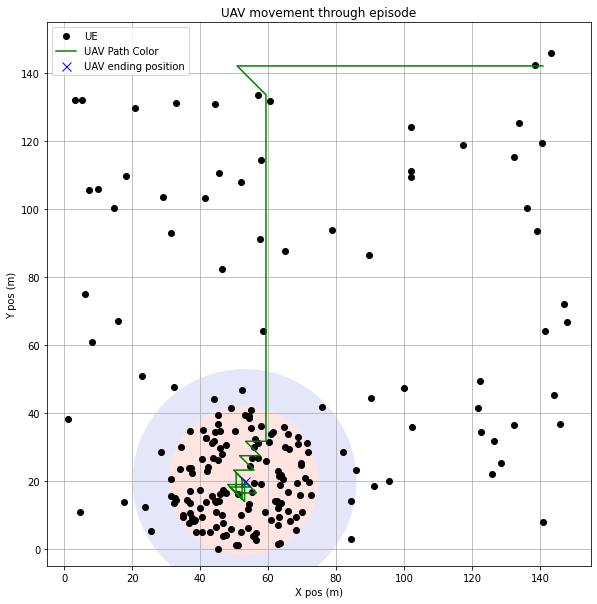

In [53]:
def run_random_episode():
  
  state = env.reset()
  print("beginning state: ", state[0][:2])
  done = False
  UAV_positions_list = [state.numpy().flatten()]
  while not done:
    action = policy(state, epsilon=0.)
    # print("action: ", action)
    new_state, reward, done, _ = env.step(action)
    # print("new_state: ", new_state[0][:2])
    state = new_state
    UAV_positions_list.append(state.numpy().flatten())

  print(UAV_positions_list)
  env.render_UAV_movement_through_episode(UAV_positions_list = UAV_positions_list)
  return

run_random_episode()

In [ ]:
UAV_positions_list
env.render_UAV_movement_through_episode(UAV_positions_list)

In [51]:
env.get_count_of_UEs_covered()

138

## Show results

### Plot execution stats

In [52]:
plot_stats1(stats)

NameError: ignored

### Test the resulting agent

In [ ]:
test_agent(env, policy, episodes=2)

NameError: ignored

In [ ]:
env.close()

## Resources

[[1] Playing Atari with Deep Reinforcement Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)